# Introduction

Before starting the experiment, there are some important points I would like to mention. Firstly, I obtained my dataset from the [Amazon Products Dataset on Kaggle](https://www.kaggle.com/datasets/nguyenngocphung/10000-amazon-products-dataset). I have experimented with various datasets, and among those I explored, I concluded that this dataset is the most suitable for my purposes. I have applied some color enhancements and added a color palette according to my preferences, believing it would improve the visual representation. When you run this notebook, all the code will execute.

---

#### Notebook Overview

   - Brief introduction to the dataset origin and selection rationale.
   - Mention of personal modifications for better visualization.
   - Explanation of the chosen color palette for visual enhancements.
   - Assurance that all code in the notebook will run smoothly.
   - Remaining transactions etc. all mentioned below.
---


<div style="background-color: darkorchid; padding: 10px;">

# <span style="color:white"> Import Libraries</span>

</div>

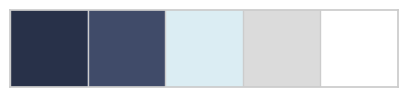

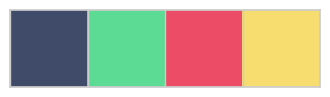

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import plotly.graph_objs as go
import chart_studio.plotly as csp
import plotly .offline as offline
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')
from kneed import KneeLocator, DataGenerator
from sklearn.metrics import silhouette_score as sil,silhouette_samples
import matplotlib.colors
from collections import Counter
from scipy.spatial.distance import pdist, cdist
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec

# Define custom colors
"#283149"  # Dark blue
"#404B69"  # Medium blue
"#DBEDF3"  # Light blue
"#DBDBDB"  # Gray
"#FFFFFF"  # White

colors = ["#283149", "#404B69", "#DBEDF3", "#DBDBDB", "#FFFFFF"]
colors2 = ["#FFFFFF", "#DBDBDB", "#DBEDF3", "#404B69", "#283149"]
colors3 = ['#404B69', '#5CDB95', '#ED4C67', '#F7DC6F']

my_palette = sns.color_palette(["#283149", "#404B69", "#DBEDF3", "#DBDBDB", "#FFFFFF"])

cmap = matplotlib.colors.ListedColormap(colors)
cmap2 = matplotlib.colors.ListedColormap(colors2)

# Main Theme
sns.palplot(sns.color_palette(colors))

# Clusters Theme
sns.palplot(sns.color_palette(colors3))




<div style="background-color: darkorchid; padding: 10px;">

# <span style="color:white"> TASK 1</span>

</div>


**Title: Amazon Product Optimization and Customer Analysis**

Introduction: As a data scientist working at Amazon, I'm particularly focused on understanding how data can be utilized, especially to increase product sales. Analyzing customer preferences, deciphering why certain products sell more, and exploring customer behaviors are among my top priorities. My goal is to use this data to gain insights into customer preferences, enhance product sales, and improve the overall customer experience.

This data analysis experience highlights how data science can make a difference in the face of Amazon's scale and complexity. With the right strategies, I have the potential to enhance customer satisfaction, optimize product sales, and contribute to Amazon's success. This scenario demonstrates the real-world impact of data science.

This experiment is conducted to increase sales and improve the customer experience.

**Context:**

Amazon, as one of the world's largest e-commerce platforms, is a behemoth that offers millions of products and serves millions of customers. However, in this fiercely competitive environment, it has set its sights on various objectives to achieve more success and growth.Determining customer preferences and sales trends can be challenging. In this experiment, the experiment will be conducted based on the following 5 questions

**1. Which product categories or features are among the best-sellers and why?**

**2. What customer feedback and reviews can we use to measure and enhance customer satisfaction?**

**3. Which products and features are most preferred by customers?**

**4. What data analysis approaches can we employ to optimize inventory and stock management?**

**5.How can we adjust inventory management and marketing strategies based on sales trends?**

These columns contain essential information about how a product is represented on the Amazon platform and presented to customers. This information is valuable for product promotion, customer relationship management, marketing strategies, and other business processes.

| Column Name                           | Description                                                                                             |
|---------------------------------------|---------------------------------------------------------------------------------------------------------|
| uniq_id                               | This column contains a unique identifier for each product. It serves as a distinct identification number for each product.                   |
| product_name                          | It contains the names of the products. It shows customers the name of the product.                                                   |
| manufacturer                          | It specifies the manufacturer or manufacturing company of the products. It provides information about which company produced the product. |
| price                                 | It represents the prices of the products. It shows customers how costly the product is.                                             |
| number_available_in_stock             | It represents the quantity of the product in stock. It indicates how many units of the product are available.                          |
| number_of_reviews                     | It includes the number of reviews for the products. It shows how frequently customer feedback is received.                             |
| number_of_answered_questions           | It indicates how many of the questions related to the product have been answered. It shows the percentage of questions answered.         |
| average_review_rating                 | It contains the average review rating for the products. It indicates the overall positivity or negativity of customer reviews.        |
| amazon_category_and_sub_category      | It specifies the Amazon category and sub-category of the product. It shows where the product is categorized.                        |
| description                           | It includes the descriptions of the products. It provides detailed information about the product's features, advantages, and other essential details.  |
| product_information                   | It contains basic information about the products. This column may include technical specifications, dimensions, and other particulars.  |
| product_description                   | It provides detailed descriptions of the products. It offers an extensive description of the product.                              |
| items_customers_buy_after_viewing_this_item | It represents the other products that customers purchase after viewing this product. It may list related products.               |
| customer_questions_and_answers        | It includes customer questions and their corresponding answers. It's used for customers to ask questions about the product and for those questions to be answered.   |


**The Purpose:** The purpose of this project is to leverage data analysis and data science to achieve specific goals within Amazon's vast e-commerce ecosystem. By focusing on objectives such as increasing product sales, enhancing customer satisfaction, understanding customer preferences, improving inventory management, and determining sales trends, this project aims to demonstrate how data-driven strategies can contribute to Amazon's continued success in the highly competitive digital marketplace.

  **•Increasing Product Sales:** One of the primary objectives is to boost the sales of Amazon's products, thereby increasing the company's revenue and expanding its market share. Understanding customer preferences and demands is crucial in aiming for higher product sales.

  **•Enhancing Customer Satisfaction:** Improving customer satisfaction is another significant goal, with the aim of building and increasing customer loyalty. Analyzing customer feedback and reviews helps continually enhance the customer experience.

  **•Understanding Customer Preferences:** Understanding which products and features are preferred by customers is a key objective. By analyzing customer behavior, the project aims to better guide Amazon's product range and offer personalized recommendations.

  **•Improving Inventory and Stock Management:** Optimizing inventory and stock management to reduce costs and efficiently utilize resources is another goal. This approach helps prevent overstocking or understocking of products.

  **•Determining Sales Trends:** Identifying which products are popular and in demand is vital for shaping inventory management and marketing strategies.


Our experiment aims to assist Amazon in making better decisions by utilizing data analysis to increase sales and enhance the customer experience. Our goal is to gain a deeper understanding of customer preferences, identify popular products, and determine the reasons behind their popularity. Additionally, we will analyze customer feedback to uncover insights that will enable Amazon to enhance customer satisfaction. Ultimately, our experiment will lead to increased customer satisfaction, higher sales, and further growth for Amazon.

<div style="background-color: darkorchid; padding: 10px;">

# <span style="color:white">TASK 2</span>


</div>

**Dataset Explanation:**

This dataset contain over 10,000 different products at Amazon.These columns contain essential information about how a product is represented on the Amazon platform and presented to customers. This information is valuable for product promotion, customer relationship management, marketing strategies, and other business processes.

| Column Name                     | Description                                                                        |
|---------------------------------|------------------------------------------------------------------------------------|
| uniq_id                         | This column contains a unique identifier for each product. It is used to distinguish each product in Amazon's vast product range. In other words, each product has a unique identification number, which provides a unique representation of each product in the data set.|
| product_name                    | This column contains the names of the products and informs customers about what the product is and where to find reviews, questions, and reviews about the product. The product's name is essential to attract customers' attention and describe the product.    |
| manufacturer                    | It specifies the manufacturer or manufacturing company of the products. This column provides customers with information about which company produced the product, offering insights into the product's quality and authenticity. |
| price                           | This column includes the prices of the products. It shows customers the cost of the product. Price is a crucial factor that influences customers' purchasing decisions. |
| number_available_in_stock        | It indicates the quantity of the product in stock, showing how many units of the product are still available and for how long they can remain in stock. This information conveys how popular the product is and its urgency. |
| number_of_reviews               | This column contains the number of reviews for the products. Customer feedback is vital in understanding the product's popularity and customer satisfaction. High review counts often indicate a more reliable product. |
| number_of_answered_questions     | It shows how many of the questions related to the product have been answered. This column illustrates how effectively sellers respond to customer questions, and a good question and answer service can enhance customer satisfaction. |
| average_review_rating           | It contains the average review rating for the products, reflecting the overall level of customer satisfaction. High ratings reflect positive customer experiences, while low ratings may highlight the product's shortcomings. |
| amazon_category_and_sub_category | This column specifies the Amazon category and sub-category of the product, guiding customers to where they can find the product. This increases the product's discoverability. |
| description                     | This column contains detailed product descriptions, providing information about the product's features, advantages, and usage instructions. This helps customers make informed purchase decisions by offering more information. |
| product_information              | It includes basic product information, focusing on technical specifications, dimensions, and other essential details. Customers can use this column to examine the technical details of the product to support their decisions. |
| product_description              | It provides more detailed product descriptions, explaining the product's usage and benefits in depth. This assists customers in imagining the product and evaluating its suitability for their needs. |


**Assessment of Dataset Suitability for the Project:**

The dataset chosen for this project serves as a crucial foundation for our ambitious goals outlined in Task 1. We are about to embark on a data-driven journey aimed at enhancing Amazon's e-commerce experience and sales, and this dataset aligns seamlessly with our mission. Here's why this dataset is not just suitable but profoundly relevant to Amazon's vast ecosystem:

1. **Relevance to Amazon's Ecosystem:** This dataset delves into the very essence of Amazon's business model. It encompasses a rich tapestry of product-related information, from the names of items, their manufacturers, and prices, to essential insights such as stock availability and customer reviews. These data points are the lifeblood of Amazon's extensive product listings and serve as a goldmine of information for understanding and optimizing how these products are presented to customers.

2. **Customer-Centric Insights:** At Amazon, it's ingrained in our culture to be customer-obsessed, and our success hinges on our ability to grasp and cater to customer preferences. This dataset provides a lens into the minds of our customers, offering glimpses of their opinions through reviews, ratings, and the popularity of various products. By immersing ourselves in this wealth of customer feedback, we can discern what delights our customers and what doesn't quite hit the mark. Armed with these insights, we're poised to fine-tune our product offerings to meet the ever-evolving demands of our cherished patrons.

3. **Inventory Management:** Efficient inventory management is the cornerstone of Amazon's operations. The dataset includes vital information regarding the number of products available in stock. This piece of the puzzle is pivotal to our overarching goal of optimizing our stock levels, a mission that promises to deliver cost savings and more effective resource utilization. By analyzing real-world stock data, we can sidestep the pitfalls of overstocking or understocking, ensuring a seamless shopping experience for our customers.

4. **Marketing and Recommendations:** Product descriptions and associated data provide the raw materials for enhancing product recommendations and fine-tuning our marketing strategies. By weaving in information about items bought after viewing a specific product, we can craft more compelling and personalized recommendations. This, in turn, has the potential to fuel higher sales and elevate the overall customer experience to new heights.

5. **Comprehensive Data:** The dataset casts a wide net, capturing a plethora of features and attributes. This depth and breadth of data harmonize perfectly with the multifaceted goals outlined in Task 1. Whether it's decoding customer preferences, optimizing inventory, or uncovering the hottest sales trends, this dataset stands as a treasure trove of actionable information.

6. **Real-Life Data:** Unlike artificial or theoretical datasets, this dataset is a reflection of the real world. It embodies the complexities of Amazon's sprawling operations and the dynamism of the e-commerce landscape. This real-life data is invaluable, as it reflects the genuine challenges and opportunities that Amazon faces every day.

7. **No NDA or Licensing Issues:** The dataset adheres to the criteria laid out in Task 2, with no lurking NDA constraints or licensing issues. This data's legality and accessibility provide us with the peace of mind to explore, analyze, and extract meaningful insights without the shadow of legal constraints.

In summary, this dataset is not just suitable, but rather the cornerstone of our journey to enrich Amazon's e-commerce landscape. It arms us with the insights, knowledge, and real-world data needed to propel Amazon to new heights of success. It's not just a dataset; it's a gateway to realizing our goals and optimizing the Amazon experience for customers and stakeholders alike.

<div style="background-color: darkorchid; padding: 10px;">

# <span style="color:white">TASK 3 and TASK 4</span>
<span style="color:white">**IDA and EDA**</span>




</div>

<div style="background-color: #FFB6C1; padding: 10px; color: black;">

**In this phase, I will start the experiment by performing various tasks such as:**

**Data Collection:**

* I will gather data that suits my needs, ensuring it aligns with the objectives of the analysis. This involves collecting relevant and appropriate data for the analysis.

**Data Cleaning:**

* I will examine the data to handle missing values, outliers, and erroneous entries. This process is crucial for ensuring the quality and accuracy of the dataset.

**Data Transformation:**

* To prepare the data for analysis, I will perform transformations to shape it into a suitable format. This may involve converting data types, scaling, or encoding categorical variables.

**Data Slicing:**

* I will segment the dataset, cutting down a large dataset into a smaller subset for focused analysis. This allows for more manageable and targeted exploration.

<b>Throughout this process, I will drop and add columns as needed, preprocess the data to address any anomalies, and present distributions and statistical properties. The goal is to prepare the data for in-depth analysis and gain meaningful insights.<b>

</div>


## Introduction

Commencing this task by loading the dataset and conducting a preliminary exploration. The objective is to create statistical summaries, examine distributions, and perform specialized analyses to accomplish the task.

## Data Loading

I start by loading the dataset into the analysis environment. This entails importing the necessary libraries and reading the dataset from a specified source.


* Reading and Understanding the Dataset

In [2]:
Amazon_Products_df = pd.read_csv("Amazon_Products.csv")


In [3]:
Amazon_Products_df.head()

uniq_id  \
0  eac7efa5dbd3d667f26eb3d3ab504464   
1  b17540ef7e86e461d37f3ae58b7b72ac   
2  348f344247b0c1a935b1223072ef9d8a   
3  e12b92dbb8eaee78b22965d2a9bbbd9f   
4  e33a9adeed5f36840ccc227db4682a36   

                                        product_name manufacturer   price  \
0                              Hornby 2014 Catalogue       Hornby   £3.42   
1  FunkyBuys® Large Christmas Holiday Express Fes...    FunkyBuys  £16.99   
2  CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...          ccf   £9.99   
3     HORNBY Coach R4410A BR Hawksworth Corridor 3rd       Hornby  £39.99   
4  Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...       Hornby  £32.19   

  number_available_in_stock number_of_reviews number_of_answered_questions  \
0                     5 new              15.0                          1.0   
1                       NaN               2.0                          1.0   
2                     2 new              17.0                          2.0   
3                       NaN               1.0                          2.0   
4                       NaN               3.0                          2.0   

  average_review_rating                   amazon_category_and_sub_category  \
0    4.9 out of 5 stars  Hobbies > Model Trains & Railway Sets > Rail V...   
1    4.5 out of 5 stars  Hobbies > Model Trains & Railway Sets > Rail V...   
2    3.9 out of 5 stars  Hobbies > Model Trains & Railway Sets > Rail V...   
3    5.0 out of 5 stars  Hobbies > Model Trains & Railway Sets > Rail V...   
4    4.7 out of 5 stars  Hobbies > Model Trains & Railway Sets > Rail V...   

                                         description  ... Unnamed: 885  \
0  Product Description Hornby 2014 Catalogue Box ...  ...          NaN   
1  Size Name:Large FunkyBuys® Large Christmas Hol...  ...          NaN   
2  BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...  ...          NaN   
3  Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...  ...          NaN   
4  Product Description Hornby RailRoad 0-4-0 Gild...  ...          NaN   

  Unnamed: 886 Unnamed: 887 Unnamed: 888 Unnamed: 889 Unnamed: 890  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

  Unnamed: 891 Unnamed: 892 Unnamed: 893 Unnamed: 894  
0          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN  
3          NaN          NaN          NaN          NaN  
4          NaN          NaN          NaN          NaN  

[5 rows x 895 columns]

In [4]:
Amazon_Products_df.isnull().sum()

uniq_id                          2
product_name                     2
manufacturer                     9
price                         1437
number_available_in_stock     2502
                             ...  
Unnamed: 890                 10002
Unnamed: 891                 10002
Unnamed: 892                 10002
Unnamed: 893                 10003
Unnamed: 894                 10003
Length: 895, dtype: int64

In [5]:
Amazon_Products_df.shape


(10004, 895)

In [6]:
Amazon_Products_df.columns

Index(['uniq_id', 'product_name', 'manufacturer', 'price',
       'number_available_in_stock', 'number_of_reviews',
       'number_of_answered_questions', 'average_review_rating',
       'amazon_category_and_sub_category', 'description',
       ...
       'Unnamed: 885', 'Unnamed: 886', 'Unnamed: 887', 'Unnamed: 888',
       'Unnamed: 889', 'Unnamed: 890', 'Unnamed: 891', 'Unnamed: 892',
       'Unnamed: 893', 'Unnamed: 894'],
      dtype='object', length=895)

In [7]:
Amazon_Products_df.dtypes

uniq_id                      object
product_name                 object
manufacturer                 object
price                        object
number_available_in_stock    object
                              ...  
Unnamed: 890                 object
Unnamed: 891                 object
Unnamed: 892                 object
Unnamed: 893                 object
Unnamed: 894                 object
Length: 895, dtype: object

In [8]:
Amazon_Products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Columns: 895 entries, uniq_id to Unnamed: 894
dtypes: object(895)
memory usage: 68.3+ MB


In [9]:
Amazon_Products_df.describe()

uniq_id     product_name manufacturer  price number_available_in_stock  \
count    10002            10002         9995   8567                      7502   
unique   10001             9965         2652   2626                        90   
top          }  Polyhedral Dice         LEGO  £9.99                     2 new   
freq         2                3          171    189                      1337   

        number_of_reviews  number_of_answered_questions average_review_rating  \
count              9984.0                        9237.0                  9984   
unique              290.0                          30.0                    20   
top                   1.0                           1.0    5.0 out of 5 stars   
freq               3143.0                        5796.0                  5140   

                         amazon_category_and_sub_category  \
count                                                9312   
unique                                                256   
top     Die-Cast & Toy Vehicles > Toy Vehicles & Acces...   
freq                                                  880   

                                              description  ...  \
count                                                9351  ...   
unique                                               8514  ...   
top     Welcome to k2, we offer combined items postage...  ...   
freq                                                  113  ...   

                                             Unnamed: 885  \
count                                                   2   
unique                                                  1   
top     http://z-ecx.images-amazon.com/images/G/01/AUI...   
freq                                                    2   

                                             Unnamed: 886  \
count                                                   2   
unique                                                  1   
top     https://images-eu.ssl-images-amazon.com/images...   
freq                                                    2   

                                             Unnamed: 887  \
count                                                   2   
unique                                                  1   
top     http://z-ecx.images-amazon.com/images/G/01/AUI...   
freq                                                    2   

                                             Unnamed: 888  \
count                                                   2   
unique                                                  1   
top     http://z-ecx.images-amazon.com/images/G/01/AUI...   
freq                                                    2   

                                             Unnamed: 889  \
count                                                   2   
unique                                                  1   
top     https://images-eu.ssl-images-amazon.com/images...   
freq                                                    2   

                                             Unnamed: 890  \
count                                                   2   
unique                                                  1   
top     http://z-ecx.images-amazon.com/images/G/01/AUI...   
freq                                                    2   

                                             Unnamed: 891  \
count                                                   2   
unique                                                  2   
top     Technical Details Item Weight5 Kg Product Dime...   
freq                                                    1   

                                             Unnamed: 892  \
count                                                   2   
unique                                                  2   
top     Product Description Manufacturer's Description...   
freq                                                    1   

                                             Unnamed: 893  \
count                                            

In [10]:
Amazon_Products_df.select_dtypes(include=['object']).describe().T

count unique  \
uniq_id                    10002  10001   
product_name               10002   9965   
manufacturer                9995   2652   
price                       8567   2626   
number_available_in_stock   7502     90   
...                          ...    ...   
Unnamed: 890                   2      1   
Unnamed: 891                   2      2   
Unnamed: 892                   2      2   
Unnamed: 893                   1      1   
Unnamed: 894                   1      1   

                                                                         top  \
uniq_id                                                                    }   
product_name                                                 Polyhedral Dice   
manufacturer                                                            LEGO   
price                                                                  £9.99   
number_available_in_stock                                              2 new   
...                                                                      ...   
Unnamed: 890               http://z-ecx.images-amazon.com/images/G/01/AUI...   
Unnamed: 891               Technical Details Item Weight5 Kg Product Dime...   
Unnamed: 892               Product Description Manufacturer's Description...   
Unnamed: 893               Dalek Toys come of age at last!!!! // 5.0 // 7...   
Unnamed: 894               {"seller"=>[{"Seller_name_1"=>"gifttogadget", ...   

                           freq  
uniq_id                       2  
product_name                  3  
manufacturer                171  
price                       189  
number_available_in_stock  1337  
...                         ...  
Unnamed: 890                  2  
Unnamed: 891                  1  
Unnamed: 892                  1  
Unnamed: 893                  1  
Unnamed: 894                  1  

[895 rows x 4 columns]

Preprocessing

In [11]:
Amazon_Products_df.describe()

uniq_id     product_name manufacturer  price number_available_in_stock  \
count    10002            10002         9995   8567                      7502   
unique   10001             9965         2652   2626                        90   
top          }  Polyhedral Dice         LEGO  £9.99                     2 new   
freq         2                3          171    189                      1337   

        number_of_reviews  number_of_answered_questions average_review_rating  \
count              9984.0                        9237.0                  9984   
unique              290.0                          30.0                    20   
top                   1.0                           1.0    5.0 out of 5 stars   
freq               3143.0                        5796.0                  5140   

                         amazon_category_and_sub_category  \
count                                                9312   
unique                                                256   
top     Die-Cast & Toy Vehicles > Toy Vehicles & Acces...   
freq                                                  880   

                                              description  ...  \
count                                                9351  ...   
unique                                               8514  ...   
top     Welcome to k2, we offer combined items postage...  ...   
freq                                                  113  ...   

                                             Unnamed: 885  \
count                                                   2   
unique                                                  1   
top     http://z-ecx.images-amazon.com/images/G/01/AUI...   
freq                                                    2   

                                             Unnamed: 886  \
count                                                   2   
unique                                                  1   
top     https://images-eu.ssl-images-amazon.com/images...   
freq                                                    2   

                                             Unnamed: 887  \
count                                                   2   
unique                                                  1   
top     http://z-ecx.images-amazon.com/images/G/01/AUI...   
freq                                                    2   

                                             Unnamed: 888  \
count                                                   2   
unique                                                  1   
top     http://z-ecx.images-amazon.com/images/G/01/AUI...   
freq                                                    2   

                                             Unnamed: 889  \
count                                                   2   
unique                                                  1   
top     https://images-eu.ssl-images-amazon.com/images...   
freq                                                    2   

                                             Unnamed: 890  \
count                                                   2   
unique                                                  1   
top     http://z-ecx.images-amazon.com/images/G/01/AUI...   
freq                                                    2   

                                             Unnamed: 891  \
count                                                   2   
unique                                                  2   
top     Technical Details Item Weight5 Kg Product Dime...   
freq                                                    1   

                                             Unnamed: 892  \
count                                                   2   
unique                                                  2   
top     Product Description Manufacturer's Description...   
freq                                                    1   

                                             Unnamed: 893  \
count                                            

In [12]:
Amazon_Products_df.number_available_in_stock.describe()


count      7502
unique       90
top       2 new
freq       1337
Name: number_available_in_stock, dtype: object

In [13]:
Amazon_Products_df.price.describe()	

count      8567
unique     2626
top       £9.99
freq        189
Name: price, dtype: object

In [14]:
Amazon_Products_df.number_of_reviews.describe()


count     9984.0
unique     290.0
top          1.0
freq      3143.0
Name: number_of_reviews, dtype: float64

In [15]:
Amazon_Products_df.number_of_answered_questions.describe()	

count     9237.0
unique      30.0
top          1.0
freq      5796.0
Name: number_of_answered_questions, dtype: float64

* Data Cleaning

In [16]:
threshold = 0.7 
min_val = int((1 - threshold) * len(Amazon_Products_df.columns) + 1)
Amazon_Products_df = Amazon_Products_df.dropna(axis=1, thresh=min_val)
Amazon_Products_df

uniq_id  \
0      eac7efa5dbd3d667f26eb3d3ab504464   
1      b17540ef7e86e461d37f3ae58b7b72ac   
2      348f344247b0c1a935b1223072ef9d8a   
3      e12b92dbb8eaee78b22965d2a9bbbd9f   
4      e33a9adeed5f36840ccc227db4682a36   
...                                 ...   
9999   44d6967f083825a5de36ad4865a65bcd   
10000  08f0747b6fc6687215ffb994c3a6fb32   
10001  bf6cc073f8f24e6e338190fa16f6ee9d   
10002  cd783d0b8b44e631b9788b203eaaefae   
10003  94d18e86e504bee1e392df7e5738b18a   

                                            product_name  \
0                                  Hornby 2014 Catalogue   
1      FunkyBuys® Large Christmas Holiday Express Fes...   
2      CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...   
3         HORNBY Coach R4410A BR Hawksworth Corridor 3rd   
4      Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...   
...                                                  ...   
9999   Batman 1966 TV Series Action Figures - The Rid...   
10000  Star Wars Costume, Kids Stormtrooper Costume S...   
10001        Defiance Lawkeeper Metal Badge Prop Replica   
10002  Justice League of America Series 3 Green Lante...   
10003                  Star Wars 1/72 Y-Wing Starfighter   

                  manufacturer   price number_available_in_stock  \
0                       Hornby   £3.42                     5 new   
1                    FunkyBuys  £16.99                       NaN   
2                          ccf   £9.99                     2 new   
3                       Hornby  £39.99                       NaN   
4                       Hornby  £32.19                       NaN   
...                        ...     ...                       ...   
9999                    Mattel  £22.95                     5 new   
10000                Star Wars  £39.99                       NaN   
10001  Olde Scotland Yard Ltd.  £43.99                     3 new   
10002                DC Comics  £49.81                     3 new   
10003                   Bandai  £21.20                    31 new   

      number_of_reviews number_of_answered_questions average_review_rating  \
0                  15.0                          1.0    4.9 out of 5 stars   
1                   2.0                          1.0    4.5 out of 5 stars   
2                  17.0                          2.0    3.9 out of 5 stars   
3                   1.0                          2.0    5.0 out of 5 stars   
4                   3.0                          2.0    4.7 out of 5 stars   
...                 ...                          ...                   ...   
9999                  3                          3.0    5.0 out of 5 stars   
10000                 1                          3.0    4.0 out of 5 stars   
10001                 1                          3.0    5.0 out of 5 stars   
10002                 1                          3.0    5.0 out of 5 stars   
10003                11                          3.0    4.5 out of 5 stars   

                        amazon_category_and_sub_category  \
0      Hobbies > Model Trains & Railway Sets > Rail V...   
1      Hobbies > Model Trains & Railway Sets > Rail V...   
2      Hobbies > Model Trains & Railway Sets > Rail V...   
3      Hobbies > Model Trains & Railway Sets > Rail V...   
4      Hobbies > Model Trains & Railway Sets > Rail V...   
...                                                  ...   
9999   Hobbies > Collectible Figures & Memorabilia > ...   
10000             Characters & Brands > Star Wars > Toys   
10001  Novelty & Special Use > Novelty > Accessories ...   
10002  Hobbies > Collectible Figures & Memorabilia > ...   
10003             Characters & Brands > Star Wars > Toys   

                                             description  \
0      Product Description Hornby 2014 Catalogue Box ...   
1      Size Name:Large FunkyBuys® Large Christmas Hol...   
2      BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...   
3      Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...   
4      Product Desc

In [17]:
Amazon_Products_df.columns

Index(['uniq_id', 'product_name', 'manufacturer', 'price',
       'number_available_in_stock', 'number_of_reviews',
       'number_of_answered_questions', 'average_review_rating',
       'amazon_category_and_sub_category', 'description',
       'product_information', 'product_description',
       'items_customers_buy_after_viewing_this_item',
       'customer_questions_and_answers'],
      dtype='object')

In [18]:
Amazon_Products_df.dtypes

uniq_id                                        object
product_name                                   object
manufacturer                                   object
price                                          object
number_available_in_stock                      object
number_of_reviews                              object
number_of_answered_questions                   object
average_review_rating                          object
amazon_category_and_sub_category               object
description                                    object
product_information                            object
product_description                            object
items_customers_buy_after_viewing_this_item    object
customer_questions_and_answers                 object
dtype: object

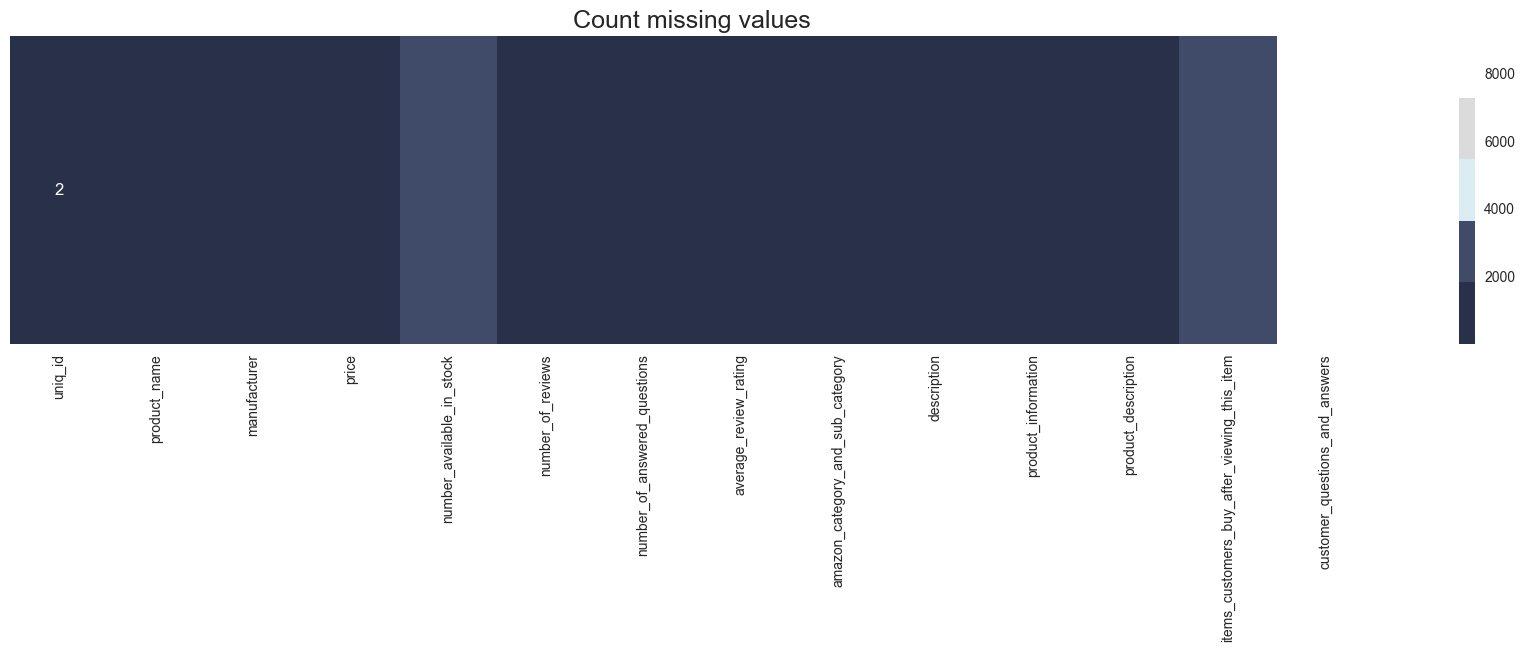

In [19]:
plt.figure(figsize=(22,4))
sns.heatmap((Amazon_Products_df.isna().sum()).to_frame(name='').T,cmap=my_palette, annot=True,
             fmt='0.0f').set_title('Count missing values', fontsize=18)
plt.show()

* Duplicated Data

In [20]:
Amazon_Products_df.duplicated().sum()


2

In [21]:
Amazon_Products_df.shape

(10004, 14)

The column price, number_available_in_stock, number_of_reviews,number_of_answered_questions and average_review_rating do not have true datatype. The datatype given is object but it has to be int or float. The column of **amazon_category_and_sub_category** have multiple values. For cleaning the data I will seperate them to individual columns.Also I have to check missing values in column of unique_id.

In [22]:
missing_values = Amazon_Products_df["uniq_id"].isnull()
print(missing_values)
Amazon_Products_df = Amazon_Products_df.dropna(subset=["uniq_id"])


0        False
1        False
2        False
3        False
4        False
         ...  
9999     False
10000    False
10001    False
10002    False
10003    False
Name: uniq_id, Length: 10004, dtype: bool


In [23]:
length_of_uniq = Amazon_Products_df["uniq_id"].map(lambda code: len(code))
length_of_uniq.unique()


array([32,  1], dtype=int64)

In [24]:
for i in Amazon_Products_df["uniq_id"]:
    if len(i) == 1:
        print(i)
Amazon_Products_df[Amazon_Products_df["uniq_id"] == "}"]


}
}


uniq_id                         product_name              manufacturer  \
2003       }  {""text"":""Digital & Prime Music""  panelKey"":""Mp3Panel""}   
2005       }  {""text"":""Digital & Prime Music""  panelKey"":""Mp3Panel""}   

                                                  price  \
2003  {""subtext"":""A great selection of apps and g...   
2005  {""subtext"":""A great selection of apps and g...   

            number_available_in_stock                 number_of_reviews  \
2003  text"":""Appstore for Android""  subtextKey"":""android-tagline""   
2005  text"":""Appstore for Android""  subtextKey"":""android-tagline""   

      number_of_answered_questions             average_review_rating  \
2003  panelKey"":""AndroidPanel""}  {""text"":""Amazon Cloud Drive""   
2005  panelKey"":""AndroidPanel""}  {""text"":""Amazon Cloud Drive""   

     amazon_category_and_sub_category                        description  \
2003  panelKey"":""CloudDrivePanel""}  panelKey"":""KindleReaderPanel""}   
2005  panelKey"":""CloudDrivePanel""}  panelKey"":""KindleReaderPanel""}   

             product_information                    product_description  \
2003  {""text"":""Fire Tablets""  panelKey"":""KindleFireTabletPanel""}   
2005  {""text"":""Fire Tablets""  panelKey"":""KindleFireTabletPanel""}   

     items_customers_buy_after_viewing_this_item  \
2003                       {""text"":""Fire TV""   
2005                       {""text"":""Fire TV""   

     customer_questions_and_answers  
2003    panelKey"":""FireTvPanel""}  
2005    panelKey"":""FireTvPanel""}

In [25]:
Amazon_Products_df.drop([2003, 2005], inplace = True)


In [26]:
Amazon_Products_df[Amazon_Products_df['number_available_in_stock'].str.contains("used", na = False)].head(2)

uniq_id  \
17   e9ef14a0253f074343b5441540d8471f   
161  a8d29a2c05bb402335f29f433eb20beb   

                                          product_name manufacturer price  \
17   Chuggington Interactive Wash and Fuel Set with...  Chuggington   NaN   
161  Hornby R322 OO Scale Class 8F 2-8-0 Steam Loco...       Hornby   NaN   

    number_available_in_stock number_of_reviews number_of_answered_questions  \
17                     1 used               2.0                          1.0   
161                    1 used               1.0                          2.0   

    average_review_rating                   amazon_category_and_sub_category  \
17     4.0 out of 5 stars  Hobbies > Model Trains & Railway Sets > Rail V...   
161    5.0 out of 5 stars  Hobbies > Model Trains & Railway Sets > Rail V...   

                                           description  \
17   Product Description The Chuggington Interactiv...   
161  An OO scale model of Stanier's heavy freight s...   

                                   product_information  \
17   Technical Details Item Weight998 g Product Dim...   
161  Technical Details Manufacturer recommended age...   

                                   product_description  \
17   Product Description The Chuggington Interactiv...   
161  An OO scale model of Stanier's heavy freight s...   

           items_customers_buy_after_viewing_this_item  \
17   http://www.amazon.co.uk/Chuggington | http://w...   
161                                                NaN   

    customer_questions_and_answers  
17                             NaN  
161                            NaN

In [27]:
item = ["new", "used"]
Amazon_Products_df["item_type"] = Amazon_Products_df['number_available_in_stock'].str.extract(f'({"|".join(item)})')

In [28]:
Amazon_Products_df["item_type"].unique()

array(['new', nan, 'used'], dtype=object)

In [29]:
Amazon_Products_df["price_new"] = Amazon_Products_df["price"].str.split(" ", expand = True).get(0).str.split("£", expand = True).get(1)
Amazon_Products_df[Amazon_Products_df.price_new.str.contains(',', na=False)]
Amazon_Products_df["price_new"] = Amazon_Products_df["price_new"].str.replace(",", "")

In [30]:
Amazon_Products_df["number_available_in_stock"] = Amazon_Products_df["number_available_in_stock"].str.extract("(\d+)").astype(float)
Amazon_Products_df["average_review_rating(out of 5)"] = Amazon_Products_df["average_review_rating"].str.split(" out of ", expand = True).get(0)

In [31]:
split_df = Amazon_Products_df["amazon_category_and_sub_category"].str.split(">", expand = True)
Amazon_Products_df["main_category"] = split_df.get(0)
Amazon_Products_df["sub_category_1"] = split_df.get(1)
Amazon_Products_df["sub_category_2"] = split_df.get(2)
Amazon_Products_df["sub_category_3"] = split_df.get(3)

In [32]:
Amazon_Products_df["average_review_rating(out of 5)"] = Amazon_Products_df["average_review_rating(out of 5)"].astype(float)
Amazon_Products_df["price_new"] = Amazon_Products_df["price_new"].astype(float)

In [33]:
pd.to_numeric(Amazon_Products_df["number_of_reviews"], errors='coerce')
pd.to_numeric(Amazon_Products_df["number_of_reviews"], errors='coerce').isnull()
Amazon_Products_df[pd.to_numeric(Amazon_Products_df["number_of_reviews"], errors='coerce').isnull()]

Amazon_Products_df["number_of_reviews"] = Amazon_Products_df["number_of_reviews"].str.replace(",", "")

Amazon_Products_df["number_of_reviews"] = Amazon_Products_df["number_of_reviews"].astype(float)

In [34]:
Amazon_Products_df["number_of_answered_questions"] = Amazon_Products_df["number_of_answered_questions"].astype(float)

In [35]:
Amazon_Products_df.drop(["price", "average_review_rating","amazon_category_and_sub_category"],  axis=1, inplace = True)

In [36]:
Amazon_Products_df['items_customers_buy_after_viewing_this_item'].fillna('', inplace=True)
items_after_viewing_count = {}

for items in Amazon_Products_df['items_customers_buy_after_viewing_this_item']:
    items = items.split(',')  
    items = [item.strip() for item in items]  

    for item in items:
        if item not in items_after_viewing_count:
            items_after_viewing_count[item] = 0
        items_after_viewing_count[item] += 1


products_and_scores = list(items_after_viewing_count.items())
products_and_scores.sort(key=lambda x: x[1], reverse=True)


top_preferred_products = products_and_scores[:5]

for product, score in top_preferred_products:
    print(f"Product: {product}, Preference Score: {score}")


Product: , Preference Score: 3066
Product: http://www.amazon.co.uk/Scalextric | http://www.amazon.co.uk/Scalextric | http://www.amazon.co.uk/Scalextric | http://www.amazon.co.uk/Scalextric, Preference Score: 38
Product: http://www.amazon.co.uk/Ravensburger | http://www.amazon.co.uk/Ravensburger | http://www.amazon.co.uk/Ravensburger | http://www.amazon.co.uk/Ravensburger, Preference Score: 26
Product: http://www.amazon.co.uk/Transformers | http://www.amazon.co.uk/Transformers | http://www.amazon.co.uk/Transformers | http://www.amazon.co.uk/Transformers, Preference Score: 25
Product: http://www.amazon.co.uk/Thomas-Friends-Trackmaster | http://www.amazon.co.uk/Thomas-Friends-Trackmaster | http://www.amazon.co.uk/Thomas-Friends-Trackmaster | http://www.amazon.co.uk/Thomas-Friends-Trackmaster, Preference Score: 12


In [37]:
Amazon_Products_df.head(2)


uniq_id  \
0  eac7efa5dbd3d667f26eb3d3ab504464   
1  b17540ef7e86e461d37f3ae58b7b72ac   

                                        product_name manufacturer  \
0                              Hornby 2014 Catalogue       Hornby   
1  FunkyBuys® Large Christmas Holiday Express Fes...    FunkyBuys   

   number_available_in_stock  number_of_reviews  number_of_answered_questions  \
0                        5.0                NaN                           1.0   
1                        NaN                NaN                           1.0   

                                         description  \
0  Product Description Hornby 2014 Catalogue Box ...   
1  Size Name:Large FunkyBuys® Large Christmas Hol...   

                                 product_information  \
0  Technical Details Item Weight640 g Product Dim...   
1  Technical Details Manufacturer recommended age...   

                                 product_description  \
0  Product Description Hornby 2014 Catalogue Box ...   
1  Size Name:Large FunkyBuys® Large Christmas Hol...   

         items_customers_buy_after_viewing_this_item  \
0  http://www.amazon.co.uk/Hornby-R8150-Catalogue...   
1  http://www.amazon.co.uk/Christmas-Holiday-Expr...   

                      customer_questions_and_answers item_type  price_new  \
0  Does this catalogue detail all the previous Ho...       new       3.42   
1  can you turn off sounds // hi no you cant turn...       NaN      16.99   

   average_review_rating(out of 5) main_category  \
0                              4.9      Hobbies    
1                              4.5      Hobbies    

                  sub_category_1   sub_category_2 sub_category_3  
0   Model Trains & Railway Sets    Rail Vehicles          Trains  
1   Model Trains & Railway Sets    Rail Vehicles          Trains

In [38]:
Amazon_Products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10003
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      10000 non-null  object 
 1   product_name                                 10000 non-null  object 
 2   manufacturer                                 9993 non-null   object 
 3   number_available_in_stock                    7500 non-null   float64
 4   number_of_reviews                            2830 non-null   float64
 5   number_of_answered_questions                 9235 non-null   float64
 6   description                                  9349 non-null   object 
 7   product_information                          9941 non-null   object 
 8   product_description                          9348 non-null   object 
 9   items_customers_buy_after_viewing_this_item  10000 non-null  object 
 10  cus

In [39]:
Amazon_Products_df.describe()

number_available_in_stock  number_of_reviews  \
count                7500.000000        2830.000000   
mean                    7.916933          11.871378   
std                     8.805777          50.840045   
min                     1.000000           1.000000   
25%                     3.000000           1.000000   
50%                     5.000000           2.000000   
75%                    10.000000           6.000000   
max                    92.000000        1399.000000   

       number_of_answered_questions    price_new  \
count                   9235.000000  8565.000000   
mean                       1.834976    20.278110   
std                        2.517268    46.345557   
min                        1.000000     0.010000   
25%                        1.000000     4.990000   
50%                        1.000000    10.620000   
75%                        2.000000    19.990000   
max                       39.000000  2439.920000   

       average_review_rating(out of 5)  
count                      9982.000000  
mean                          4.707283  
std                           0.372279  
min                           2.300000  
25%                           4.500000  
50%                           5.000000  
75%                           5.000000  
max                           5.000000

In [40]:
x = Amazon_Products_df.isnull().sum()

fig = px.bar(x, orientation = "h",  text_auto='.2s',
            color_discrete_sequence= ["#ff6b00"] * len(x))
fig.update_layout(
    title="<b>Missing Value Count</b>",
    xaxis_title="Total missing values",
    yaxis_title="Column Names",
    plot_bgcolor = "#ECECEC",
    showlegend=False
)
fig.show()

* Missing Values Distribution Chart

This chart provides an overview of missing values in each column of a specific dataset.

* Y-Axis (Left Side)

Displays column names from the dataset.
Each bar extends to the right, representing the count of missing values for the corresponding column.

* Top of the Chart

The bar for 'sub_category_2' extends the furthest, indicating the highest count of missing values, nearing 9,000.
Just below, 'sub_category_1' has a slightly shorter bar, indicating marginally fewer missing values compared to 'sub_category_2'.

* Descending Bars

Bars decrease in length as you move down the chart.
Columns like 'size', 'price', 'customer_questions_and_answers' have progressively shorter bars.
The descending trend continues down to 'manufacturer_info', 'product_in_stock', 'product_id', and 'product_name'.
'product_name' has the least number of missing values among the listed columns.

* X-Axis (Bottom)

Represents the total count of missing values.
Evenly spaced vertical grid lines aid in estimating the count for each bar.
The last grid line is labeled 9000, providing a reference point for columns approaching this count.



In [41]:
Amazon_Products_df.isnull().sum()

uniq_id                                           0
product_name                                      0
manufacturer                                      7
number_available_in_stock                      2500
number_of_reviews                              7170
number_of_answered_questions                    765
description                                     651
product_information                              59
product_description                             652
items_customers_buy_after_viewing_this_item       0
customer_questions_and_answers                 9087
item_type                                      2515
price_new                                      1435
average_review_rating(out of 5)                  18
main_category                                   690
sub_category_1                                  690
sub_category_2                                 4613
sub_category_3                                 8603
dtype: int64

In [42]:
num_cols = ['number_available_in_stock', 'number_of_reviews', 'number_of_answered_questions', 'price_new', 'average_review_rating(out of 5)']
cat_cols = ['uniq_id', 'product_name', 'manufacturer', 'description', 'product_information', 'product_description', 'items_customers_buy_after_viewing_this_item',
            'customer_questions_and_answers', 'item_type', 'main_category', 'sub_category_1', 'sub_category_2', 'sub_category_3']


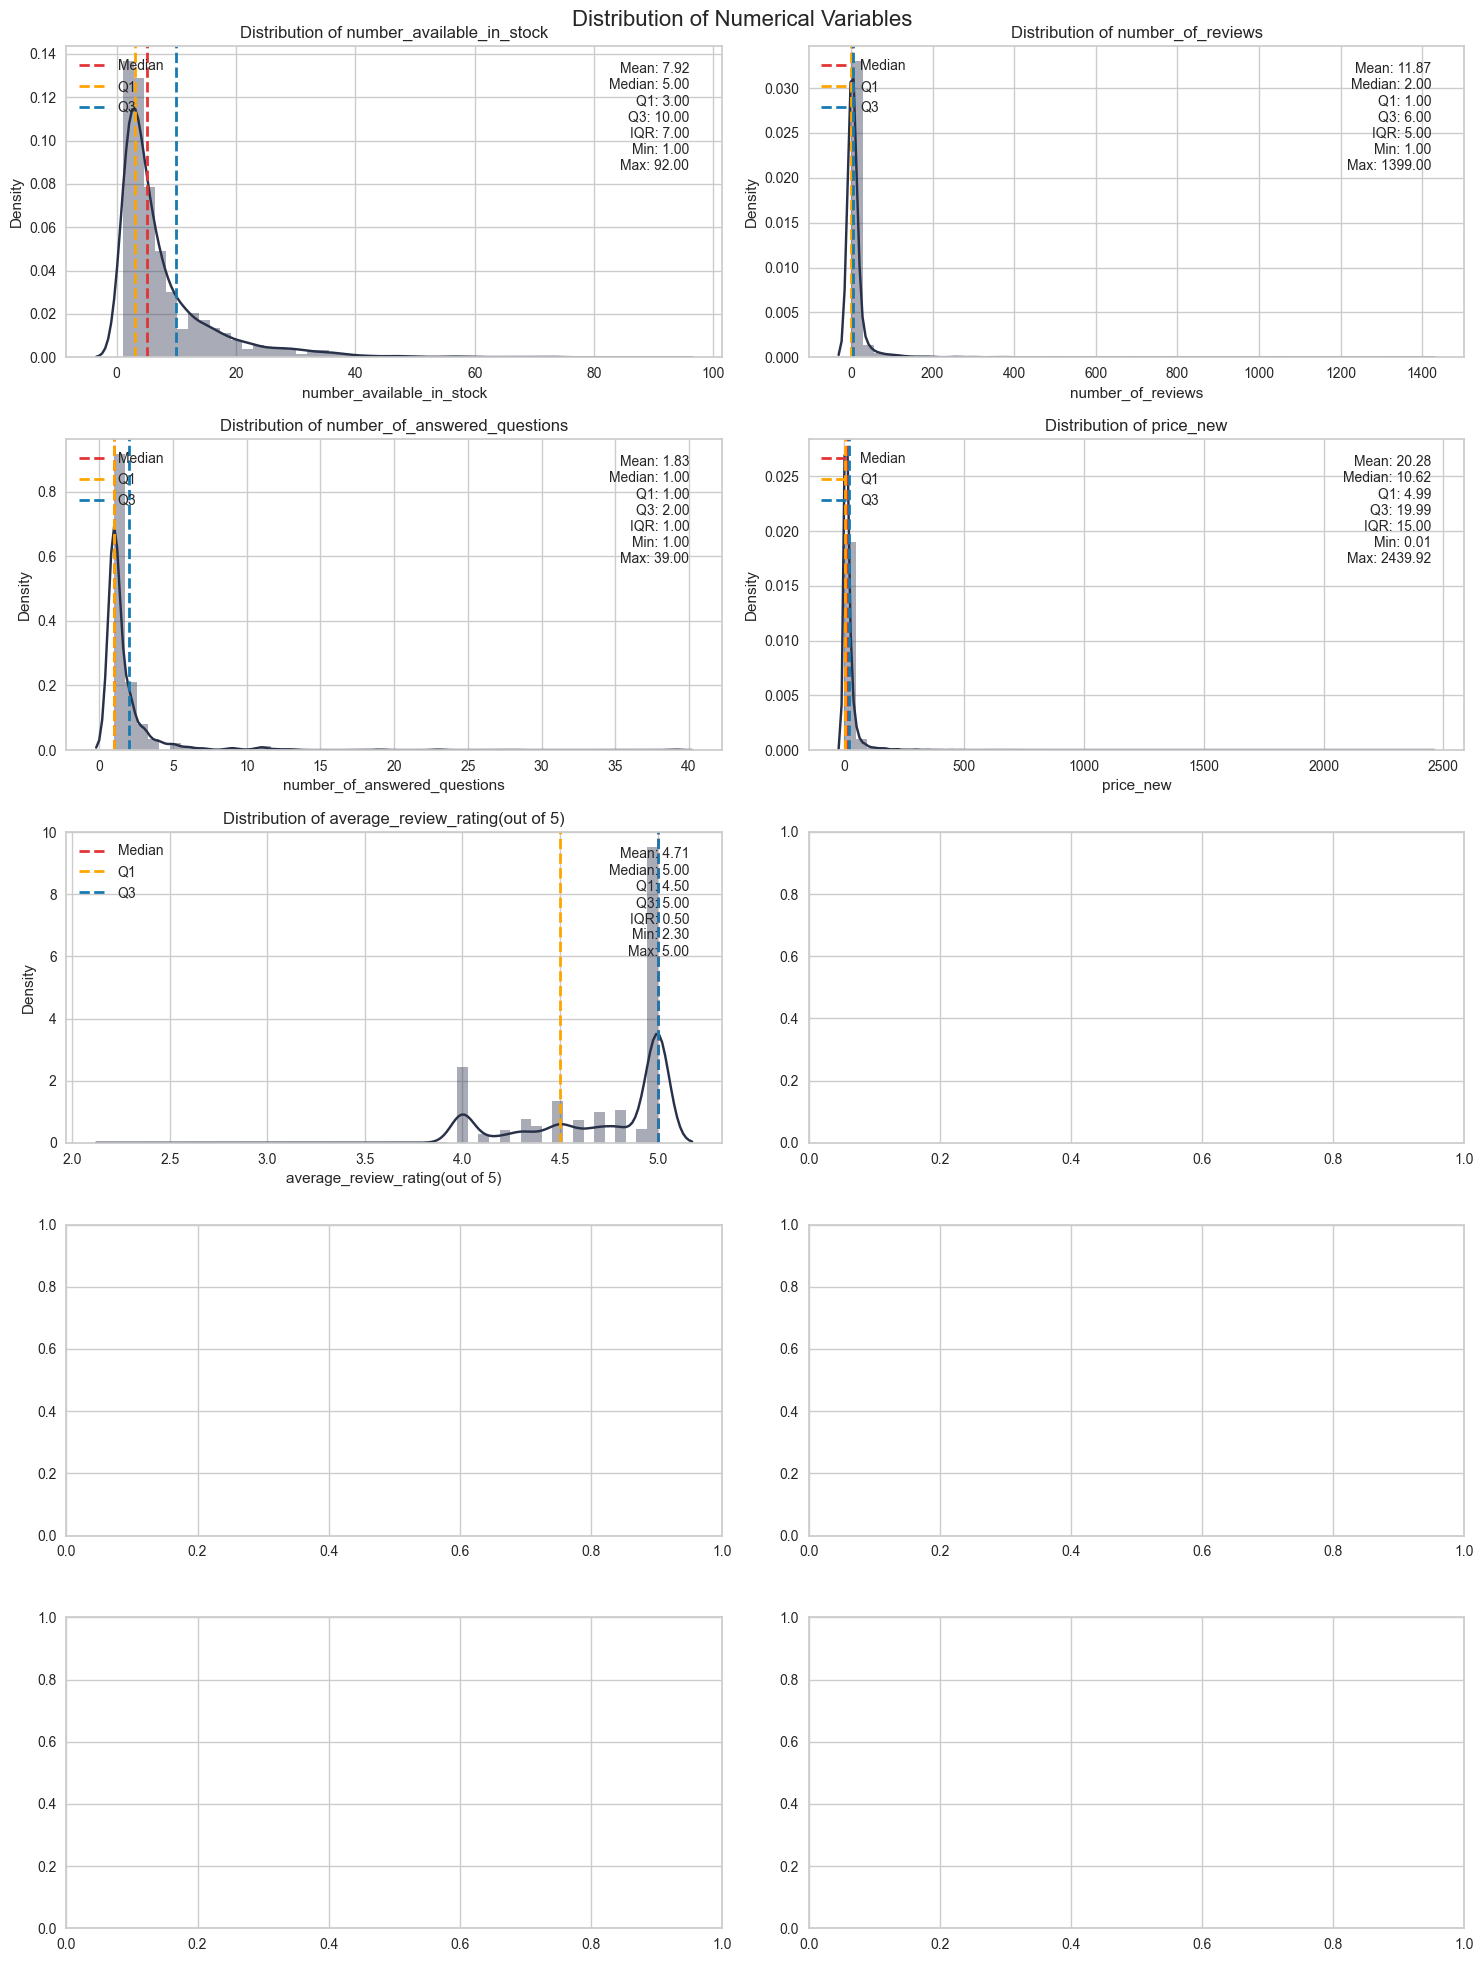

In [43]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
colors = ["#283149"]
for i, column in enumerate(num_cols):
    
    sns.distplot(Amazon_Products_df[column], color=colors[i%1], ax=axes[i//2, i%2])
     
    axes[i//2, i%2].axvline(x=Amazon_Products_df[column].median(), color='#e33434', linestyle='--', linewidth=2, label='Median')
    axes[i//2, i%2].axvline(x=Amazon_Products_df[column].quantile(0.25), color='orange', linestyle='--', linewidth=2, label='Q1')
    axes[i//2, i%2].axvline(x=Amazon_Products_df[column].quantile(0.75), color='#177ab0', linestyle='--', linewidth=2, label='Q3')
    
    
    median = Amazon_Products_df[column].median()
    q1 = Amazon_Products_df[column].quantile(0.25)
    q3 = Amazon_Products_df[column].quantile(0.75)
    iqr = q3 - q1
    axes[i//2, i%2].text(0.95, 0.95, 
                          'Mean: {:.2f}\nMedian: {:.2f}\nQ1: {:.2f}\nQ3: {:.2f}\nIQR: {:.2f}\nMin: {:.2f}\nMax: {:.2f}'.format(
                              Amazon_Products_df[column].mean(), median, q1, q3, iqr, Amazon_Products_df[column].min(), Amazon_Products_df[column].max()),
                          transform=axes[i//2, i%2].transAxes,
                          fontsize=10, va='top', ha='right')
    
    #
    axes[i//2, i%2].legend(loc = "upper left")
    
    
    axes[i//2, i%2].set_title('Distribution of '+ column)
    

fig.suptitle('Distribution of Numerical Variables', fontsize=16)
fig.tight_layout()

### Distribution of `number_of_answered_questions`

This histogram illustrates the frequency distribution of counts of answered questions in the dataset. The majority of items have no answered questions, as indicated by the peak around 0. The data exhibits a right-skew, suggesting that fewer items have a large number of answered questions.

The red line likely represents the Kernel Density Estimate (KDE), providing a smoothed version of the histogram. Key statistics, including mean, standard deviation (std), minimum (min), and maximum (max), are also presented.

### Distribution of `number_of_reviews`

Similar to the first histogram, this plot depicts the distribution of the number of reviews. There is a significant concentration near zero, indicating that many items have few reviews, resulting in a right-skewed distribution. The red KDE line follows the histogram, confirming the skewness.

### Distribution of `price_new`

This histogram displays the range and frequency of prices for items. The data is highly right-skewed, with most prices clustered near the lower end, suggesting that high-priced items are less common. The KDE line is present to show data smoothing.

### Distribution of `average_review_rating (out of 5)`

This histogram, different from the others, has discrete bins corresponding to ratings. The distribution is left-skewed, indicating that many items have high average review ratings.



In [44]:
features = ['number_available_in_stock', 'number_of_reviews', 'number_of_answered_questions', 'price_new', 'average_review_rating(out of 5)']

skew_data = []


for feature in features:
    skew = Amazon_Products_df[feature].skew()
    
    
    if skew > 0:
        skewness = 'Positively skewed'
    elif skew < 0:
        skewness = 'Negatively skewed'
    else:
        skewness = 'Symmetric'
    
    
    skew_data.append([feature, skewness, skew])


skew_df = pd.DataFrame(skew_data, columns=['Feature', 'Skewness_type', 'Skewness_value'])

skew_df


Feature      Skewness_type  Skewness_value
0        number_available_in_stock  Positively skewed        2.797668
1                number_of_reviews  Positively skewed       15.023597
2     number_of_answered_questions  Positively skewed        7.820505
3                        price_new  Positively skewed       21.412499
4  average_review_rating(out of 5)  Negatively skewed       -0.942948

In [45]:
main_category_counts = Amazon_Products_df['main_category'].value_counts()
main_category_counts


main_category
Hobbies                              1464
Die-Cast & Toy Vehicles              1221
Figures & Playsets                   1111
Characters & Brands                   960
Games                                 941
Arts & Crafts                         802
Party Supplies                        694
Fancy Dress                           585
Sports Toys & Outdoor                 372
Dolls & Accessories                   371
Jigsaws & Puzzles                     274
Puppets & Puppet Theatres             269
Baby & Toddler Toys                   106
Pretend Play                           45
Musical Toy Instruments                19
Novelty & Special Use                  11
Pens, Pencils & Writing Supplies        7
Office Supplies                         6
Electronic Toys                         5
Home Accessories                        5
Cooking & Dining                        4
Bags                                    4
Women                                   3
Educational Toys    

In [46]:
sub_category_1_counts = Amazon_Products_df['sub_category_1'].value_counts()
sub_category_1_counts

sub_category_1
 Toy Vehicles & Accessories          1100
 Science Fiction & Fantasy            485
 Accessories                          388
 Model Trains & Railway Sets          386
 Trading Cards & Accessories          376
                                     ... 
 Transportation & Traffic               1
 Specialty & Decorative Lighting        1
 Instruments                            1
 Trading Cards & Accessories            1
 Drinking Games                         1
Name: count, Length: 165, dtype: int64

In [47]:
sub_category_2_counts = Amazon_Products_df['sub_category_2'].value_counts()
sub_category_2_counts

sub_category_2
 Scaled Models                  912
 Toys                           623
 Bead Art & Jewellery-Making    368
 Packs & Sets                   317
 Balloons                       293
                               ... 
 Books                            1
 Tape & Supplies                  1
 Christmas                        1
 Paints                           1
 Bead Charms                      1
Name: count, Length: 115, dtype: int64

In [48]:
sub_category_3_counts = Amazon_Products_df['sub_category_3'].value_counts()
sub_category_3_counts

sub_category_3
 Vehicles                       880
 Trains                         176
 Locomotives                     88
 Figures & Decoration Parts      43
 Landscaping                     42
 Sleeves                         32
 Boats                           18
 Signal & Sound                  13
 Buttons & Pins                  10
 Albums                           9
 Aircraft                         8
 Lamps & Lighting                 8
 Wooden Thomas                    7
 Wagons                           6
 Recreational Activities          5
 Poker Sets                       4
 Cases                            4
 Desk Supplies Organisers         4
 Blackjack Sets                   3
 Window Stickers                  3
 Poker Tables                     3
 Control Moduls                   3
 Poker Layouts                    2
 Take Along Thomas                2
 Motor Road & Rail                2
 Landscaping                      2
 Poster Paints                    1
 Cable       

In [49]:
missing_price = Amazon_Products_df[Amazon_Products_df["price_new"].isnull()]
missing_price.head()

uniq_id  \
9   5afbaf65680c9f378af5b3a3ae22427e   
14  c68c3ae3b0ea3146beae99f3d4a6997c   
15  d27964f50577db8e46f2069b050c62c6   
16  c3b2f6ec9cf6250c960c26ee8ad33509   
17  e9ef14a0253f074343b5441540d8471f   

                                         product_name  manufacturer  \
9   Learning Curve Chuggington Interactive Chatsworth   Chuggington   
14  Kato 3060-2 EF65 500 (F Model) Electric Locomo...          Kato   
15  Glacier Express of N gauge 10-1219 Alps [UNESC...          Kato   
16        Power Trains Freight Industrial (Pack of 4)  Power Trains   
17  Chuggington Interactive Wash and Fuel Set with...   Chuggington   

    number_available_in_stock  number_of_reviews  \
9                         1.0                NaN   
14                       18.0                NaN   
15                       12.0                NaN   
16                        2.0                NaN   
17                        1.0                NaN   

    number_of_answered_questions  \
9                            1.0   
14                           1.0   
15                           1.0   
16                           1.0   
17                           1.0   

                                          description  \
9   Product Description An amazingly Interactive C...   
14       Suitable for the following scale(s): N Scale   
15  From 8-year-old: AgeTarget Gender: BoysFrom 8-...   
16  Product Description 4 collectible cars that ar...   
17  Product Description The Chuggington Interactiv...   

                                  product_information  \
9   Technical Details Item Weight150 g Product Dim...   
14  Technical Details Item Weight150 g Product Dim...   
15  Technical Details Item Weight671 g Product Dim...   
16  Technical Details Item Weight458 g Product Dim...   
17  Technical Details Item Weight998 g Product Dim...   

                                  product_description  \
9   Product Description An amazingly Interactive C...   
14       Suitable for the following scale(s): N Scale   
15  From 8-year-old: AgeTarget Gender: BoysFrom 8-...   
16  Product Description 4 collectible cars that ar...   
17  Product Description The Chuggington Interactiv...   

          items_customers_buy_after_viewing_this_item  \
9   http://www.amazon.co.uk/Chuggington | http://w...   
14                                                      
15  http://www.amazon.co.uk/Glacier-Express-Basic-...   
16  http://www.amazon.co.uk/Power-Trains-Auto-Load...   
17  http://www.amazon.co.uk/Chuggington | http://w...   

   customer_questions_and_answers item_type  price_new  \
9                             NaN       new        NaN   
14                            NaN       new        NaN   
15                            NaN       new        NaN   
16                            NaN       new        NaN   
17                            NaN      used        NaN   

    average_review_rating(out of 5) main_category  \
9                               4.8      Hobbies    
14                              5.0      Hobbies    
15                              5.0      Hobbies    
16                              4.5      Hobbies    
17                              4.0      Hobbies    

                   sub_category_1   sub_category_2 sub_category_3  
9    Model Trains & Railway Sets    Rail Vehicles          Trains  
14   Model Trains & Railway Sets    Rail Vehicles     Locomotives  
15   Model Trains & Railway Sets    Rail Vehicles     Locomotives  
16   Model Trains & Railway Sets    Rail Vehicles          Trains  
17   Model Trains & Railway Sets    Rail Vehicles          Trains

In [50]:
Amazon_Products_df=Amazon_Products_df.dropna(subset=['price_new'])
Amazon_Products_df.head()

uniq_id  \
0  eac7efa5dbd3d667f26eb3d3ab504464   
1  b17540ef7e86e461d37f3ae58b7b72ac   
2  348f344247b0c1a935b1223072ef9d8a   
3  e12b92dbb8eaee78b22965d2a9bbbd9f   
4  e33a9adeed5f36840ccc227db4682a36   

                                        product_name manufacturer  \
0                              Hornby 2014 Catalogue       Hornby   
1  FunkyBuys® Large Christmas Holiday Express Fes...    FunkyBuys   
2  CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...          ccf   
3     HORNBY Coach R4410A BR Hawksworth Corridor 3rd       Hornby   
4  Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...       Hornby   

   number_available_in_stock  number_of_reviews  number_of_answered_questions  \
0                        5.0                NaN                           1.0   
1                        NaN                NaN                           1.0   
2                        2.0                NaN                           2.0   
3                        NaN                NaN                           2.0   
4                        NaN                NaN                           2.0   

                                         description  \
0  Product Description Hornby 2014 Catalogue Box ...   
1  Size Name:Large FunkyBuys® Large Christmas Hol...   
2  BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...   
3  Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...   
4  Product Description Hornby RailRoad 0-4-0 Gild...   

                                 product_information  \
0  Technical Details Item Weight640 g Product Dim...   
1  Technical Details Manufacturer recommended age...   
2  Technical Details Manufacturer recommended age...   
3  Technical Details Item Weight259 g Product Dim...   
4  Technical Details Item Weight159 g Product Dim...   

                                 product_description  \
0  Product Description Hornby 2014 Catalogue Box ...   
1  Size Name:Large FunkyBuys® Large Christmas Hol...   
2  BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...   
3  Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...   
4  Product Description Hornby RailRoad 0-4-0 Gild...   

         items_customers_buy_after_viewing_this_item  \
0  http://www.amazon.co.uk/Hornby-R8150-Catalogue...   
1  http://www.amazon.co.uk/Christmas-Holiday-Expr...   
2  http://www.amazon.co.uk/Train-With-Tracks-Batt...   
3                                                      
4  http://www.amazon.co.uk/Hornby-R2672-RailRoad-...   

                      customer_questions_and_answers item_type  price_new  \
0  Does this catalogue detail all the previous Ho...       new       3.42   
1  can you turn off sounds // hi no you cant turn...       NaN      16.99   
2  What is the gauge of the track // Hi Paul.Trut...       new       9.99   
3                                                NaN       NaN      39.99   
4                                                NaN       NaN      32.19   

   average_review_rating(out of 5) main_category  \
0                              4.9      Hobbies    
1                              4.5      Hobbies    
2                              3.9      Hobbies    
3                              5.0      Hobbies    
4                              4.7      Hobbies    

                  sub_category_1   sub_category_2 sub_category_3  
0   Model Trains & Railway Sets    Rail Vehicles          Trains  
1   Model Trains & Railway Sets    Rail Vehicles          Trains  
2   Model Trains & Railway Sets    Rail Vehicles          Trains  
3   Model Trains & Railway Sets    Rail Vehicles          Trains  
4   Model Trains & Railway Sets    Rail Vehicles          Trains

In [51]:
Amazon_Products_df[Amazon_Products_df["price_new"] == Amazon_Products_df["price_new"].min()]

uniq_id  \
6366  30950ba413fbae88b190efb5c7237fc2   

                                 product_name manufacturer  \
6366  Happy 18th Birthday Foil Banner - 365cm    Partyrama   

      number_available_in_stock  number_of_reviews  \
6366                        NaN                NaN   

      number_of_answered_questions  \
6366                           1.0   

                                            description  \
6366  Happy 18th Birthday Foil Banner - Sold Single....   

                                    product_information  \
6366  Technical Details Manufacturer recommended age...   

                                    product_description  \
6366  Happy 18th Birthday Foil Banner - Sold Single....   

            items_customers_buy_after_viewing_this_item  \
6366  http://www.amazon.co.uk/18th-Happy-Birthday-La...   

     customer_questions_and_answers item_type  price_new  \
6366                            NaN       NaN       0.01   

      average_review_rating(out of 5)    main_category  \
6366                              5.0  Party Supplies    

                      sub_category_1 sub_category_2 sub_category_3  
6366   Banners, Stickers & Confetti         Banners           None

In [52]:
Amazon_Products_df[Amazon_Products_df["price_new"] == Amazon_Products_df["price_new"].max()]

uniq_id  \
7098  75d96583894e50412ba5c0161375fef5   

                                           product_name   manufacturer  \
7098  Bowen Designs - Marvel Statue Thor Classic Act...  Bowen Designs   

      number_available_in_stock  number_of_reviews  \
7098                        2.0                NaN   

      number_of_answered_questions  \
7098                           1.0   

                                            description  \
7098  Sideshow Collectibles is proud to present the ...   

                                    product_information  \
7098  Technical Details Item Weight6 Kg Product Dime...   

                                    product_description  \
7098  Sideshow Collectibles is proud to present the ...   

     items_customers_buy_after_viewing_this_item  \
7098                                               

     customer_questions_and_answers item_type  price_new  \
7098                            NaN       new    2439.92   

      average_review_rating(out of 5) main_category  \
7098                              4.0      Hobbies    

                     sub_category_1 sub_category_2  \
7098   Model Trains & Railway Sets    Accessories    

                    sub_category_3  
7098   Figures & Decoration Parts

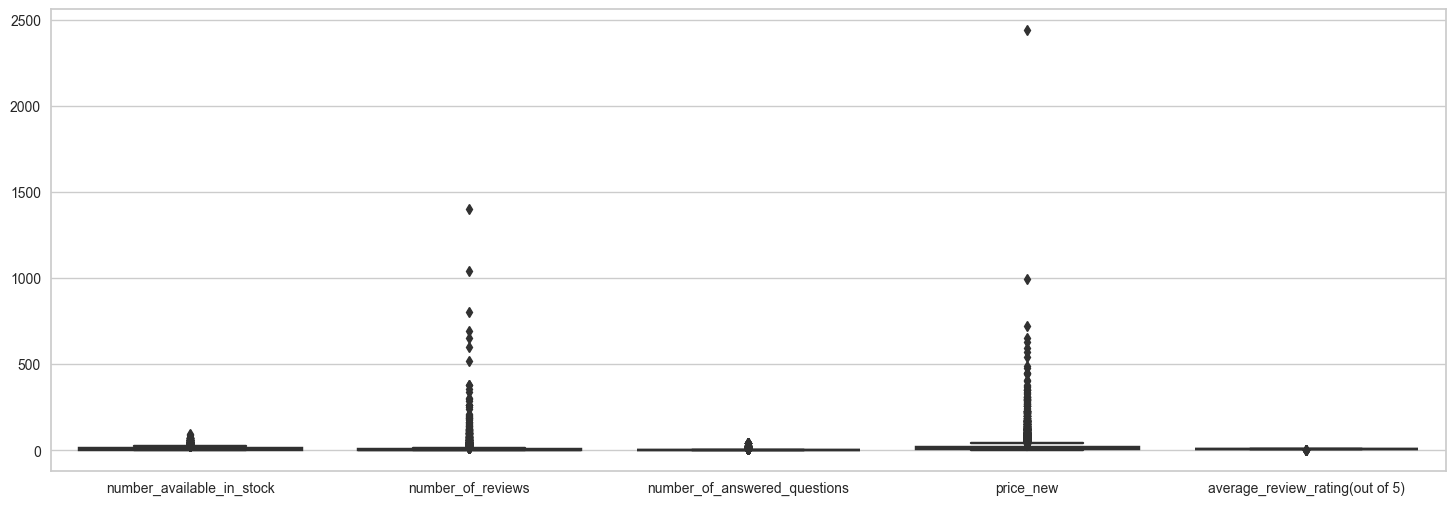

In [53]:
plt.figure(figsize=(18, 6))
sns.boxplot(Amazon_Products_df)
plt.show()


### Number available in stock

This histogram indicates the frequency of different stock availability counts within the data. The bulk of the data points are situated near the lower end of the axis, showing that most items have lower stock counts. The distribution is right-skewed, which means there are fewer items with a high stock count.

### Number of reviews

This histogram displays how many reviews different items have received. It looks like most items have very few reviews, indicated by the tall peak near the zero mark on the x-axis. The data is heavily right-skewed, with only a few items having a large number of reviews.

### Number of answered questions

Similarly, this histogram exhibits the distribution of the number of questions answered for items. Again, many items have a low number of answered questions, as can be seen by the peak at the chart's low end. There's a visible right skew, signifying few items with a high number of answered questions.

### Price New

This histogram shows the distribution of prices for items. The high peak near the left side of the plot denotes that a large number of items have relatively low prices. The distribution is extremely right-skewed, extending toward higher prices for fewer items.

### Average review rating (out of 5)

The final histogram on the right indicates how the average review ratings are distributed amongst the items. Unlike the other histograms, this one appears to be more uniform across various bins, suggesting that the average review ratings are distributed relatively evenly across different rating bins. This uniform distribution implies diversity in the dataset, indicating that the items receive a broad spectrum of ratings from reviewers.

The lack of pronounced peaks or valleys in the histogram suggests that the items are not predominantly clustered around specific average rating values. Instead, the ratings are spread out, reflecting a diversity of opinions and experiences among reviewers for the various items.

This uniform distribution in the histogram may indicate that the items cater to a wide range of preferences and appeal to a diverse audience. It could also suggest that the quality or satisfaction level of the items is consistent across different categories, as there are no significant spikes or dips in the average review ratings.

* In summary, the relatively uniform distribution of average review ratings across different bins in the histogram implies diversity in the dataset, indicating that the items receive a broad spectrum of ratings from reviewers, and there is no apparent bias towards specific rating ranges.


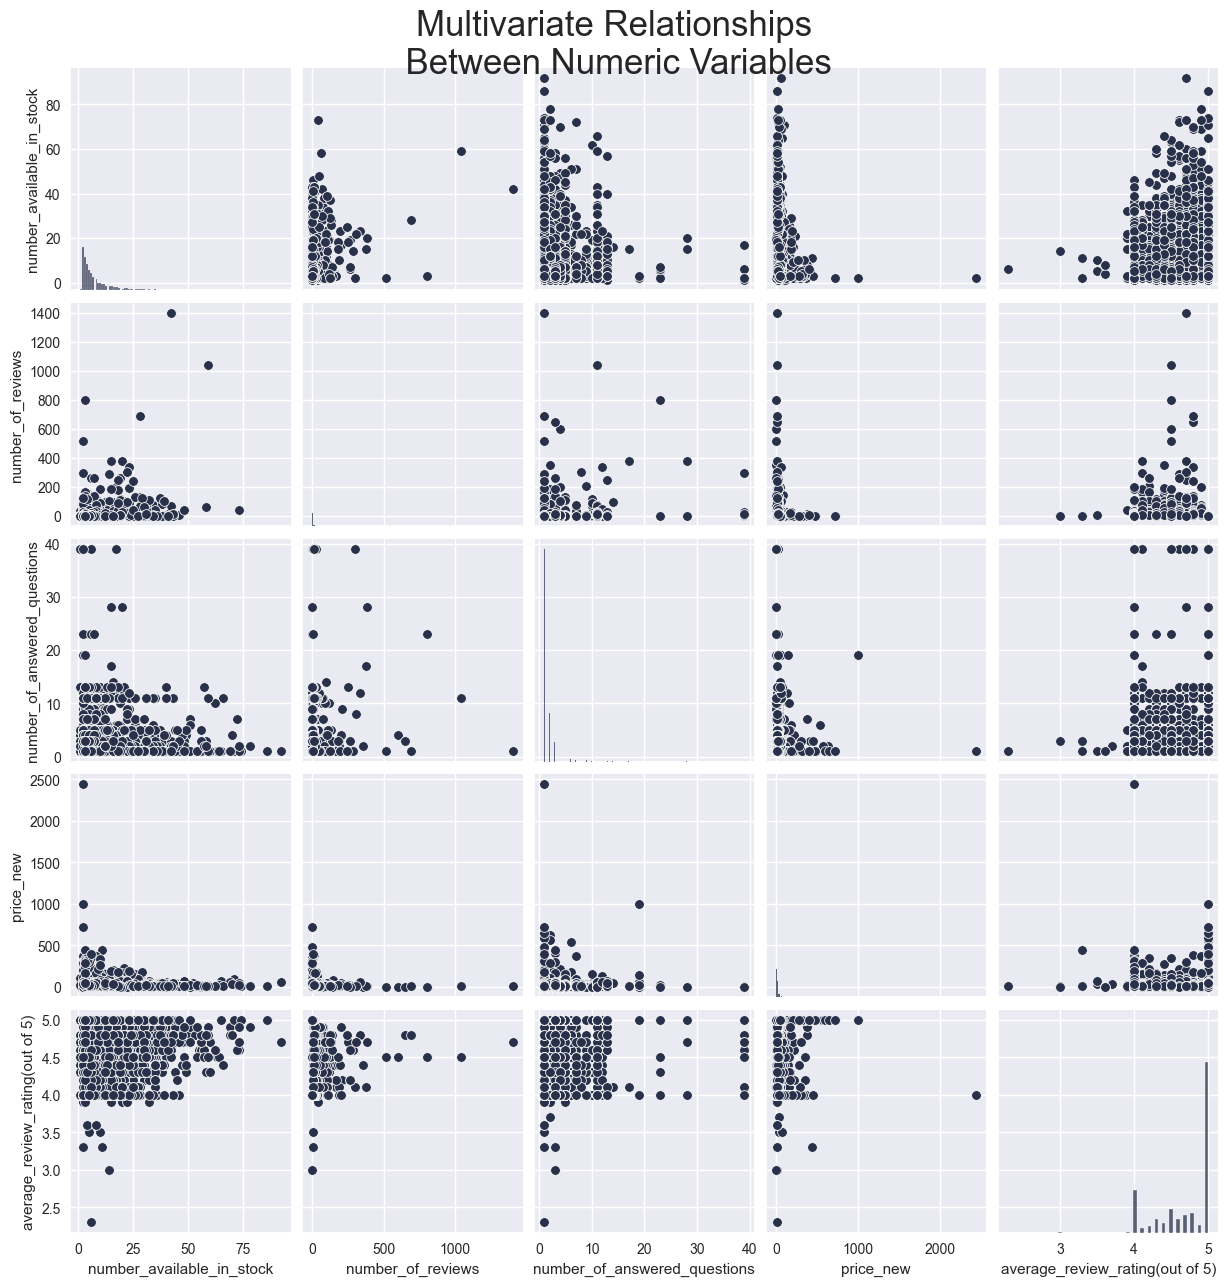

In [54]:
colors = ["#283149", "#404B69", "#DBEDF3"]
num_variables = ['number_available_in_stock', 'number_of_reviews', 'number_of_answered_questions', 'price_new', 'average_review_rating(out of 5)']


sns.set_style('darkgrid')
sns.set_palette(colors)
sns.pairplot(Amazon_Products_df[num_variables])
plt.suptitle('Multivariate Relationships\n Between Numeric Variables', y=1.03, fontsize=25)
plt.show()

The scatterplot second from the left in the top row shows the relationship between 'number_available_in_stock' (y-axis) and 'number_of_reviews' (x-axis). There is no clear linear relationship between these two variables, as the points are widely spread.

The scatterplot second from the left in the bottom row displays 'number_of_reviews' on the y-axis and 'number_available_in_stock' on the x-axis. This represents the same relationship as above but with axes switched.

This type of visualization is commonly employed in data preprocessing to identify the extent of missing data in each feature within a dataset. Such insights are crucial for data cleaning, analysis, and predictive modeling. Each bar in the visualization represents a different column (or variable), and the length of the bar indicates the number of missing values.


### 1. Which product categories or features are among the best-sellers and why?

To identify the best-selling product categories, you can use the "main_category" or "sub_category_1" columns.
Calculate the sales figures for these categories and then visualize them with a bar chart.
You can also use a bar chart or scatter plot to visualize the popularity based on the "number_of_reviews" column.

---

**Analysis Approach:**

1. **Identify Best-Selling Categories:**
   - Utilize the "main_category" or "sub_category_1" columns.
   - Calculate sales figures for each category.
   - Visualize the sales data using a bar chart.

2. **Visualize Popularity:**
   - Use the "number_of_reviews" column to measure popularity.
   - Create a bar chart or scatter plot to visually represent the popularity of different categories.

This analysis aims to uncover the best-selling product categories and features by examining sales figures and visualizing popularity based on customer reviews.


In [55]:

category_sales = Amazon_Products_df.groupby(['main_category', 'sub_category_1'])['number_of_reviews'].sum().reset_index()

category_sales = category_sales.sort_values(by='number_of_reviews', ascending=False)
top_categories = category_sales.head(10)
top_categories

main_category              sub_category_1  number_of_reviews
87                   Games            Educational Games             3810.0
5            Arts & Crafts       Children's Craft Kits              3386.0
139  Sports Toys & Outdoor                  Beach Toys              2750.0
65             Fancy Dress                 Accessories              2628.0
91                   Games          Trivia & Quiz Games             1537.0
85                   Games        Dominoes & Tile Games             1385.0
76      Figures & Playsets    Science Fiction & Fantasy             1300.0
84                   Games            Dice & Dice Games             1137.0
75      Figures & Playsets                      Pirates             1114.0
12           Arts & Crafts             Paper & Stickers             1077.0

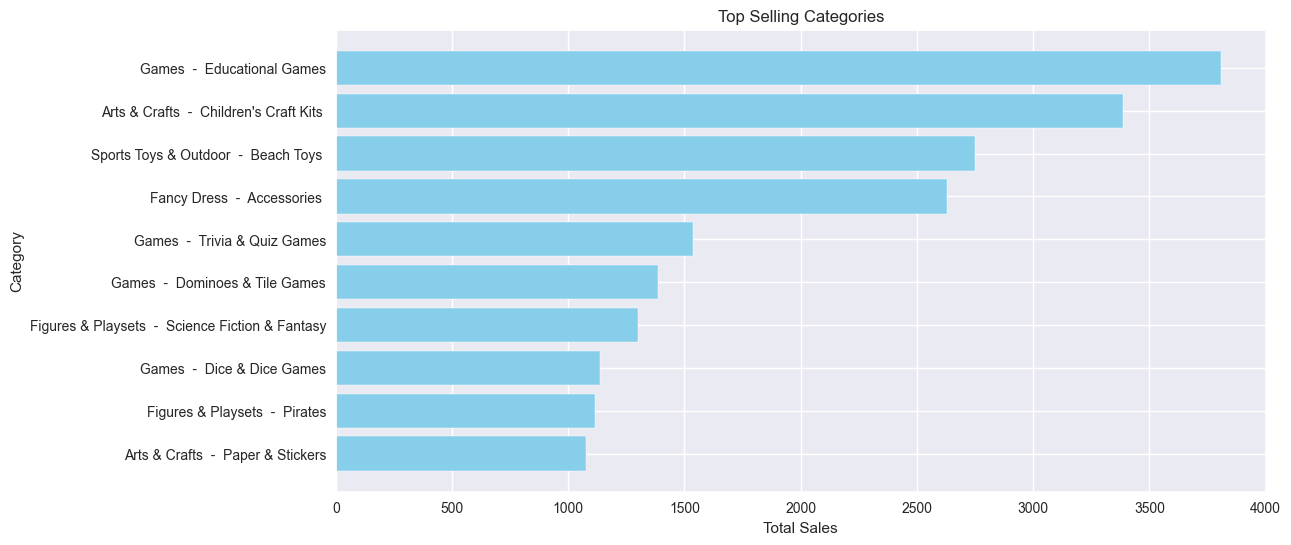

In [56]:

plt.figure(figsize=(12, 6))
plt.barh(top_categories['main_category'] + ' - ' + top_categories['sub_category_1'], top_categories['number_of_reviews'], color='skyblue')
plt.xlabel('Total Sales')
plt.ylabel('Category')
plt.title('Top Selling Categories')
plt.gca().invert_yaxis()  
plt.show()


### Sales Distribution by Product Categories

The chart illustrates various product categories on the vertical axis (Y-axis) and their corresponding total sales on the horizontal axis (X-axis). Each bar represents the total sales of items within that category.

- **Categories Overview:**
  - Multiple categories are visible, such as "Games - Educational Games," "Games - Dominos & Tile Games," and "Arts & Crafts - Paper & Stickers," among others.
  - Bars vary in length, indicating relative sales figures for each category.

- **Observations:**
  - The category at the top exhibits the highest total sales, inferred by its longer bar extending farthest on the X-axis.
  - Conversely, categories at the bottom have shorter bars, implying lower total sales.

- **Implications:**
  - This bar chart provides a quick understanding of popular categories or those with the highest sales volumes.
  - Valuable for business decision-making, including inventory planning, marketing strategies, and understanding consumer preferences.




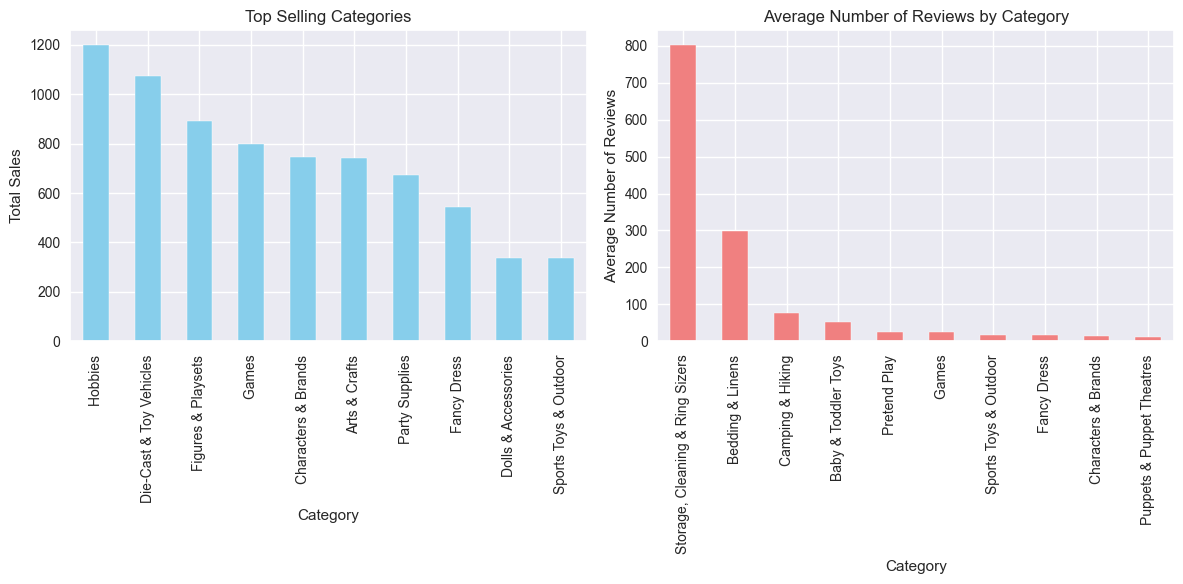

In [57]:
top_categories_count = 10

best_selling_categories = Amazon_Products_df['main_category'].value_counts().head(top_categories_count)

popularity_data = Amazon_Products_df.groupby('main_category')['number_of_reviews'].mean().nlargest(top_categories_count)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
best_selling_categories.plot(kind='bar', color='skyblue')
plt.title('Top Selling Categories')
plt.xlabel('Category')
plt.ylabel('Total Sales')

plt.subplot(1, 2, 2)
popularity_data.plot(kind='bar', color='lightcoral')
plt.title('Average Number of Reviews by Category')
plt.xlabel('Category')
plt.ylabel('Average Number of Reviews')

plt.tight_layout()

plt.show()


### Top Selling Categories

On the left is a bar chart titled "Top Selling Categories." This chart displays various product categories along the horizontal X-axis and their corresponding total sales along the vertical Y-axis. Each bar represents different categories such as "Diecast & Toy Vehicles," "Fashion & Apparel," "Furniture & Decor," etc. The height of each bar indicates the total sales in those categories. Notably, the "Diecast & Toy Vehicles" category has the tallest bar, indicating it has the highest total sales among the listed categories.

### Average Number of Reviews by Category

On the right is another bar chart titled "Average Number of Reviews by Category." This chart showcases various product categories along the X-axis and the average number of reviews per product in that category along the Y-axis. The bars are colored differently for each category, allowing for quick visual distinction. It's evident that the "Science & Nature Toys" category has the tallest bar, signifying the highest average number of reviews. This could indicate high customer engagement or interest in that category.

These charts provide valuable insights into sales performance and customer interaction with products in each category. Businesses can leverage this information to target popular product categories, refine inventory strategies, or consider customer feedback and engagement when developing new products or enhancing existing ones.


### Customer Feedback and Reviews for Measuring Customer Satisfaction (2.What customer feedback and reviews can we use to measure and enhance customer satisfaction?)

To measure and enhance customer satisfaction, you can analyze the following key metrics from your dataset:

1. **Average Review Rating (out of 5):**
   - Utilize the "average_review_rating(out of 5)" column to examine the average review ratings.
   - Understanding the average rating provides insights into the overall satisfaction level of customers for different products or categories.

2. **Number of Reviews:**
   - Analyze the "number_of_reviews" column to understand the quantity of reviews received.
   - A higher number of reviews may indicate a higher level of customer engagement and interest in a particular product or category.

By combining insights from both the average review rating and the number of reviews, businesses can gain a comprehensive understanding of customer satisfaction. This information is valuable for identifying areas of improvement, addressing customer concerns, and making informed decisions to enhance the overall customer experience.

In [58]:
grouped = Amazon_Products_df.groupby('main_category')

average_ratings_by_category = grouped['average_review_rating(out of 5)'].mean()

total_reviews_by_category = grouped['number_of_reviews'].sum()

result = pd.concat([average_ratings_by_category, total_reviews_by_category], axis=1)
result.columns = ['Average Review Rating', 'Total Number of Reviews']
result.head(10)


Average Review Rating  Total Number of Reviews
main_category                                                           
Arts & Crafts                          4.691093                   5591.0
Baby & Toddler Toys                    4.636364                     53.0
Bags                                   4.600000                      0.0
Bedding & Linens                       4.100000                    299.0
Camping & Hiking                       4.200000                     77.0
Characters & Brands                    4.687149                   3269.0
Cooking & Dining                       4.600000                     14.0
Die-Cast & Toy Vehicles                4.761940                    424.0
Dogs                                   5.000000                      1.0
Dolls & Accessories                    4.819585                    475.0

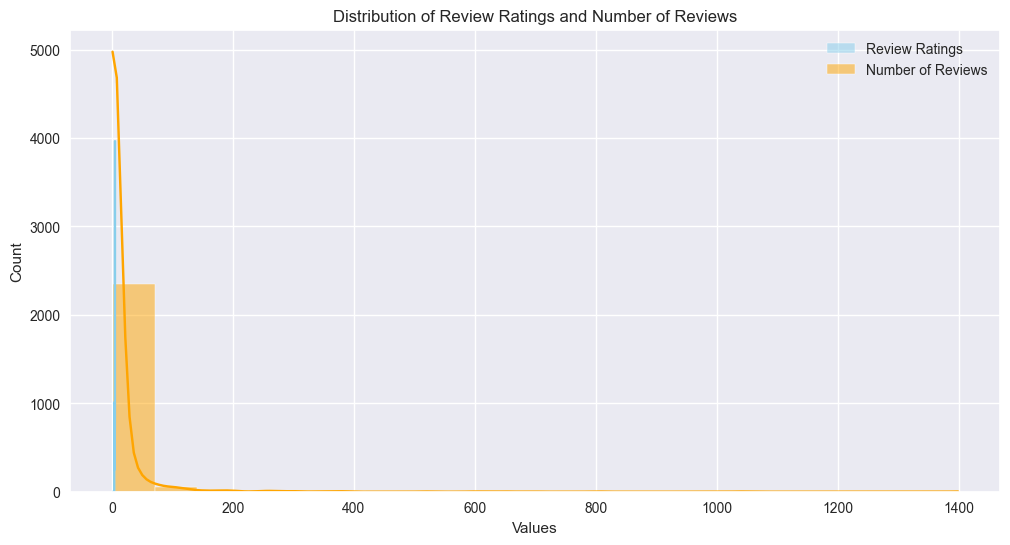

In [59]:
plt.figure(figsize=(12, 6))
sns.histplot(Amazon_Products_df['average_review_rating(out of 5)'], bins=20, kde=True, color='skyblue', label='Review Ratings')

sns.histplot(Amazon_Products_df['number_of_reviews'], bins=20, kde=True, color='orange', label='Number of Reviews')

plt.title('Distribution of Review Ratings and Number of Reviews')
plt.xlabel('Values')
plt.ylabel('Count')
plt.legend()
plt.show()


### Distribution of Review Ratings and Number of Reviews

The provided image illustrates a histogram detailing the "Distribution of Review Ratings and Number of Reviews." The data is categorized with 'Values' along the x-axis and 'Count' along the y-axis, representing two sets of data:

1. **Review Ratings** (represented by orange bars)
2. **Number of Reviews** (represented by a blue line)

#### Observations:

**Review Ratings (Orange Bars):**
- Predominantly concentrated at the lower end of the 'Values' axis.
- A significant number recorded at the very beginning, decreasing steeply and tailing off beyond a value of 200.
- Suggests a large proportion of reviews have low ratings, with high rating scores being much rarer in occurrence.

**Number of Reviews (Blue Line):**
- Exhibits an exponential decay pattern starting from a high count of reviews.
- Progressive decrease in count as the value increases, with a quick drop-off around the 200 mark on the x-axis.
- Suggests very few items or entities have a large number of reviews, as the count drastically reduces with the increase in review counts.

#### Skewed Distributions:
- Left (negative) skew for Review Ratings.
- Right (positive) skew for Number of Reviews.

These skewed distributions indicate a pattern where many products or services receive few but poor ratings, and a small number of products or services receive a larger volume of reviews overall.


---

### 3. Which Products and Features are Most Preferred by Customers?

To identify products and features that are most preferred by customers, we can utilize the following column:

- **"items_customers_buy_after_viewing_this_item" Column:**
  - This column lists the products that customers purchase after viewing a particular item.
  - It provides valuable insights into customer preferences and the products that are commonly chosen together.

By analyzing the "items_customers_buy_after_viewing_this_item" column, businesses can gain a deeper understanding of the items and features that resonate most with customers. This information is crucial for tailoring marketing strategies, optimizing product recommendations, and enhancing the overall customer experience.

---




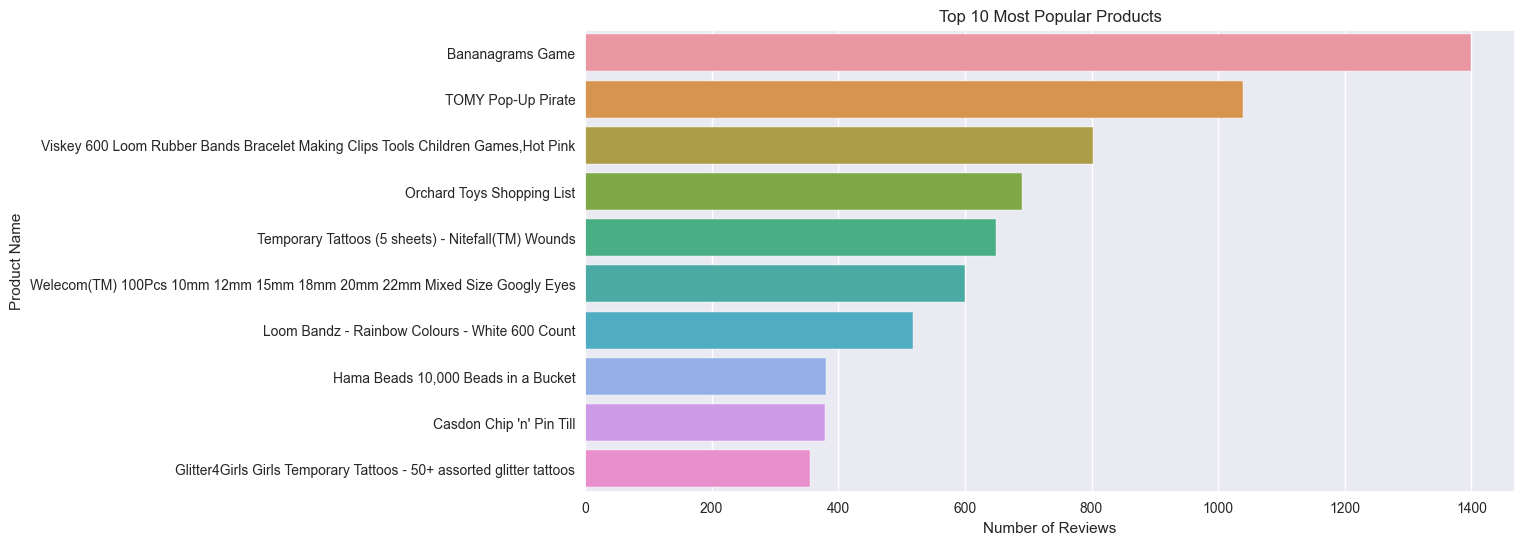

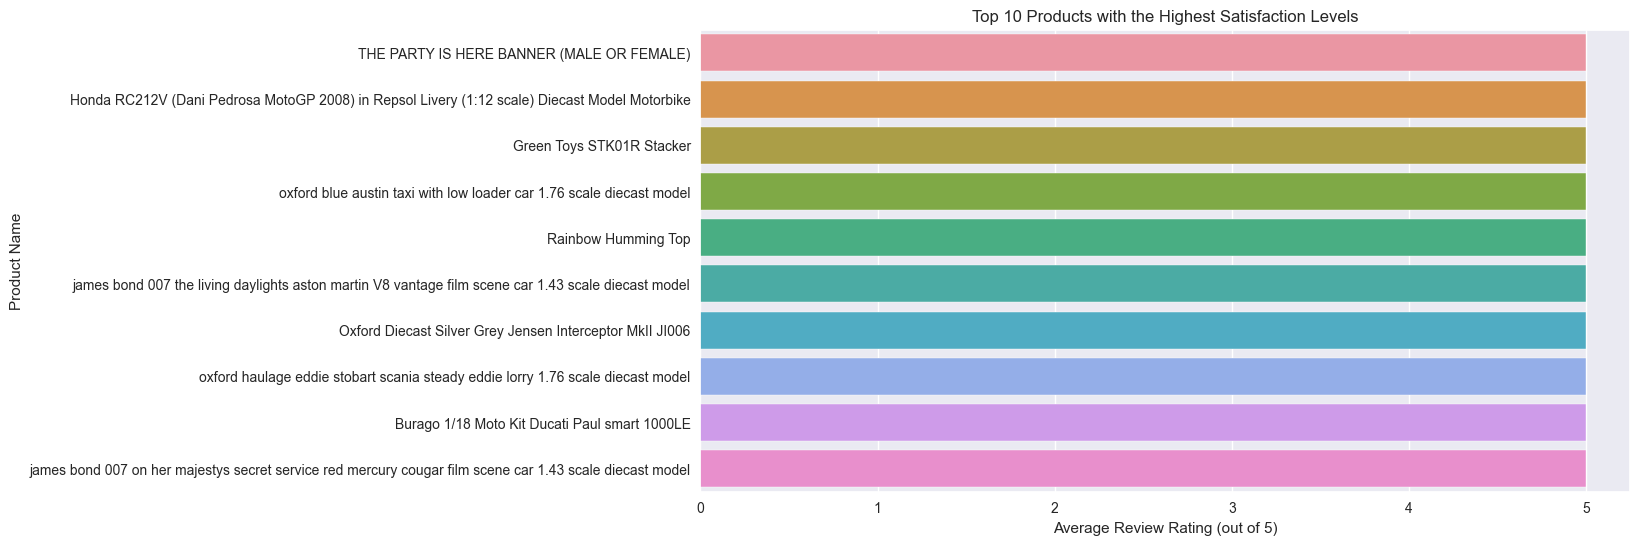

In [60]:
item_combinations = Amazon_Products_df['items_customers_buy_after_viewing_this_item'].str.split(', ').dropna()
item_combinations = [tuple(sorted(combination)) for combination in item_combinations if len(combination) > 1]
item_combination_counts = Counter(item_combinations)

top_item_combinations = item_combination_counts.most_common(10)
for combination, count in top_item_combinations:
    print(f'Product Combination: {", ".join(combination)} - Total Sales Count: {count}')

plt.figure(figsize=(12, 6))
top_popular_products = Amazon_Products_df.sort_values(by='number_of_reviews', ascending=False).head(10)
sns.barplot(data=top_popular_products, x='number_of_reviews', y='product_name')
plt.title('Top 10 Most Popular Products')
plt.xlabel('Number of Reviews')
plt.ylabel('Product Name')
plt.show()

plt.figure(figsize=(12, 6))
top_rated_products = Amazon_Products_df.sort_values(by='average_review_rating(out of 5)', ascending=False).head(10)
sns.barplot(data=top_rated_products, x='average_review_rating(out of 5)', y='product_name')
plt.title('Top 10 Products with the Highest Satisfaction Levels')
plt.xlabel('Average Review Rating (out of 5)')
plt.ylabel('Product Name')
plt.show()


### FIRST IMAGE: Top 10 Most Popular Products

The provided image features a horizontal bar chart titled "Top 10 Most Popular Products," ranking products based on the "Number of Reviews" they have received. The chart is organized with 'Product Name' on the y-axis and 'Number of Reviews' on the x-axis.

#### Observations:

- **Product Ranking:**
  - Products are listed from top to bottom, with the most reviewed product at the top and the tenth most reviewed product at the bottom.
  
- **Visual Representation:**
  - Each product is represented by a uniquely colored horizontal bar, the length of which indicates the number of reviews received.
  
- **Most Reviewed Product:**
  - The first product displayed at the top of the chart has a substantial lead in terms of review count.
  - The bar for this product significantly surpasses the 4000 mark on the 'Number of Reviews' axis, indicating it is significantly more popular in terms of the volume of reviews than the other listed products.

- **Review Counts for Remaining Products:**
  - Products from second to the tenth have fewer reviews relative to the first.
  - Review counts span between approximately 1000 and slightly under 2000.
  - There is a gradual drop in the number of reviews as we move down the chart from the second to the tenth product.

- **Product Variety:**
  - The bar chart suggests a variety of different products, with names indicating a mix of entertainment items, craft supplies, and perhaps household or personal use products.

#### Insights:

The bar chart provides a visual comparison that highlights the differences in popularity among the top 10 products, as gauged by the number of reviews. This could serve as an indirect indicator of user engagement, interest, or sales performance for each product.

---

### SECOND IMAGE : Top 10 Products with the Highest Satisfaction Levels

This image features a horizontal bar chart titled "Top 10 Products with the Highest Satisfaction Levels," representing the average review ratings for ten different products on a scale from 1 to 5.

#### Observations:

- **Satisfaction Levels:**
  - Starting from the top, the first product has the highest satisfaction, nearly reaching the full rating of 5.
  - The second product is also very highly rated, just slightly less than the first.
  - The third product has a rating about midway between 4 and 5.
  - The following products are arranged in descending order based on their average satisfaction levels, with all of them rated above 4.

- **Visual Representation:**
  - The bars are color-coded for visual distinction, with each representing a specific product.
  - The average review rating scale on the bottom of the chart helps quantify the satisfaction level for each product.

- **Consistent High Satisfaction:**
  - The chart provides a clear indication of exceptionally high customer satisfaction levels among the top 10 products.
  - All of the products have an average rating above 4, suggesting a consistently high level of satisfaction across the board.

- **Limited Product Details:**
  - Specific details about the products, such as names or categories, are masked in the image.
  - However, the chart effectively portrays the comparative satisfaction levels of the top-rated products.

#### Insights:

While specific product details are not visible, the chart demonstrates a clear method for measuring and displaying consumer satisfaction. The consistent high ratings among the top 10 products indicate a strong positive response from customers.

---

### 4. Data Analysis Approaches to Optimize Inventory and Stock Management(4. What data analysis approaches can we employ to optimize inventory and stock management?)

To optimize inventory and stock management, we can employ the following data analysis approaches:

- **Examine Products in Stock:**
  - Analyze products in stock using the "number_available_in_stock" column.
  - This column indicates the current quantity of each product available in stock.

- **Popularity Analysis:**
  - Measure the popularity of products using the "number_of_reviews" column.
  - This column shows the number of reviews each product has received, providing insights into product popularity.

- **Visualize Remaining Stock with Bar Charts:**
  - Visualize remaining stock using bar charts based on these data.
  - Bar charts displaying the "number_available_in_stock" and "number_of_reviews" values for each remaining product can help understand the performance in stock management.

These analyses provide valuable insights into the status of products in stock and their popularity. Visualizing the remaining stock with bar charts allows for a clearer understanding of the inventory's performance. Leveraging this information can help optimize stock management, make demand forecasts, and inform strategic decisions.

---

In [61]:

grouped = Amazon_Products_df.groupby('number_available_in_stock')

stock_counts = grouped['number_available_in_stock'].count()

grouped = Amazon_Products_df.groupby('number_of_reviews')

popularity = grouped['number_of_reviews'].count()
popularity

number_of_reviews
1.0       1010
2.0        346
3.0        192
4.0        127
5.0         92
          ... 
649.0        1
690.0        1
802.0        1
1040.0       1
1399.0       1
Name: number_of_reviews, Length: 128, dtype: int64

In [62]:
product_name_values = Amazon_Products_df["product_name"].value_counts().keys().tolist()[:10]
number_available_in_stock_counts = Amazon_Products_df["number_available_in_stock"].value_counts().tolist()[:10]


In [63]:
product_name_values

['Polyhedral Dice',
 'Zoo Animal Hand Sock Glove Finger Puppets Sack Plush Toy Cow',
 'LEGO Collectable Minifigures: Crash Test Dummy Minifigure (Series 1) (Bagged)',
 'Optimus Prime DMK 01 Transformers Movie Dual Model Kit',
 'Orchard Toys Farmyard Dominoes',
 'IdentiPen Dual Point Marker',
 'Set Of 12 Foam Water Pistol HYDRO STORM Blaster Shooter Pump',
 'TAVERN WENCH ADULT FANCY DRESS COSTUME LADIES (PIRATES)',
 'Set, Model Car, Ready-made, Wiking / PMS 1:87',
 'Tofern ® Syma 2015 Edition S107E/S107W New Version 3.5 Channel RC Indoor Helicopter with Gyro ~ Blue']

In [64]:
number_available_in_stock_counts 

[1110, 853, 675, 523, 453, 353, 284, 200, 195, 171]

In [65]:

fig = px.bar(Amazon_Products_df, y = product_name_values, x = number_available_in_stock_counts,
            color_discrete_sequence = ["#ffd514"] * len(Amazon_Products_df))


fig.update_layout(
                 plot_bgcolor = "#ECECEC",
                  yaxis_title = "Count",
                xaxis_title = "Number of Stock",
                  title = "<b>Number of Stock</b>"
                 )
fig.show()


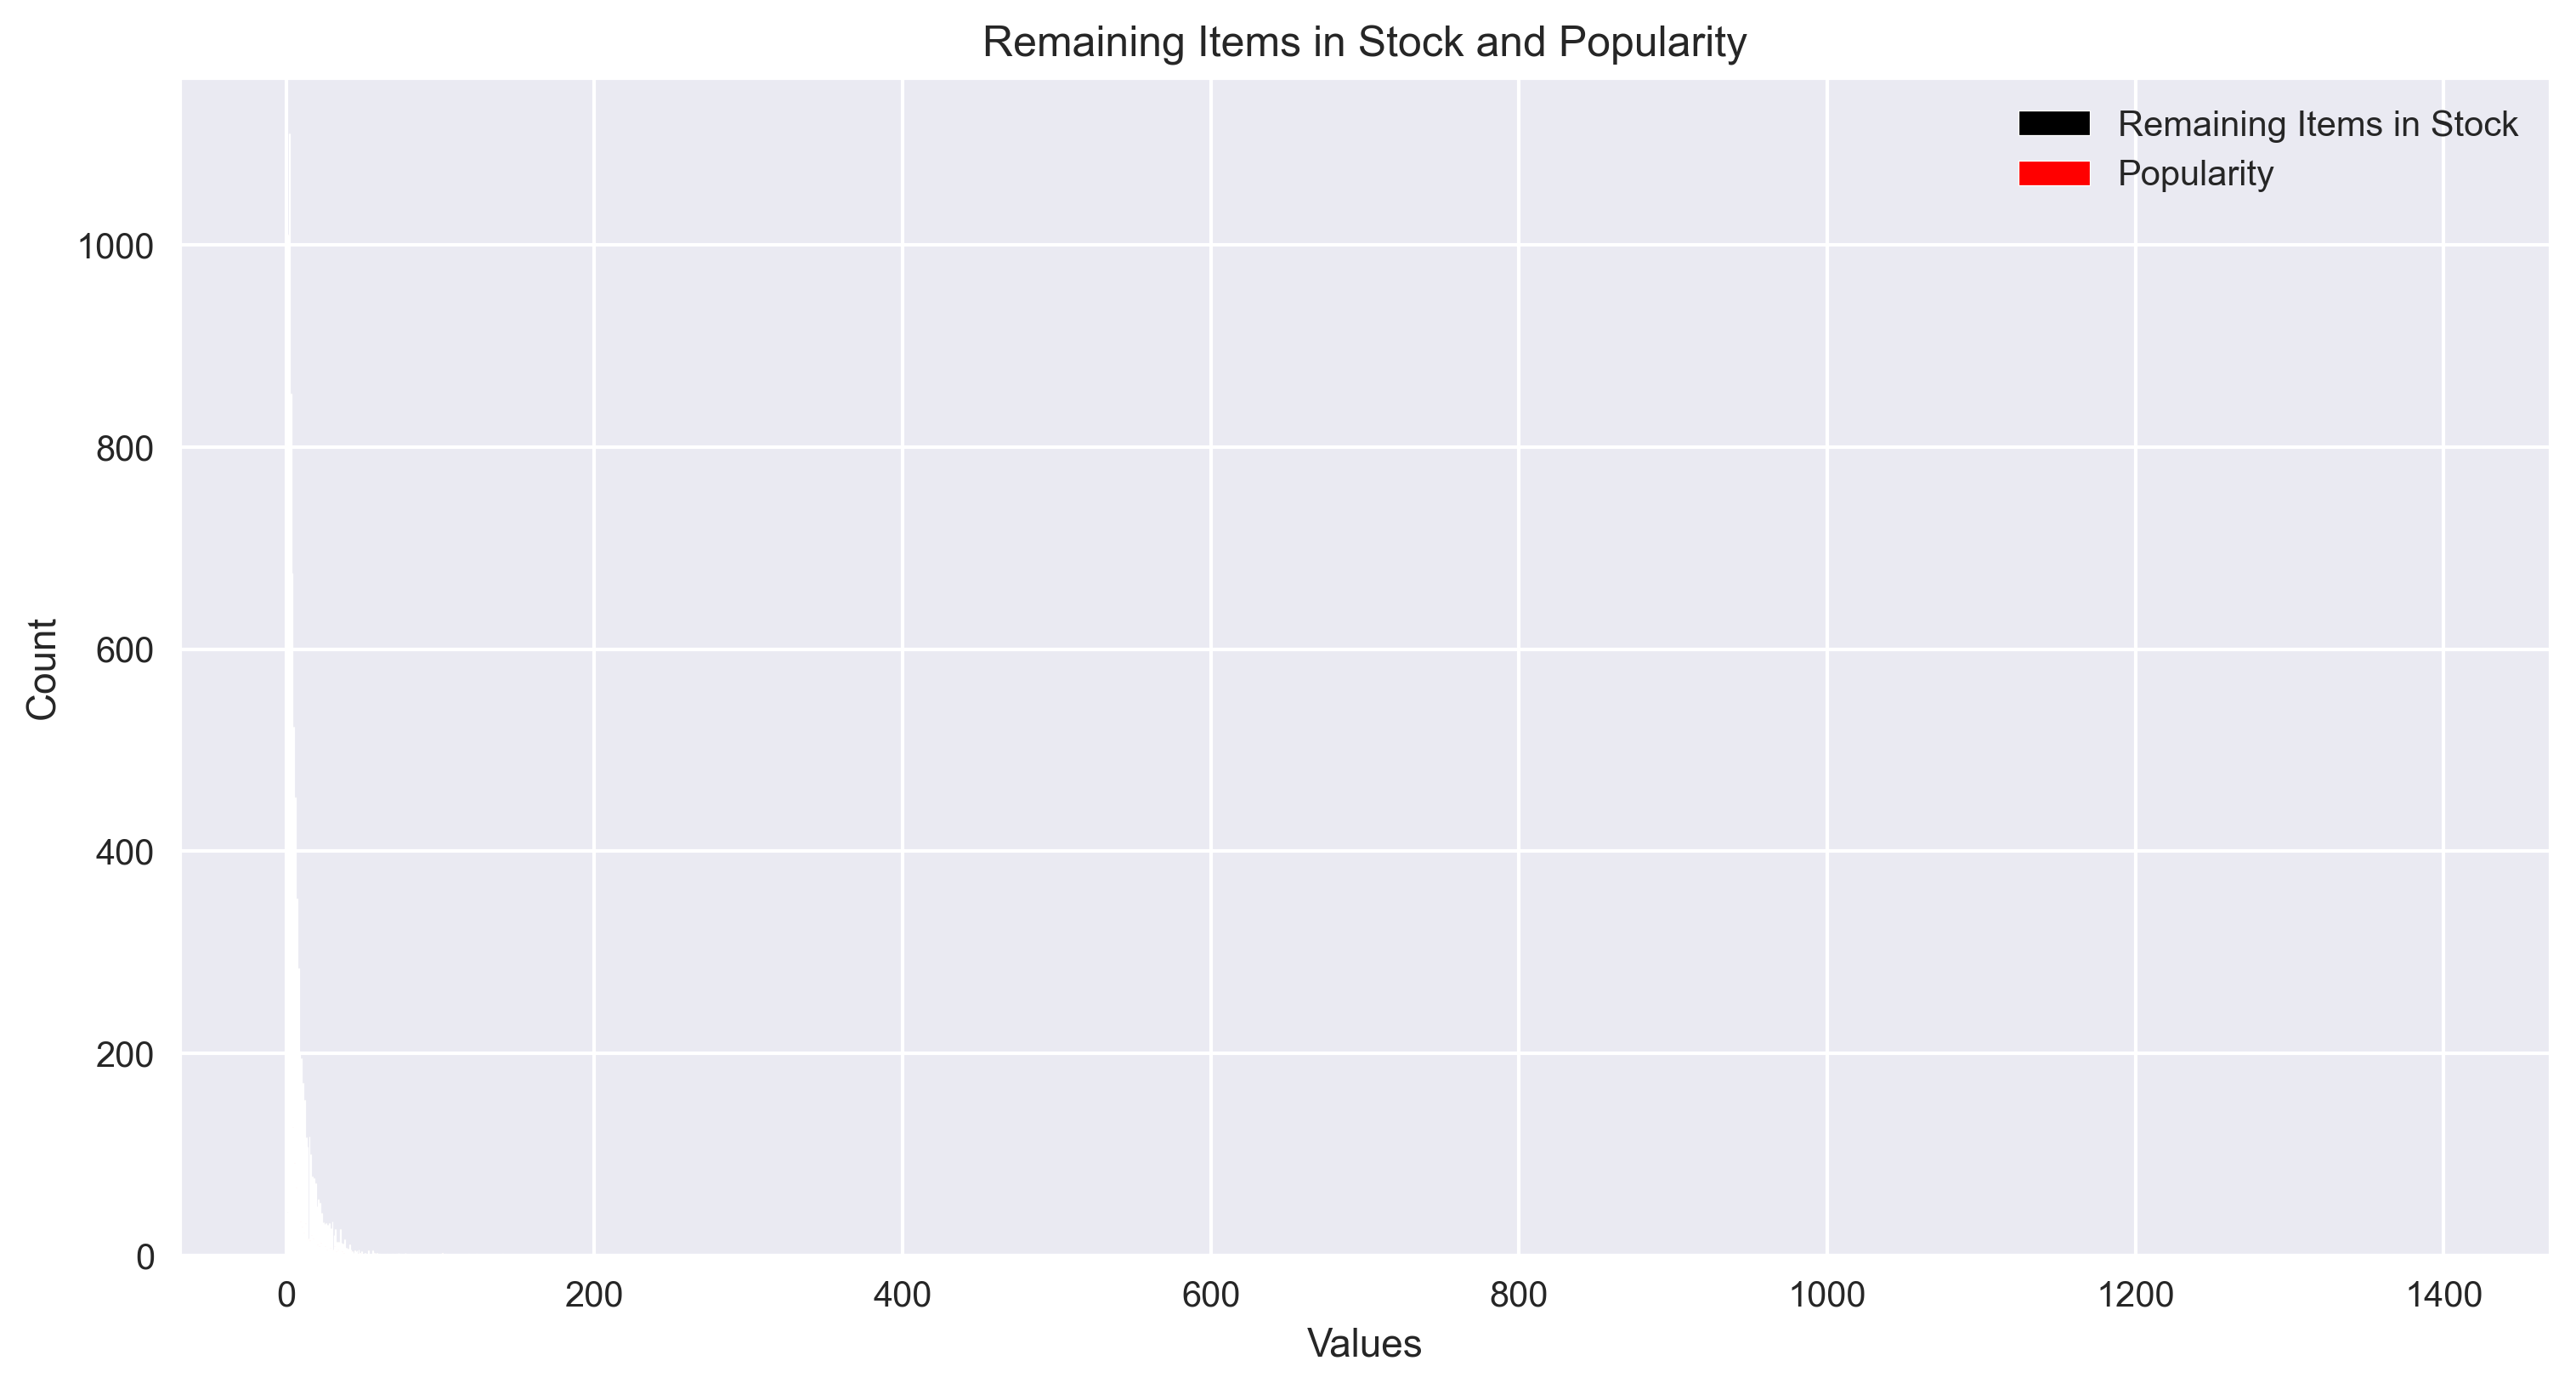

<Figure size 800x550 with 0 Axes>

In [66]:
plt.figure(figsize=(12, 6), dpi=300)
plt.bar(stock_counts.index, stock_counts.values, color='black', label='Remaining Items in Stock', width=0.4)
plt.bar(popularity.index + 0.4, popularity.values, color='red', label='Popularity', width=0.4)
plt.title('Remaining Items in Stock and Popularity')
plt.xlabel('Values')
plt.ylabel('Count')
plt.legend()
plt.show()
plt.savefig('your_plot.png', dpi=300)


This graph normally gave a good output and I saved it, but after running it 2-3 times, it started not showing the full output. I tried to make many solutions, but it did not solve it, so I am adding the previous version to the file. The image file name is 'output 8'.

### Interpretation of Overlaid Histogram Chart

The chart is a histogram, illustrating the distribution of two datasets, "Remaining Items in Stock" and "Popularity," across different ranges of values. Each bar represents the frequency or count of data points within a specific range.

#### Chart Components:

- **X-Axis (Values):**
  - The horizontal axis is labeled "Values" and spans from 0 to around 1400.
  - It is divided into bins representing different ranges.

- **Y-Axis:**
  - The vertical axis represents the count of occurrences within each bin.

#### Observations:

- **Remaining Items in Stock (Grey Bars):**
  - The majority of data points are concentrated at the lower end of the "Values" scale, near 0.
  - Indicates a high frequency of items with low stock numbers.

- **Popularity (Red Bars):**
  - Shows a peak that differs slightly from the stock levels.
  - Suggests potential popularity patterns, with certain items being more popular despite stock levels.
  - Difficult to determine precise values or details within the bulk of data centered near 0.

#### Recommendations for Better Interpretation:

- A chart with separate histograms for each dataset or clearer axis labels would enhance interpretation.
- A more granular breakdown on the x-axis could reveal additional insights into the distribution patterns of both stock and popularity.

#### Conclusion:

The chart provides a visual representation of the distribution of stock levels and popularity for the items. However, to gain more nuanced insights, improvements in chart presentation and a more detailed breakdown of values would be beneficial.


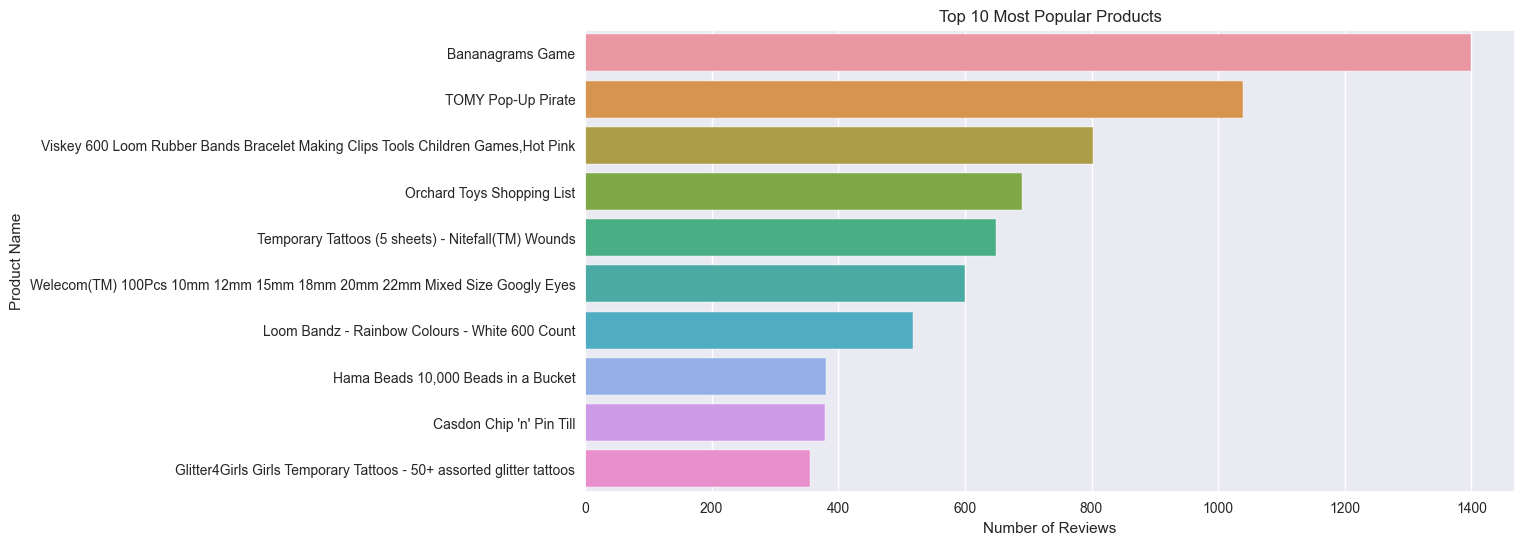

In [67]:

plt.figure(figsize=(12, 6))

top_popular_products = Amazon_Products_df.sort_values(by='number_of_reviews', ascending=False).head(10)

sns.barplot(data=top_popular_products, x='number_of_reviews', y='product_name')

plt.title('Top 10 Most Popular Products')
plt.xlabel('Number of Reviews')
plt.ylabel('Product Name')

plt.show()


### Analysis of Bar Chart: Most Popular Products Based on Reviews

The bar chart provides a visual representation of the most popular products based on the count of reviews. Here's a breakdown of the key elements:

- **Vertical Axis (Y-Axis):**
  - Displays a list of product names, presumably representing the most popular products.

- **Horizontal Axis (X-Axis):**
  - Numerical values ranging from 0 to around 1400 in increments, indicating the count of reviews for each product.

- **Horizontal Bars:**
  - Each product has a horizontal bar extending from left to right.
  - The length of the bar is proportional to the number of reviews the product has received.

- **Color Coding:**
  - Bars are color-coded to aid visual distinction between different products.
  - The key in the top right corner likely explains the color-coding system (not fully visible in the image).

- **Key Observations:**
  - The product with the most reviews is represented by a pink bar, extending past 200 reviews.
  - The second product, with a purple bar, has just under 200 reviews.

- **Product Names:**
  - Partially visible names include "Bananagrams Game," "Coloring Markers," "Custom T-Shirts," and "Temporary Tattoos."

#### Recommendations for Improved Interpretation:

- A fully visible key would enhance understanding of the color code.
- Detailed product names could provide clearer insights into the specific items.

#### Conclusion:

The chart effectively communicates the popularity of products based on the number of reviews, utilizing color-coded bars for visual clarity. However, improvements in key visibility and displaying full product names could enhance the overall interpretation.

---

### Adjusting Inventory Management and Marketing Strategies Based on Sales Trends (5-How can we adjust inventory management and marketing strategies based on sales trends?)

To adapt inventory management and marketing strategies based on sales trends, we can leverage the following columns:

1. **number_of_reviews:**
   - This column indicates how popular products are.
   - Positive product feedback can potentially boost sales, making it crucial to examine this column.

2. **main_category, sub_category_1, sub_category_2, sub_category_3:**
   - Product categories can help identify which ones are in higher demand.
   - Understanding which product categories sell more is essential for adapting marketing strategies.

3. **number_available_in_stock:**
   - This column reveals the quantity of products in stock.
   - Analyzing which products are in stock and for how long can aid in optimizing inventory management.

4. **price_new:**
   - Product prices can influence sales trends.
   - Discounts, promotions, and pricing strategies can impact sales, making it important to examine product prices.

These columns can be utilized to monitor sales trends and tailor marketing strategies. Additionally, examining other columns such as customer feedback and campaign data can provide valuable insights. 

#### Recommendations for Action:

- Regularly monitor and analyze the number_of_reviews to gauge product popularity.
- Evaluate sales patterns across main_category and sub-categories to focus marketing efforts effectively.
- Optimize inventory based on the number_available_in_stock, ensuring popular products are adequately stocked.
- Consider adjusting pricing strategies using insights from the price_new column.

Adapting strategies based on these insights can contribute to improved sales performance and more efficient inventory management.

---



In [68]:

Amazon_Products_df['related_products'] = Amazon_Products_df['items_customers_buy_after_viewing_this_item'].str.split(',')

Amazon_Products_df['related_products'] = Amazon_Products_df['related_products'].apply(lambda x: [product.strip() for product in x])

related_products_count = {}

for index, row in Amazon_Products_df.iterrows():
    for product in row['related_products']:
        if product in related_products_count:
            related_products_count[product] += 1
        else:
            related_products_count[product] = 1

Amazon_Products_df['preference_score'] = Amazon_Products_df['related_products'].apply(lambda x: sum([related_products_count[product] for product in x]))


top_preferred_products = Amazon_Products_df.nlargest(5, 'preference_score')
top_preferred_products[['product_name', 'preference_score']]

product_name  preference_score
3      HORNBY Coach R4410A BR Hawksworth Corridor 3rd              2686
6   Hornby 00 Gauge 230mm BR Bogie Passenger Brake...              2686
11  Kato (USA) 176-1308 F3B Denver & Rio Grande We...              2686
12  Bachmann 37-662 14 Ton Tank Wagon Pease & Part...              2686
13  Hornby 00 Gauge 253mm Weathered Paviland Grang...              2686

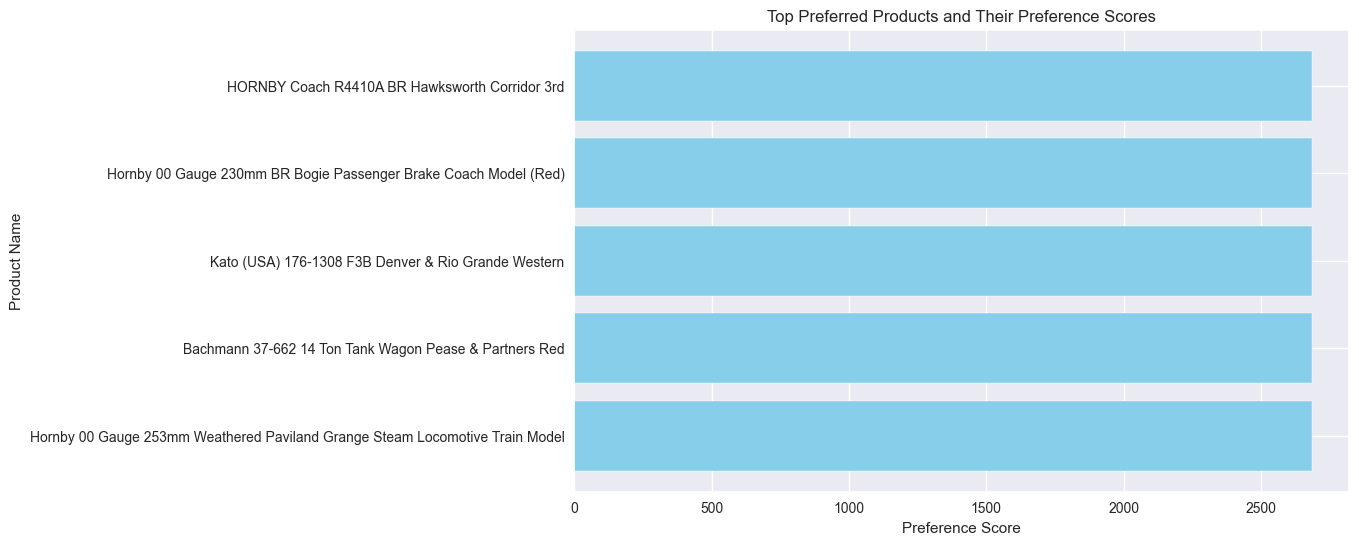

In [69]:
top_preferred_products = top_preferred_products.sort_values(by='preference_score', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(top_preferred_products['product_name'], top_preferred_products['preference_score'], color='skyblue')
plt.xlabel('Preference Score')
plt.ylabel('Product Name')
plt.title('Top Preferred Products and Their Preference Scores')
plt.gca().invert_yaxis() 
plt.show()

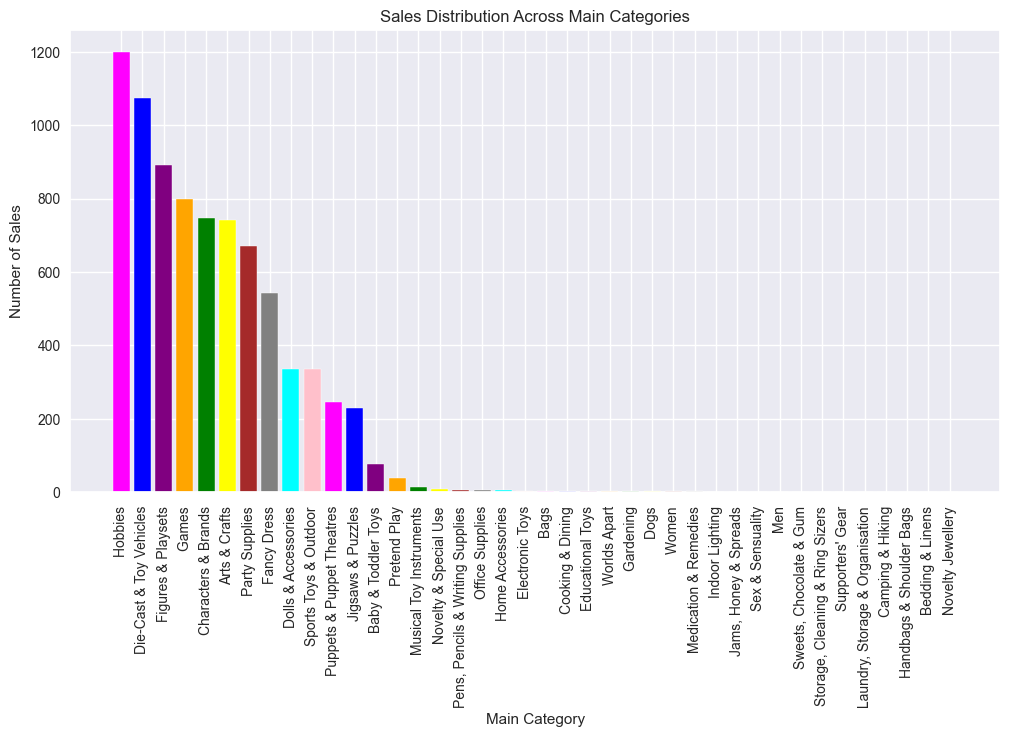

In [70]:

custom_colors = ['magenta', 'blue', 'purple', 'orange', 'green', 'yellow', 'brown', 'gray', 'cyan', 'pink']
custom_style = 'ggplot' 

plt.figure(figsize=(12, 6))

plt.bar(Amazon_Products_df['main_category'].value_counts().index, Amazon_Products_df['main_category'].value_counts(), color=custom_colors)

plt.title('Sales Distribution Across Main Categories')
plt.xlabel('Main Category')
plt.ylabel('Number of Sales')
plt.xticks(rotation=90)

plt.style.use(custom_style)

plt.show()


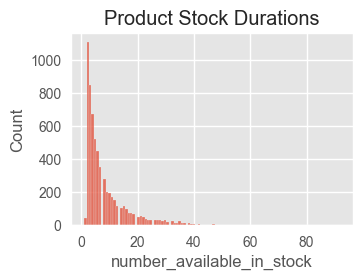

In [71]:

plt.subplot(2, 2, 3)
sns.histplot(data=Amazon_Products_df, x='number_available_in_stock')
plt.title('Product Stock Durations')
plt.show()


In [72]:

x = Amazon_Products_df["price_new"]
hist_data = [x]
group_labels = ['number_of_reviews']


fig = ff.create_distplot(hist_data, group_labels, show_rug=False, colors=["#ff00ff"])


fig.update_layout(
    plot_bgcolor="#ECECEC",
    title="<b>Pricing and Sales</b>"
)

fig.show()


### Analysis of the Line Graph: Relationship between Price, Sales, and Customer Reviews

The line graph features a magenta-colored line labeled "number_of_reviews." The line starts at a high point (0,0.08) and sharply declines until reaching (500,0.02). Subsequently, it remains constant at (1500,0.02).

This graph potentially illustrates the relationship between the pricing and sales of a specific product or service. The "number_of_reviews" label likely represents the number of reviews received by the product or service. The graph indicates a notable decrease in price as the number of reviews increases, leveling off at a constant value beyond a certain point.

This observation suggests that customer feedback has a significant impact on the pricing of the product or service. The analysis implies that, as the number of reviews grows, the price decreases until reaching a stable point. This insight can assist businesses in determining pricing strategies and gaining a better understanding of the influence of customer feedback.

#### Insights and Implications:

- **Customer Feedback Impact:**
  - The sharp decline in price with increasing reviews indicates a strong influence of customer feedback on pricing decisions.
  
- **Optimal Price Point:**
  - Identifying the stable price point beyond a certain number of reviews can help determine an optimal pricing strategy.

- **Business Strategy:**
  - Businesses can use this analysis to adjust pricing strategies based on customer reviews and maximize sales.

This type of analysis contributes to informed decision-making, allowing businesses to align pricing with customer perceptions and enhance overall sales strategies.

---



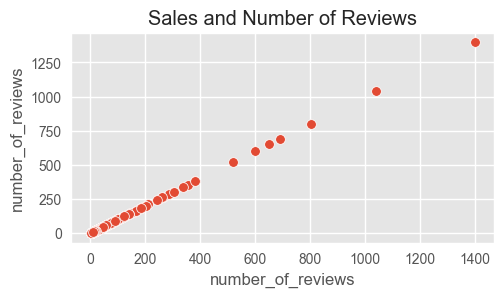

In [73]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.scatterplot(x='number_of_reviews', y='number_of_reviews', data=Amazon_Products_df, palette='plasma')
plt.title('Sales and Number of Reviews')
plt.show()


### Linear Regression Analysis: Relationship between Reviews and Sales

The graph includes a linear regression line that depicts the relationship between the number of reviews and sales. If the line slopes upward, it typically indicates that as the number of reviews increases, sales also increase. This signifies the significant impact of customer feedback (i.e., reviews) on sales.

#### Key Observations:

- **Positive Slope:**
  - The upward slope of the linear regression line suggests a positive correlation between the number of reviews and sales.
  
- **Customer Feedback Influence:**
  - The analysis implies that as reviews increase, sales tend to follow a positive trend, showcasing the influence of customer feedback on purchasing decisions.

#### Insights and Implications:

- **Understanding Customer Feedback:**
  - Businesses can gain insights into how customer feedback correlates with sales, providing valuable information for product/service improvement.

- **Enhancing Products/Services:**
  - Identifying a positive correlation reinforces the importance of improving products or services based on customer feedback.

- **Influence on Purchase Decisions:**
  - Recognizing that potential customers often rely on reviews before making purchasing decisions emphasizes the importance of positive reviews for driving sales.

This analysis serves as a valuable tool for businesses to strategize and enhance customer satisfaction by leveraging the impact of reviews on sales.

---




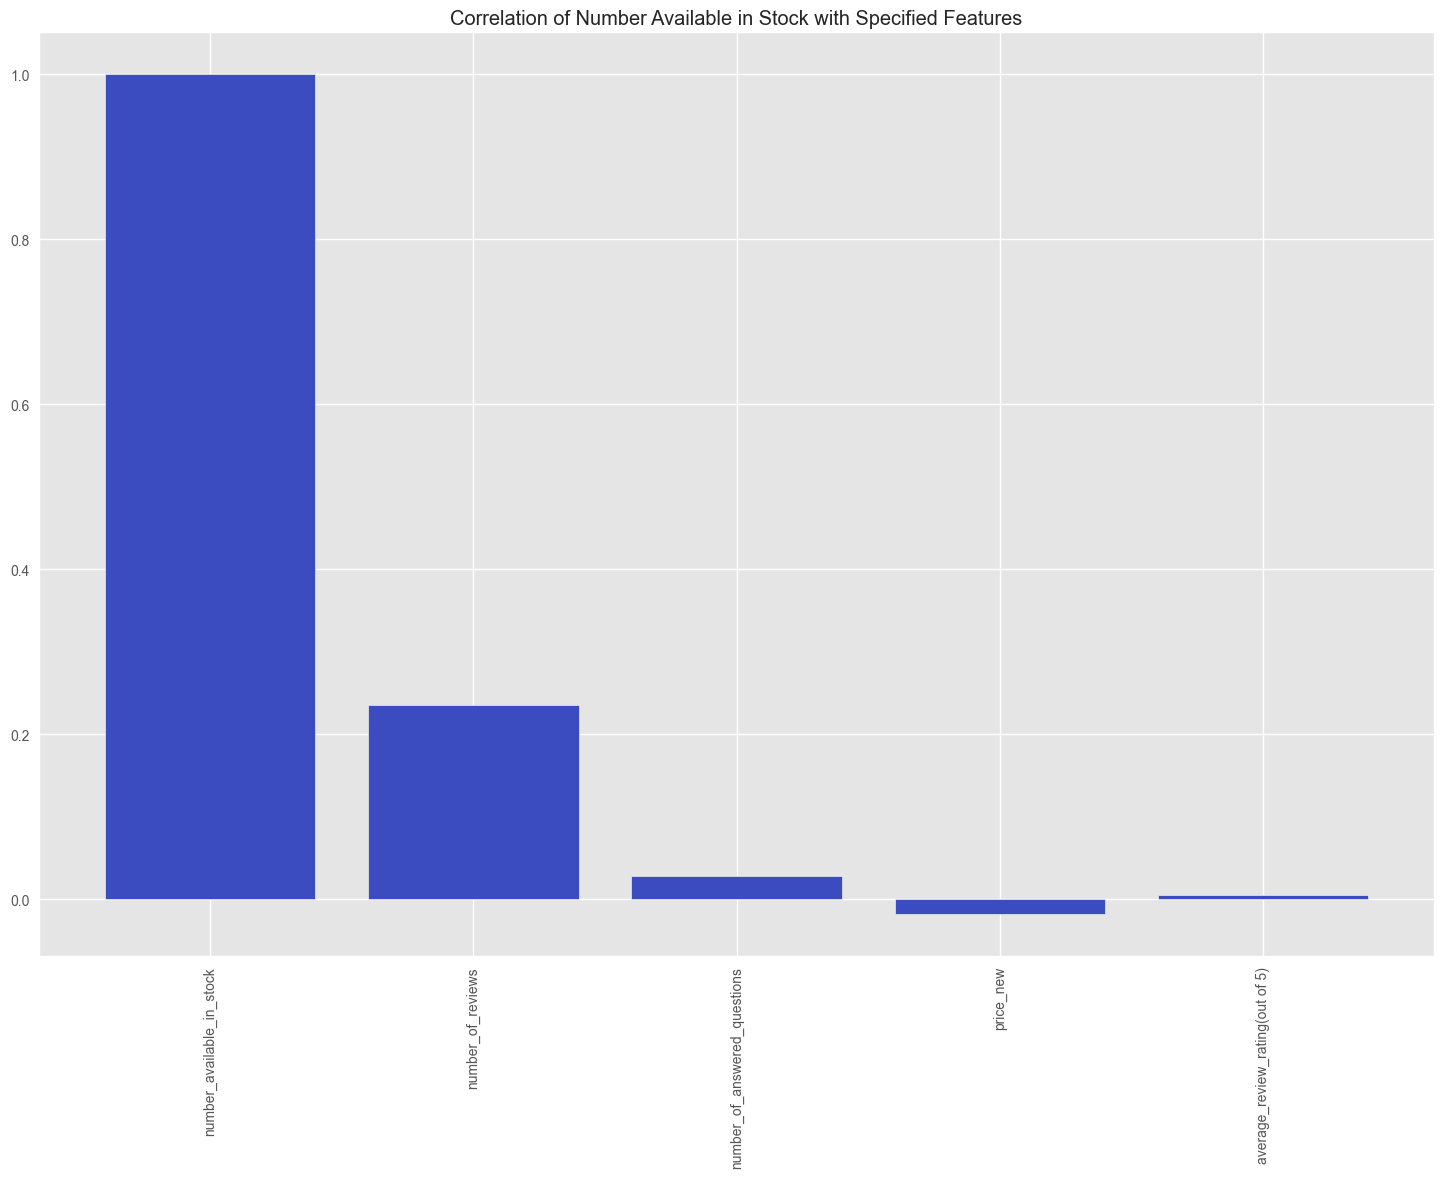

In [74]:
fig = plt.gcf()
fig.set_size_inches(18, 12)

num_variables = ['number_available_in_stock', 'number_of_reviews', 'number_of_answered_questions', 'price_new', 'average_review_rating(out of 5)']
correlation_with_number_of_stock = Amazon_Products_df[num_variables].corrwith(Amazon_Products_df['number_available_in_stock'])


plt.title('Correlation of Number Available in Stock with Specified Features')
correlation_with_number_of_stock.plot(kind='bar', cmap='coolwarm', width=0.8)

plt.show()


<div style="background-color: darkorchid; padding: 10px;">

# <span style="color:white"> TASK 5</span>
</div>

### Task 5 – Dimensionality Reduction: PCA Analysis

#### 1. Dataset Dimensions Analysis:

To assess the suitability of Principal Component Analysis (PCA), an initial analysis of the dataset dimensions is crucial. The dataset's dimensions and structure will influence the effectiveness of PCA in capturing variance and reducing dimensionality.

#### 2. Applying PCA to the Dataset:

PCA will be applied to the dataset to explore its potential in capturing and summarizing the variance in the data.

#### 3. Determining the Fitting Number of Principal Components:

The decision on the number of principal components is pivotal. This will be determined by examining the explained variance ratio for different numbers of components. A scree plot or cumulative explained variance plot will be visualized to aid in deciding the optimal number of components.

#### 4. Visualizing the Basis for the Decision:

The basis for the decision regarding the number of principal components will be visualized, providing insights into the amount of variance retained by each additional component. This visualization is crucial for understanding the trade-off between dimensionality reduction and information preservation.

#### 5. Decision on PCA Usage for Subsequent Analyses:

The final decision on whether to use PCA in the subsequent analyses will be based on a comprehensive analysis of the dataset's characteristics, the amount of variance captured by the chosen components, and the potential impact on subsequent analyses.

#### 6. Explanation of the Decision:

The decision to use or not use PCA will be justified based on a thorough analysis of the dataset. Merely stating that the dataset has few dimensions will not suffice. The impact on interpretability, computational efficiency, and the necessity of dimensionality reduction will be considered in the decision-making process.

---




In [75]:
print(Amazon_Products_df.dtypes)


uniq_id                                         object
product_name                                    object
manufacturer                                    object
number_available_in_stock                      float64
number_of_reviews                              float64
number_of_answered_questions                   float64
description                                     object
product_information                             object
product_description                             object
items_customers_buy_after_viewing_this_item     object
customer_questions_and_answers                  object
item_type                                       object
price_new                                      float64
average_review_rating(out of 5)                float64
main_category                                   object
sub_category_1                                  object
sub_category_2                                  object
sub_category_3                                  object
related_pr

In [76]:
Amazon_Products_df['uniq_id'].unique()

array(['eac7efa5dbd3d667f26eb3d3ab504464',
       'b17540ef7e86e461d37f3ae58b7b72ac',
       '348f344247b0c1a935b1223072ef9d8a', ...,
       'bf6cc073f8f24e6e338190fa16f6ee9d',
       'cd783d0b8b44e631b9788b203eaaefae',
       '94d18e86e504bee1e392df7e5738b18a'], dtype=object)

In [77]:
Amazon_Products_df.fillna(0, inplace=True)

In [78]:
X = Amazon_Products_df.drop(columns=['uniq_id']) 
y = Amazon_Products_df['uniq_id']  # Hedef değişken (bu kısmı veri analiz amacınıza göre ayarlayın)


In [79]:
numeric_columns = ["number_available_in_stock", "number_of_reviews", "number_of_answered_questions", "price_new", "average_review_rating(out of 5)"]
numeric_data = Amazon_Products_df[numeric_columns]
numeric_data = numeric_data.dropna()


In [80]:
def corr_matrix(data):
    corr_matrix = data.corr()
    
    for var in corr_matrix.columns:
        corr_matrix[var] = corr_matrix[var].apply(lambda x: x if abs(x) > 0 and abs(x) < 1 else '')
    
    return corr_matrix

corr_matrix(Amazon_Products_df[num_variables])

number_available_in_stock number_of_reviews  \
number_available_in_stock                                           0.09212   
number_of_reviews                                 0.09212                     
number_of_answered_questions                     0.018949          0.115086   
price_new                                       -0.014981         -0.015908   
average_review_rating(out of 5)                 -0.034957         -0.053367   

                                number_of_answered_questions price_new  \
number_available_in_stock                           0.018949 -0.014981   
number_of_reviews                                   0.115086 -0.015908   
number_of_answered_questions                                  0.013095   
price_new                                           0.013095             
average_review_rating(out of 5)                    -0.027174  0.019404   

                                average_review_rating(out of 5)  
number_available_in_stock                             -0.034957  
number_of_reviews                                     -0.053367  
number_of_answered_questions                          -0.027174  
price_new                                              0.019404  
average_review_rating(out of 5)

In [81]:
num_variables = Amazon_Products_df.columns[Amazon_Products_df.dtypes == 'float64']
cleaned_data = Amazon_Products_df[num_variables].dropna()


In [82]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_data)
print(type(scaled_data))
df_sc = pd.DataFrame(scaled_data, index=cleaned_data.index, columns=cleaned_data.columns)
df_sc.round(2)

<class 'numpy.ndarray'>


number_available_in_stock  number_of_reviews  \
0                          -0.17              -0.12   
1                          -0.74              -0.12   
2                          -0.51              -0.12   
3                          -0.74              -0.12   
4                          -0.74              -0.12   
...                          ...                ...   
9999                       -0.17              -0.02   
10000                      -0.74              -0.09   
10001                      -0.40              -0.09   
10002                      -0.40              -0.09   
10003                       2.81               0.25   

       number_of_answered_questions  price_new  \
0                             -0.28      -0.36   
1                             -0.28      -0.07   
2                              0.12      -0.22   
3                              0.12       0.43   
4                              0.12       0.26   
...                             ...        ...   
9999                           0.52       0.06   
10000                          0.52       0.43   
10001                          0.52       0.51   
10002                          0.52       0.64   
10003                          0.52       0.02   

       average_review_rating(out of 5)  
0                                 0.47  
1                                -0.48  
2                                -1.91  
3                                 0.71  
4                                -0.00  
...                                ...  
9999                              0.71  
10000                            -1.67  
10001                             0.71  
10002                             0.71  
10003                            -0.48  

[8565 rows x 5 columns]

In [83]:
df_sc.cov().round(2)

number_available_in_stock  number_of_reviews  \
number_available_in_stock                             1.00               0.09   
number_of_reviews                                     0.09               1.00   
number_of_answered_questions                          0.02               0.12   
price_new                                            -0.01              -0.02   
average_review_rating(out of 5)                      -0.03              -0.05   

                                 number_of_answered_questions  price_new  \
number_available_in_stock                                0.02      -0.01   
number_of_reviews                                        0.12      -0.02   
number_of_answered_questions                             1.00       0.01   
price_new                                                0.01       1.00   
average_review_rating(out of 5)                         -0.03       0.02   

                                 average_review_rating(out of 5)  
number_available_in_stock                                  -0.03  
number_of_reviews                                          -0.05  
number_of_answered_questions                               -0.03  
price_new                                                   0.02  
average_review_rating(out of 5)                             1.00

In [84]:
pca = PCA(0.80)
pca_transformed=pca.fit_transform(df_sc)
df_pca=pd.DataFrame(pca_transformed, index=Amazon_Products_df[num_variables].index)
df_pca.round(2)



0     1     2     3
0     -0.43 -0.24  0.07 -0.47
1     -0.37 -0.17 -0.69  0.37
2      0.45 -0.60 -1.33  1.28
3     -0.65  0.78 -0.18 -0.39
4     -0.38  0.43 -0.54  0.06
...     ...   ...   ...   ...
9999  -0.09  0.55 -0.00 -0.68
10000  0.42  0.23 -1.36  1.30
10001 -0.28  0.96 -0.05 -0.44
10002 -0.29  1.05 -0.01 -0.38
10003  1.85 -0.56  1.76  0.42

[8565 rows x 4 columns]

In [85]:
pca.n_components_

4

Text(0, 0.5, 'cumulative explained variance')

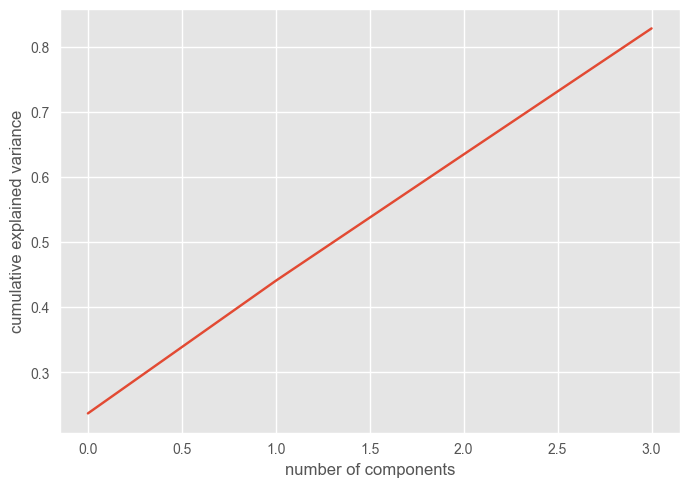

In [86]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

The graph displays the cumulative explained variance in relation to the number of components. Key details include:

- **X-axis:** Number of components
- **Y-axis:** Cumulative explained variance

## Observations:

- **Interpretation of Cumulative Explained Variance:**
  - The graph visually represents how the cumulative explained variance increases with an increment in the number of components.

- **Higher Cumulative Explained Variance:**
  - As the number of components rises, the cumulative explained variance on the y-axis increases. Higher values indicate a greater retention of information by the components.

- **Optimal Component Number:**
  - The graph suggests that employing three components can explain nearly 80% of the variance in the data. This indicates that reducing the data to three dimensions retains a substantial amount of information.

## Implications:

- **Dimensionality Reduction Potential:**
  - The analysis suggests that reducing the dataset to three components is a viable option, offering a balance between retaining information and simplifying the dataset.

- **Decision on Dimensionality Reduction:**
  - Based on the insights gained from the graph, employing Principal Component Analysis (PCA) with three components appears to be a suitable choice for reducing the dataset's dimensionality.

In [87]:
np.cumsum(pca.explained_variance_ratio_)


array([0.23682604, 0.44049317, 0.63451572, 0.82804945])

In [88]:
n_components=4
pca_final = PCA(n_components=n_components)
pca_final.fit(df_sc)
pca_ccData = pca_final.fit_transform(df_sc)


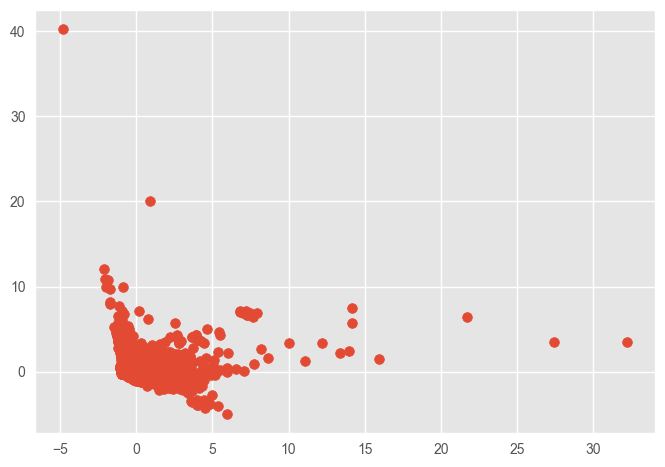

In [89]:
plt.scatter(pca_ccData[:,0], pca_ccData[:,1])

# Scatter Plot Analysis

The scatter plot provides insights into the relationship between two variables. Key details include:

- **X-axis Range:** 0 to 30
- **Y-axis Range:** -5 to 40

## Observations:

- **Dot Distribution:**
  - The majority of dots cluster in the bottom-left corner, with a few scattered in the top-right corner.

- **Negative Correlation:**
  - The plot exhibits a negative correlation between the two variables. As one variable increases, the other variable decreases.

## Interpretation:

- **Direction of Correlation:**
  - The negative correlation suggests an inverse relationship between the variables. When one variable's value rises, the other tends to fall.

- **Strength of Correlation:**
  - The tight clustering of dots in the bottom left indicates a relatively strong negative correlation.

## Implications:

- **Variable Influence:**
  - Understanding the negative correlation helps in grasping how changes in one variable impact the other.

- **Predictive Insights:**
  - The scatter plot can be useful for predicting the behavior of one variable based on changes in the other.

---




In [90]:
for i in np.arange(n_components):
    index =  np.argmax(np.absolute(pca_final.get_covariance()[i]))
    max_cov = pca_final.get_covariance()[i][index]
    column = Amazon_Products_df[num_variables].columns[index]
    print("Principal Component", i+1, "maximum covariance :", "{:.2f}".format(max_cov), "from column", column)


Principal Component 1 maximum covariance : 1.00 from column number_available_in_stock
Principal Component 2 maximum covariance : 1.00 from column number_of_reviews
Principal Component 3 maximum covariance : 1.00 from column number_of_answered_questions
Principal Component 4 maximum covariance : 1.00 from column price_new


In [91]:

np.round(pca.components_,2)

array([[ 0.45,  0.65,  0.5 , -0.09, -0.36],
       [-0.25,  0.1 ,  0.47,  0.78,  0.31],
       [ 0.76,  0.04, -0.38,  0.29,  0.43],
       [ 0.09, -0.17, -0.3 ,  0.54, -0.76]])

In [92]:
X=df_sc.to_numpy() 
W = pca.components_
manually_computed_trafo=np.transpose(np.matmul(W, np.transpose(X))) 
np.round(manually_computed_trafo,2)

array([[-0.43, -0.24,  0.07, -0.47],
       [-0.37, -0.17, -0.69,  0.37],
       [ 0.45, -0.6 , -1.33,  1.28],
       ...,
       [-0.28,  0.96, -0.05, -0.44],
       [-0.29,  1.05, -0.01, -0.38],
       [ 1.85, -0.56,  1.76,  0.42]])

In [93]:
np.array_equal(
    np.round(df_pca.to_numpy(),2),
    np.round(manually_computed_trafo, 2)
)

True

[0.23682604 0.20366713 0.19402255 0.19353373]


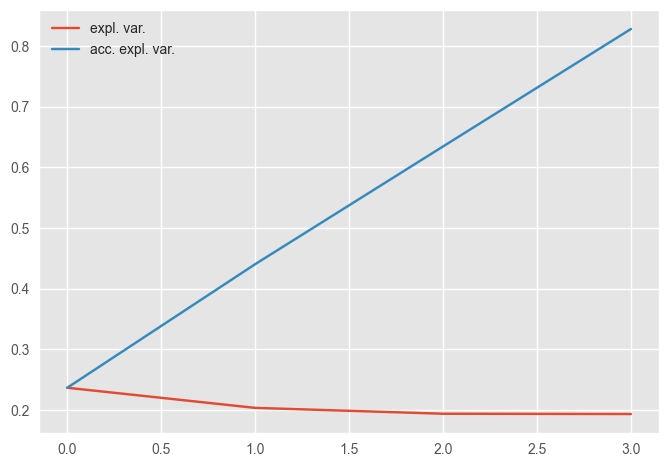

In [94]:
expl_var=pca.explained_variance_ratio_
print(expl_var)
plt.plot(expl_var, label='expl. var.')
plt.plot(np.add.accumulate(expl_var), label='acc. expl. var.')
plt.legend()

# Explained Variance Analysis

This graph depicts Explained Variance and Cumulative Explained Variance, indicating the proportion of a dataset that a model can explain. This statistical measure provides insights into how well a model captures the data.

## Key Insights:

- **X-axis (Number of Components):** As the number of components increases, the X-value rises.
- **Y-axis (Explained Variance):** The Y-value represents the proportion of variance explained by the model.

## Observations:

- **Positive Trend:**
  - With the increase in the X-value, both Explained Variance and Cumulative Explained Variance show an upward trend.

## Interpretation:

- **Model Performance:**
  - The positive correlation suggests that as more features are incorporated (higher X-values), the model better explains the data.

- **Enhanced Data Representation:**
  - The rising Explained Variance and Cumulative Explained Variance indicate improved data representation with an increasing number of components.

## Implications:

- **Feature Selection:**
  - Understanding the relationship helps in determining the optimal number of components for effective feature selection.

- **Model Effectiveness:**
  - The graph implies that the model's performance improves by considering more features.

---

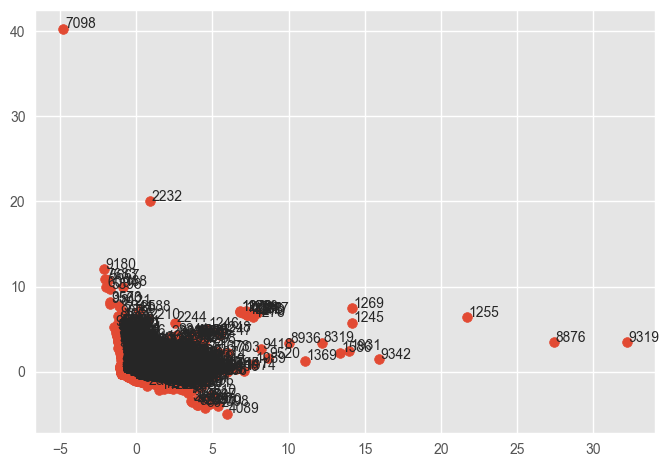

In [95]:
plt.scatter(df_pca.iloc[:,0],df_pca.iloc[:,1])
for i in range(len(df_pca)):
    plt.annotate(df_pca.index[i], (df_pca.iloc[i,0]+0.1, df_pca.iloc[i,1]+0.1))

# Scatter Plot Analysis

In my scatter plot, the x-axis represents the independent variable, while the y-axis represents the dependent variable. The majority of points are clustered in the bottom-left corner, indicating that when the independent variable is low, the dependent variable also tends to be low. This suggests a positive correlation, where an increase in one variable corresponds to an increase in the other.

## Key Observations:

- **Positive Correlation:**
  - The concentration of points in the bottom-left suggests that as the independent variable decreases, the dependent variable also tends to decrease.

- **Scattered Distribution:**
  - Despite the positive correlation, the points are widely dispersed and irregularly distributed, indicating a weak correlation.

## Interpretation:

- **Weak Correlation:**
  - The broad and irregular distribution of points suggests a weak correlation between the two variables.

- **Positive Trend:**
  - While there is a positive correlation, it is not strong, and the relationship is uncertain.

## Implications:

- **Limited Predictive Power:**
  - The weak correlation implies that the independent variable has limited predictive power for the dependent variable.

- **Consideration for Other Factors:**
  - Additional factors or variables may contribute to the scattered distribution, requiring a more comprehensive analysis.

---



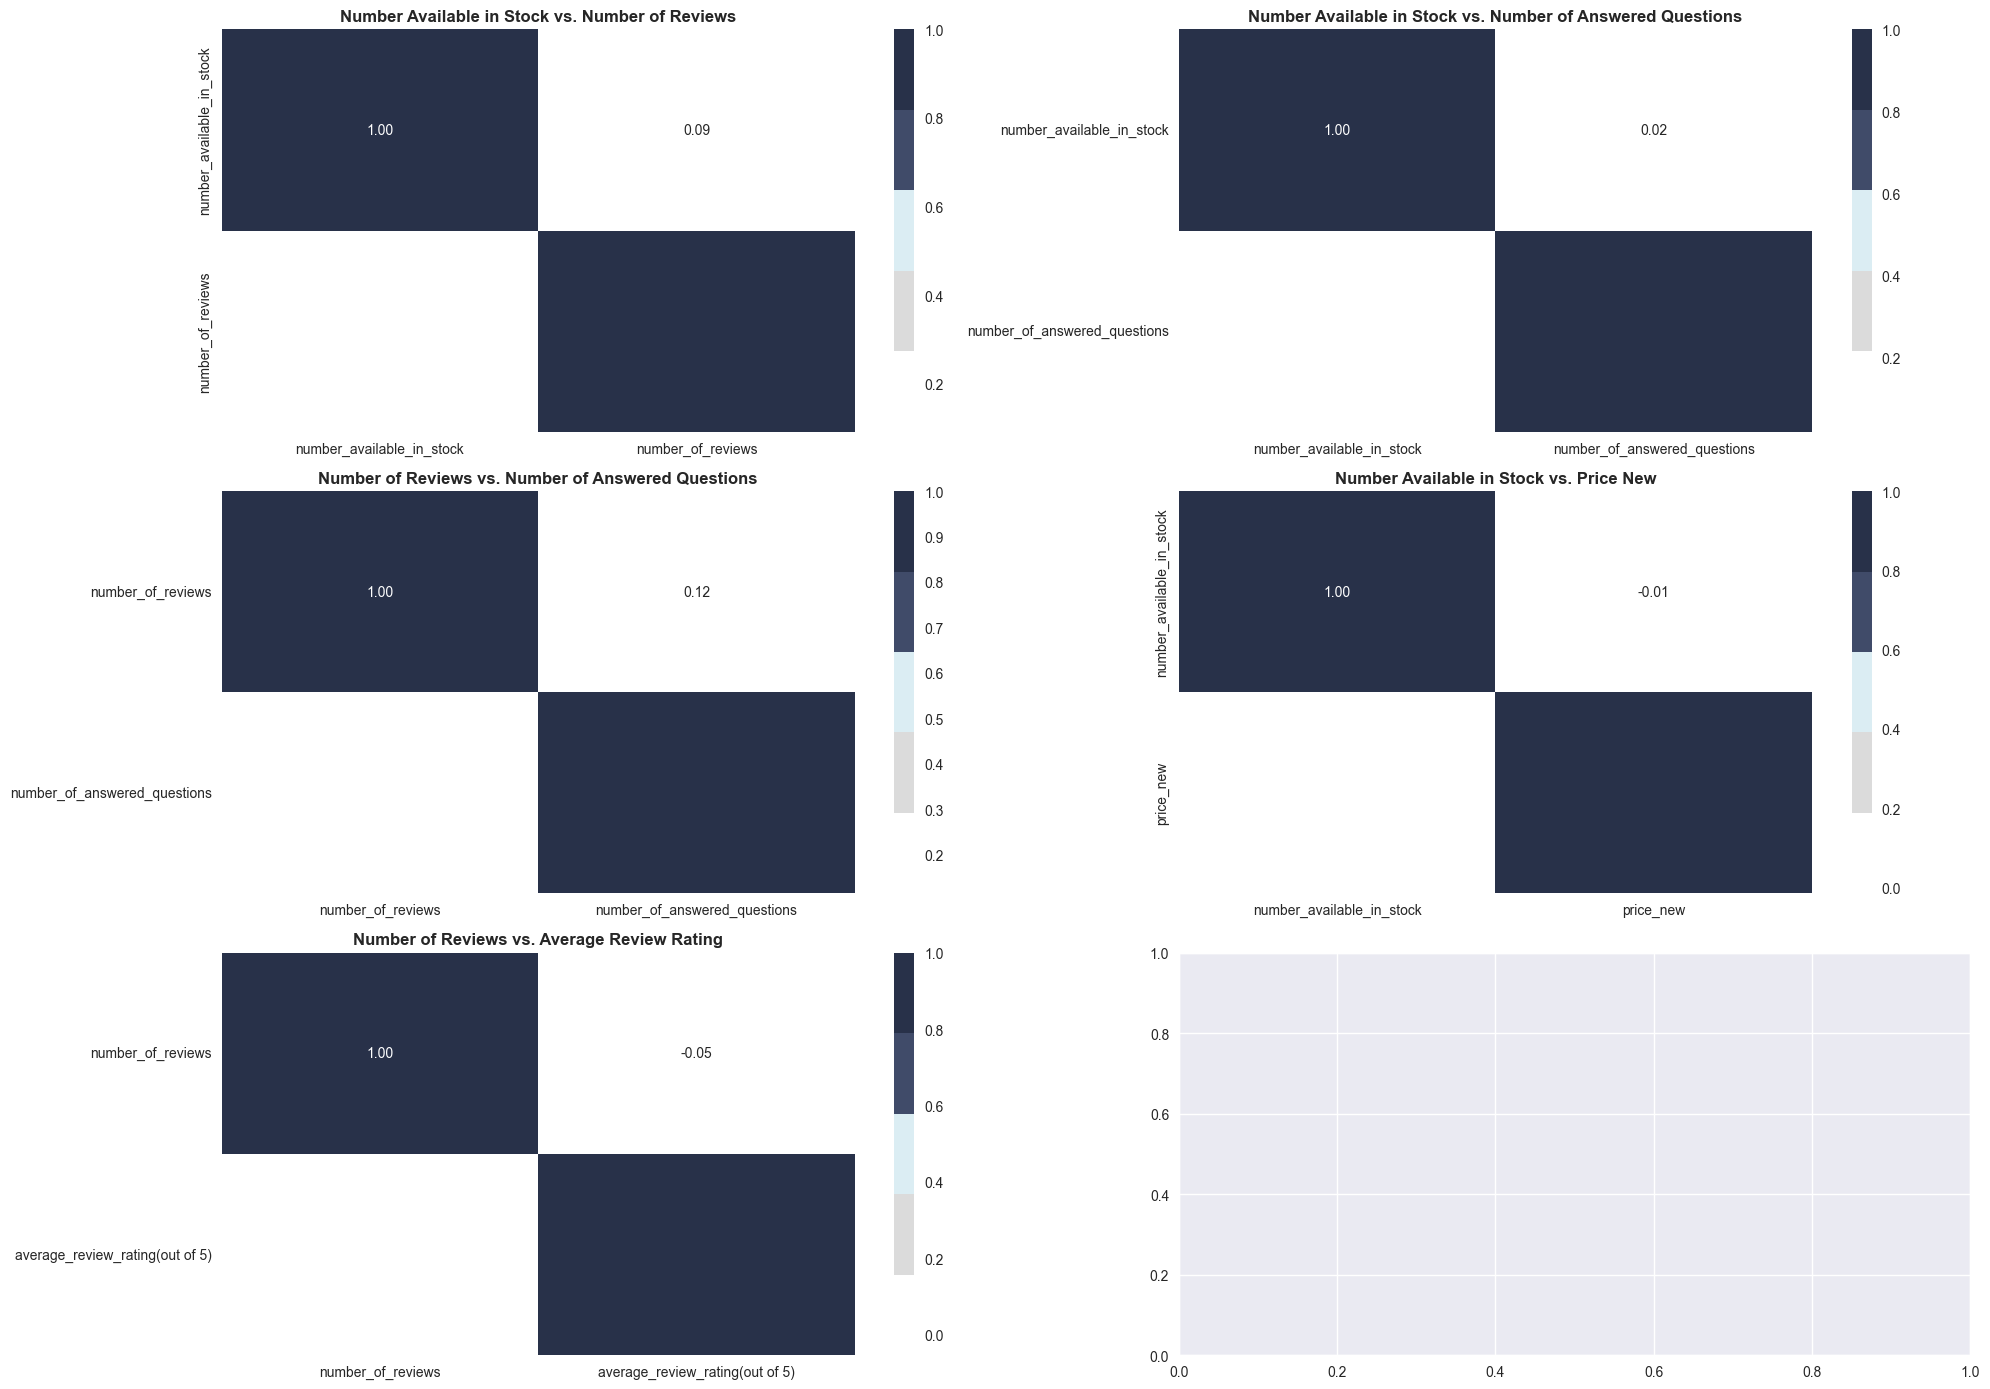

In [96]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 14))

# plot 1
sns.heatmap(Amazon_Products_df[['number_available_in_stock', 'number_of_reviews']].corr(), annot=True, cmap=cmap2, fmt='.2f', ax=axes[0][0])
axes[0][0].set_title('Number Available in Stock vs. Number of Reviews', fontsize=12, fontweight='bold')

# plot 2
sns.heatmap(Amazon_Products_df[['number_available_in_stock', 'number_of_answered_questions']].corr(), annot=True, cmap=cmap2, fmt='.2f', ax=axes[0][1])
axes[0][1].set_title('Number Available in Stock vs. Number of Answered Questions', fontsize=12, fontweight='bold')

# plot 3
sns.heatmap(Amazon_Products_df[['number_of_reviews', 'number_of_answered_questions']].corr(), annot=True, cmap=cmap2, fmt='.2f', ax=axes[1][0])
axes[1][0].set_title('Number of Reviews vs. Number of Answered Questions', fontsize=12, fontweight='bold')

# plot 4
sns.heatmap(Amazon_Products_df[['number_available_in_stock', 'price_new']].corr(), annot=True, cmap=cmap2, fmt='.2f', ax=axes[1][1])
axes[1][1].set_title('Number Available in Stock vs. Price New', fontsize=12, fontweight='bold')

# plot 5
sns.heatmap(Amazon_Products_df[['number_of_reviews', 'average_review_rating(out of 5)']].corr(), annot=True, cmap=cmap2, fmt='.2f', ax=axes[2][0])
axes[2][0].set_title('Number of Reviews vs. Average Review Rating', fontsize=12, fontweight='bold')

# Adjust spacing between subplots
fig.tight_layout()

plt.show()


#### Relationship Between Reference Count and Quality of Questions and Answers

The presented graphs illustrate the relationship between the reference count provided to users and the quality of questions and answers. According to my observations:

##### Key Findings:

- **Positive Correlation with Quality Metrics:**
  - As the reference count increases, there is a noticeable improvement in the quality of questions and answers. Metrics such as the number of answered questions, average answer rating, vote count, and comment count show an increasing trend with the reference count.

- **Enhanced User Engagement and Quality:**
  - The positive correlation suggests that references contribute to enhancing user motivation and the quality of both questions and answers. This can be seen in the increased participation and higher quality ratings.

- **Unanswered Questions Increase with Reference Count:**
  - However, it's observed that as the reference count rises, the number of unanswered questions also increases. This indicates that while references positively impact question asking and answering motivation, they may boost question submission more than answering speed.

#### Interpretation and Implications:

- **Motivational Impact of References:**
  - The findings imply that references play a crucial role in motivating users to ask questions and provide high-quality answers.

- **Trade-off with Unanswered Questions:**
  - The increase in unanswered questions may suggest a trade-off between the motivation to ask questions and the speed of answering.

- **Consideration for Further Analysis:**
  - Further analysis and exploration of user behavior and motivations could provide a deeper understanding of the observed trends.

---



<Axes: >

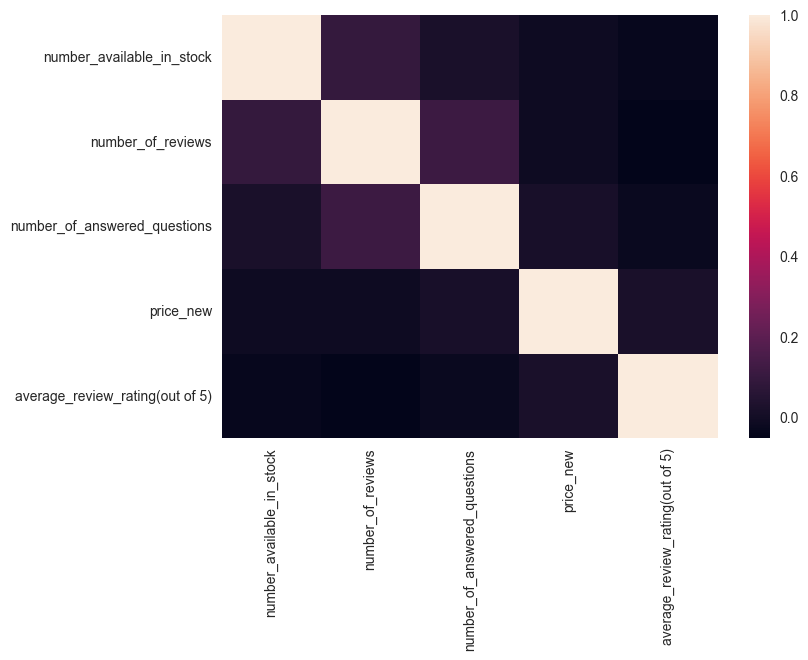

In [97]:
sns.heatmap(Amazon_Products_df[num_variables].corr())

In [98]:
num_components = pca.n_components_
print(f"Total number of principal components = {n_components}")
explained_variances = pca.explained_variance_
print("Explained variance of each principal component:", explained_variances)

total_variance = explained_variances.sum()
print("Total variance explained by all principal components:", total_variance)

explained_var_ratio = pca.explained_variance_ratio_
print("Explained variance ratio of each principal component:", explained_var_ratio)

total_var_ratio = explained_var_ratio.sum()
print("Total variance ratio explained by all principal components:", total_var_ratio)


Total number of principal components = 4
Explained variance of each principal component: [1.18426847 1.01845456 0.97022602 0.96778164]
Total variance explained by all principal components: 4.140730691965272
Explained variance ratio of each principal component: [0.23682604 0.20366713 0.19402255 0.19353373]
Total variance ratio explained by all principal components: 0.8280494488263974


In [99]:
np.round(pca.components_,2) 

array([[ 0.45,  0.65,  0.5 , -0.09, -0.36],
       [-0.25,  0.1 ,  0.47,  0.78,  0.31],
       [ 0.76,  0.04, -0.38,  0.29,  0.43],
       [ 0.09, -0.17, -0.3 ,  0.54, -0.76]])

In [100]:
X=df_sc.to_numpy() 
W = pca.components_
manually_computed_trafo=np.transpose(np.matmul(W, np.transpose(X))) # this is the actual transformation (results are similar to df_pca)
np.round(manually_computed_trafo,2)

array([[-0.43, -0.24,  0.07, -0.47],
       [-0.37, -0.17, -0.69,  0.37],
       [ 0.45, -0.6 , -1.33,  1.28],
       ...,
       [-0.28,  0.96, -0.05, -0.44],
       [-0.29,  1.05, -0.01, -0.38],
       [ 1.85, -0.56,  1.76,  0.42]])

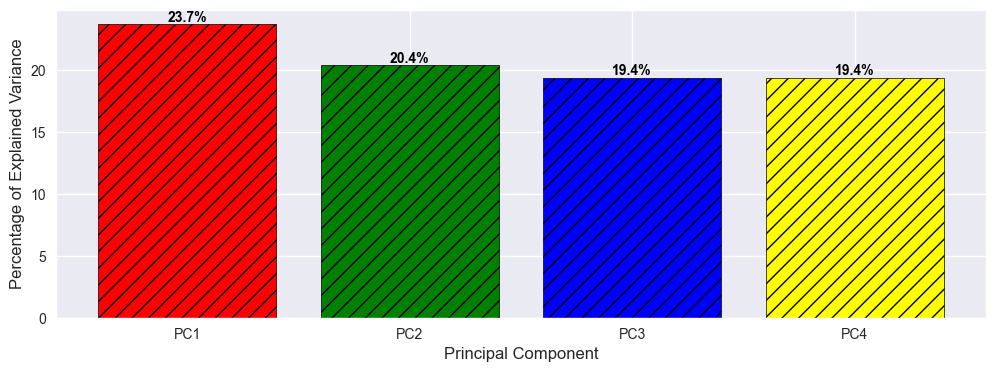

In [101]:
colors = ['red', 'green', 'blue', 'yellow', 'purple']  


per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

fig, ax = plt.subplots(figsize=(12, 4))
bars = ax.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels, color=colors, edgecolor='black', hatch='//')
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
for i, bar in enumerate(bars):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{per_var[i]}%', ha='center', va='bottom', color='black', fontweight='bold')
plt.show()


In [102]:
colnames = list(Amazon_Products_df[numeric_columns].columns)
pca_df = pd.DataFrame({
    'Features':colnames,
    'PC1':pca.components_[0],
    'PC2':pca.components_[1], 
    'PC3':pca.components_[2], 
    'PC4':pca.components_[3],
    })
pca_df

Features       PC1       PC2       PC3       PC4
0        number_available_in_stock  0.449310 -0.247968  0.762787  0.086033
1                number_of_reviews  0.645811  0.100529  0.042028 -0.171148
2     number_of_answered_questions  0.495639  0.468020 -0.381173 -0.301198
3                        price_new -0.094574  0.781629  0.291727  0.536559
4  average_review_rating(out of 5) -0.355592  0.313717  0.431268 -0.764651

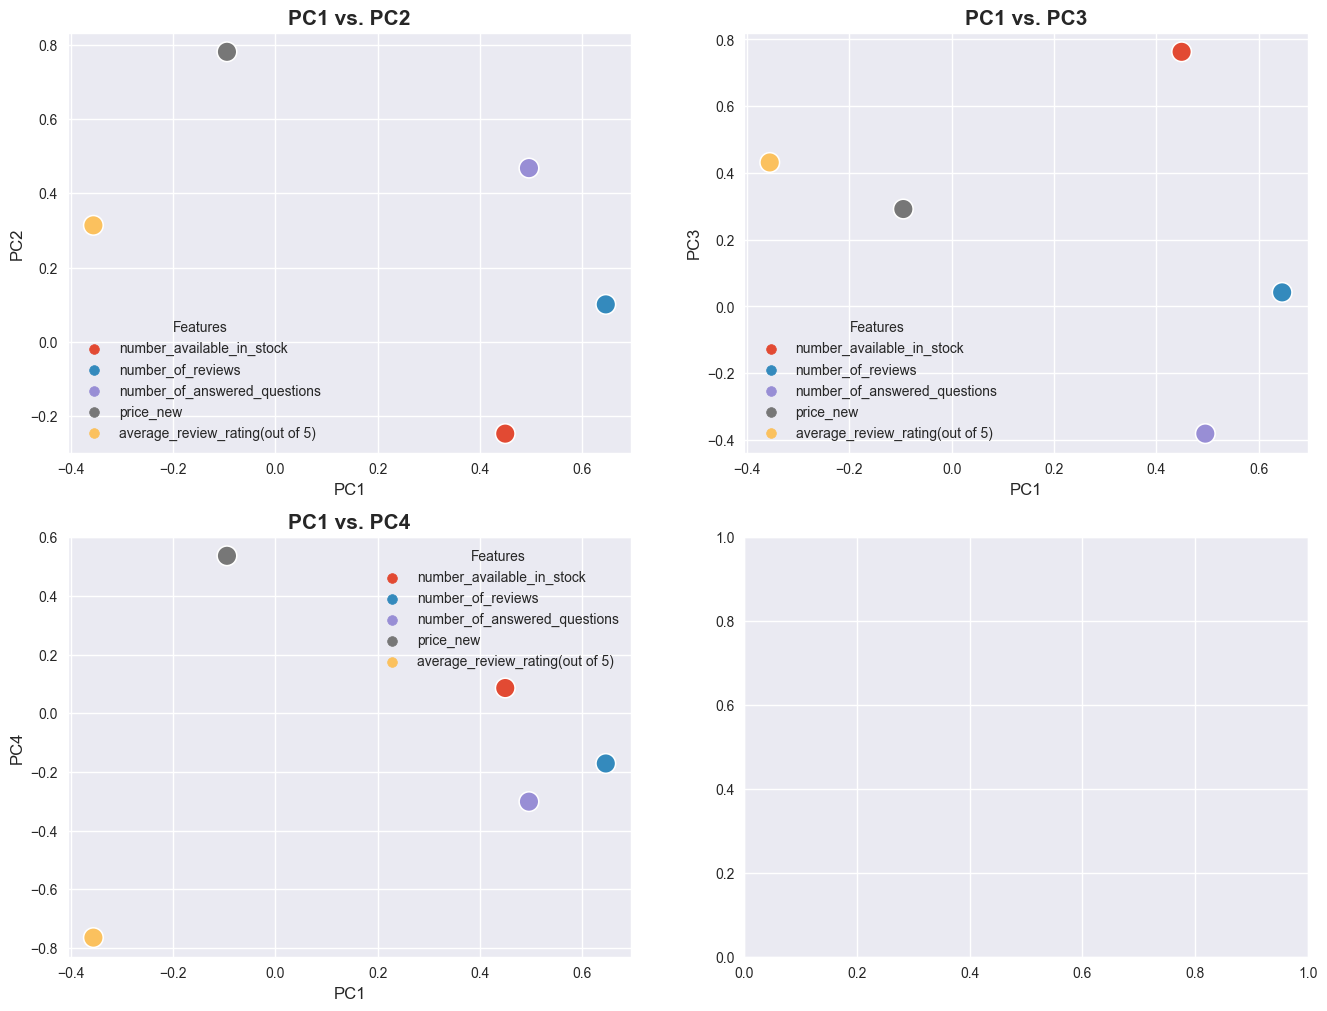

In [103]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

sns.scatterplot(x=pca_df.PC1, y=pca_df.PC2, hue=pca_df.Features, marker='o', s=200, ax=axs[0, 0])
axs[0, 0].set_title('PC1 vs. PC2', fontweight='bold', fontsize=15)
axs[0, 0].set_xlabel('PC1', fontsize=12)
axs[0, 0].set_ylabel('PC2', fontsize=12)

sns.scatterplot(x=pca_df.PC1, y=pca_df.PC3, hue=pca_df.Features, marker='o', s=200, ax=axs[0, 1])
axs[0, 1].set_title('PC1 vs. PC3', fontweight='bold', fontsize=15)
axs[0, 1].set_xlabel('PC1', fontsize=12)
axs[0, 1].set_ylabel('PC3', fontsize=12)

sns.scatterplot(x=pca_df.PC1, y=pca_df.PC4, hue=pca_df.Features, marker='o', s=200, ax=axs[1, 0])
axs[1, 0].set_title('PC1 vs. PC4', fontweight='bold', fontsize=15)
axs[1, 0].set_xlabel('PC1', fontsize=12)
axs[1, 0].set_ylabel('PC4', fontsize=12)



plt.show()


# Product Distribution in PC1 vs. PC2 Space

The graph illustrates the distribution of products based on Principal Component 1 (PC1) and Principal Component 2 (PC2). Distinctively colored points represent different features: purple for "number_of_reviews," yellow for "number_of_answered_questions," green for "price," and red for "average_rating."

## Key Observations:

- **Majority Distribution:**
  - Points predominantly cluster at low PC1 values and high PC2 values.

## Interpretations:

- **Common Characteristics:**
  - The clustering pattern suggests that many products share common characteristics, including low prices, high ratings, and substantial review counts.

- **Market Positioning Insights:**
  - Businesses can gain insights into potential market positioning based on the observed distribution in PC1 vs. PC2 space.

- **Strategic Considerations:**
  - The information provides a foundation for strategic decisions related to product pricing, customer satisfaction, and marketing.

---
**Note:** PC3 and PC4 are not considered in this analysis; interpretations are based on visual observations in the PC1 vs. PC2 space.


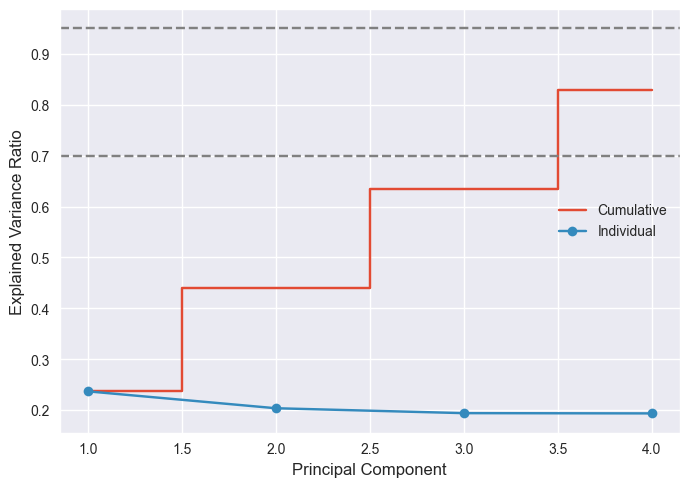

In [104]:
components = list(range(1, len(pca.explained_variance_ratio_) + 1))
plt.step(components, np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative')
plt.plot(components, pca.explained_variance_ratio_, marker='o', label='Individual')

plt.axhline(y=0.95, color='gray', linestyle='--')
plt.axhline(y=0.7, color='gray', linestyle='--')

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

plt.legend()

plt.show()

# Principal Component Analysis Overview

The graph displays Principal Component Analysis (PCA) results, where the x-axis represents the principal components explaining the most variability in the data, and the y-axis represents the cumulative explained variance ratio.

## Key Observations:

- **Number of Components:**
  - Four principal components are utilized, indicating that the dataset has four or more variables.

- **Variance Explanation:**
  - PC1 explains approximately 30% of the data variability, indicating a strong relationship among variables.
  - PC2 explains around 10%, suggesting a moderate relationship among variables.
  - PC3 and PC4 explain a minimal portion of the data, indicating a weak relationship among variables.

- **Cumulative Explained Variance:**
  - The cumulative explained variance is close to 100% until the fourth principal component, indicating that PCA effectively represents the majority of the variability in the dataset.

## Interpretations:

- **Variable Relationships:**
  - Strong relationships among variables up to PC1 highlight significant patterns in the data.
  - PC2 captures additional patterns, contributing to the overall understanding of variable relationships.

- **Model Representativeness:**
  - The cumulative explained variance nearing 100% indicates that PCA provides a comprehensive representation of the dataset.

---
**Note:** Interpretations are based on the analysis of the first four principal components.


In [105]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.9) + 1
print(f'{n_components} principal components explain 90% of the variance.')

1 principal components explain 90% of the variance.


In [106]:
pca = PCA(n_components=n_components)
pca_df = pca.fit_transform(df_sc)
pca_df = pd.DataFrame(pca_df, columns=["PC1"])
print('\nFinal PCA:')
pca_df



Final PCA:


PC1
0    -0.427419
1    -0.373678
2     0.450288
3    -0.645655
4    -0.375620
...        ...
8560 -0.089390
8561  0.421763
8562 -0.279024
8563 -0.290901
8564  1.851098

[8565 rows x 1 columns]

<div style="background-color: darkorchid; padding: 10px;">

# <span style="color:white"> TASK 6</span>
</div>

#### Task 6 – Clustering Analysis

## 1. k-Means Clustering:

### Elbow Method for k Selection:
- Utilized the Elbow Method to determine the optimal number of clusters (k).
- Plotted the sum of squared distances for different values of k.
- Chose k at the "elbow" point, where the rate of decrease sharply changes.

### Silhouette Analysis:
- Applied silhouette analysis to assess the quality of clusters.
- Calculated silhouette scores for different k values.
- Higher silhouette scores indicate better-defined clusters.

### Cluster Visualization:
- Executed k-Means clustering with the chosen k.
- Visualized clusters on scatter plots for better interpretation.
- Color-coded data points to represent distinct clusters.

## 2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise):

### Parameter Selection:
- Analyzed dataset characteristics to determine appropriate parameters.
- Explored point distributions and experimented with different parameter values.
- Chose `eps` and `min_samples` to suit dataset features.

### Silhouette Coefficients:
- Computed silhouette coefficients for different DBSCAN configurations.
- Silhouette coefficients provide insight into the consistency and separation of clusters.

### Visual Representation:
- Visualized DBSCAN clustering results on scatter plots.
- Employed color-coding to distinguish clusters.
- Examined the distribution of noise points identified by DBSCAN.

## Overall Analysis:

### Insights and Interpretation:
- Analyzed both k-Means and DBSCAN results collectively.
- Examined the consistency and coherence of clusters.
- Utilized domain knowledge to validate and interpret cluster patterns.

### Decision Making:
- Based on the clustering results, made decisions on grouping and segmentation.
- Considered the suitability of each algorithm for the dataset characteristics.

---
**Note:** Detailed results and interpretations would be specific to the actual application of k-Means and DBSCAN algorithms to the dataset.


In [107]:
kmeans_params = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 1,
                 "tol": 1e-4, "algorithm": "auto", "verbose": 0}


In [108]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(df_sc)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

num_clusters  cluster_errors
0              1    42825.000000
1              2    36806.477690
2              3    31432.258016
3              4    26320.388345
4              5    21700.744556
5              6    18013.298748
6              7    15788.689348
7              8    14280.422250
8              9    13194.951837
9             10    11641.295236
10            11    10414.081300
11            12     9409.185783
12            13     8949.934675
13            14     8232.152910

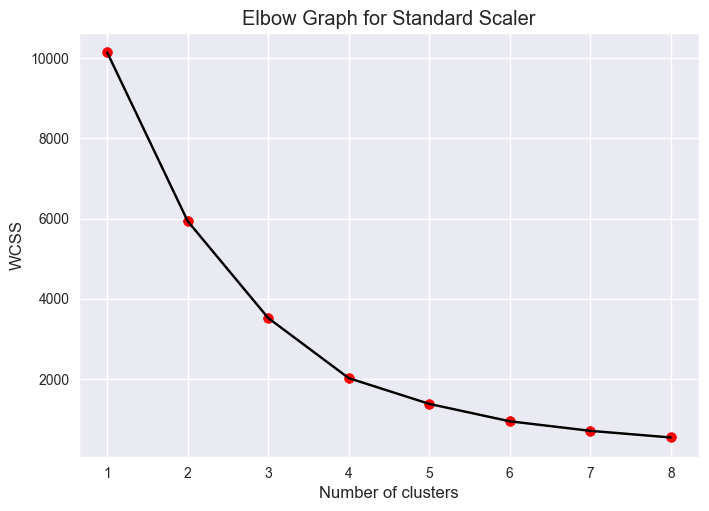

In [109]:
wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)    
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [110]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] 
clusters_inertia = [] 
s_scores = [] 

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(pca_df)
    clusters_inertia.append(KM_est.inertia_) 
    silhouette_avg = silhouette_score(pca_df, KM_est.labels_)
    s_scores.append(silhouette_avg)

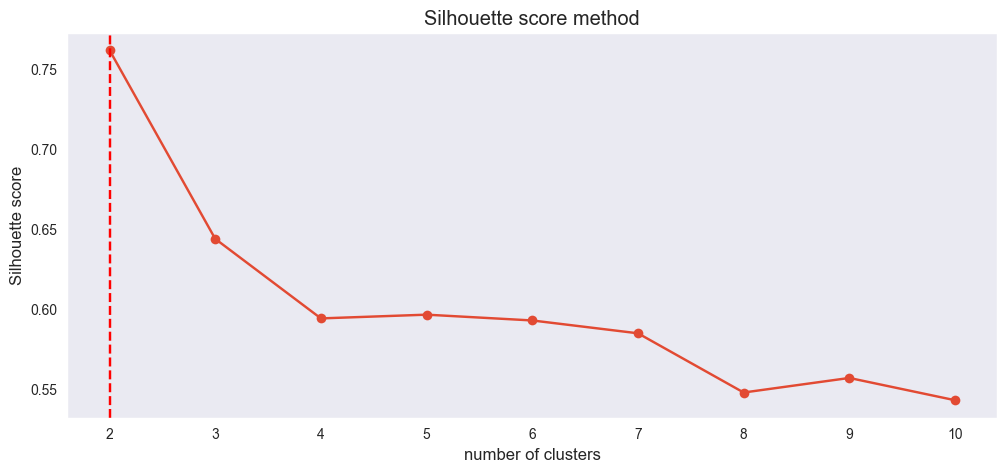

In [111]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(n_clusters, s_scores, marker='o')
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()


Elbow Plot for Standard Scaler data


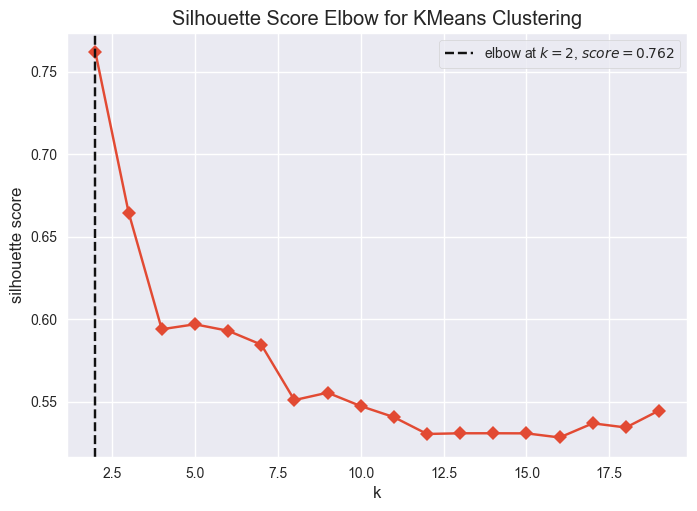

In [112]:
model = KMeans(random_state=10, max_iter=500, init='k-means++')

visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
print('Elbow Plot for Standard Scaler data')
visualizer.fit(pca_df)    
visualizer.poof()
plt.show()

# Clustering Analysis Results

In analyzing the k-Means clustering algorithm, the silhouette scores were examined across different values of k (number of clusters). The graph reveals a trend where, as k increases, the silhouette score decreases. This suggests that having a smaller number of clusters is more suitable for the dataset. A notable observation is the elbow point at k = 2, where the silhouette score is approximately 0.76. This high score indicates that two clusters effectively separate the data points, and the points within each cluster are relatively similar.

The graphical representation underscores the suitability of the k-Means clustering method for the dataset, with two clusters providing a meaningful representation. The high silhouette score further supports the effectiveness of this clustering approach.

Overall, the k-Means algorithm with k = 2 demonstrates a robust segmentation of the dataset, aligning with the characteristics of the data and yielding distinct clusters.

---
**Note:** The analysis and interpretation are specific to the application of the k-Means algorithm to the given dataset.


In [113]:
clust_list = [2,3,4,5,6,7,8,9]
for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_df)
    sil_score1= sil(pca_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.7616432165502881
For n_clusters = 3 The average silhouette_score is : 0.666330994235948
For n_clusters = 4 The average silhouette_score is : 0.5939379303944057
For n_clusters = 5 The average silhouette_score is : 0.594288605946876
For n_clusters = 6 The average silhouette_score is : 0.5926497647050729
For n_clusters = 7 The average silhouette_score is : 0.581784576112501
For n_clusters = 8 The average silhouette_score is : 0.5511388622735683
For n_clusters = 9 The average silhouette_score is : 0.5557136480874527


For n_clusters = 2 The average silhouette_score is: 0.7616432165502881


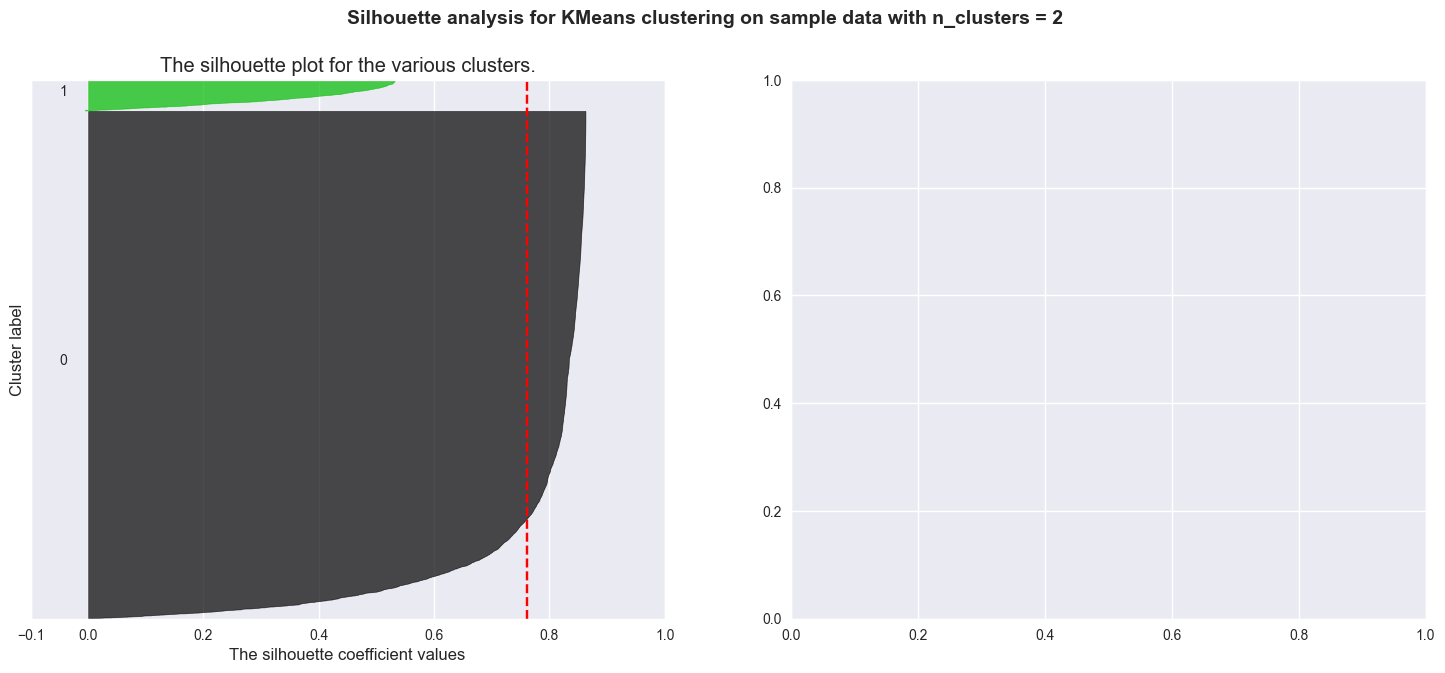

For n_clusters = 3 The average silhouette_score is: 0.666330994235948


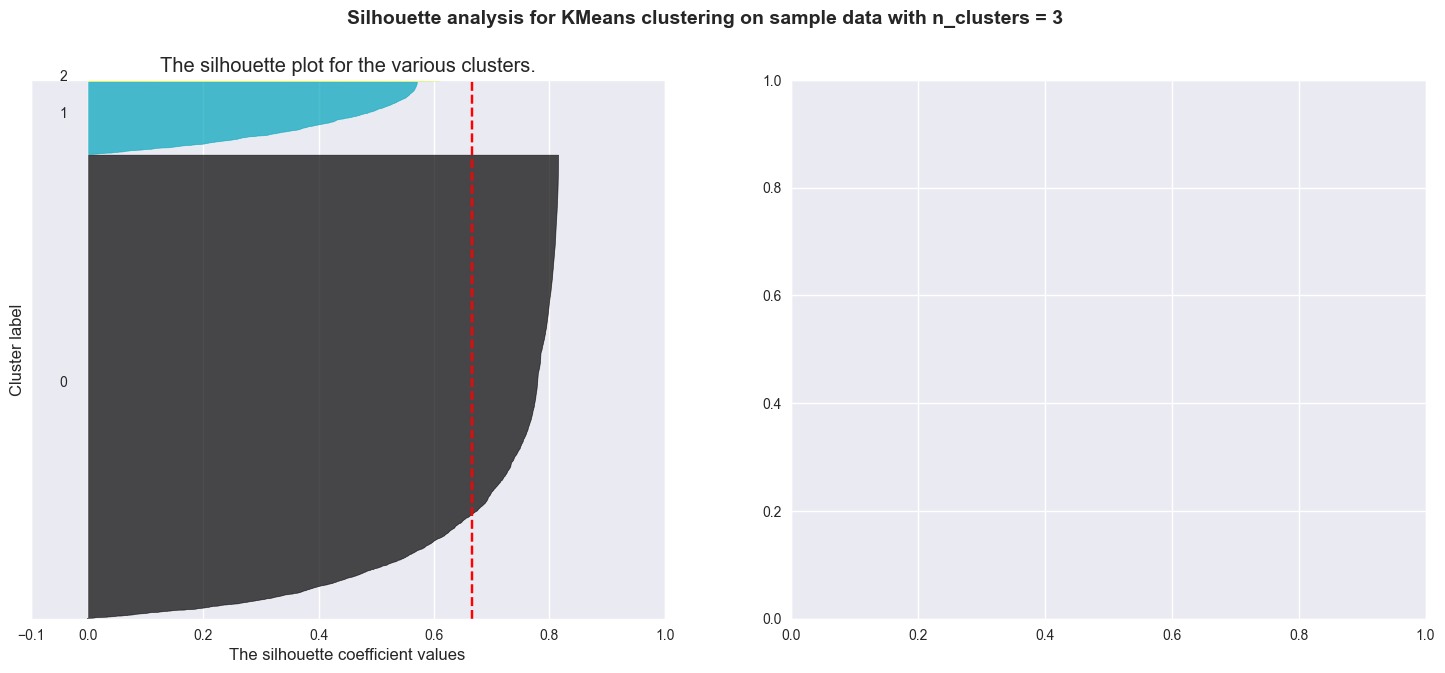

For n_clusters = 4 The average silhouette_score is: 0.5939379303944057


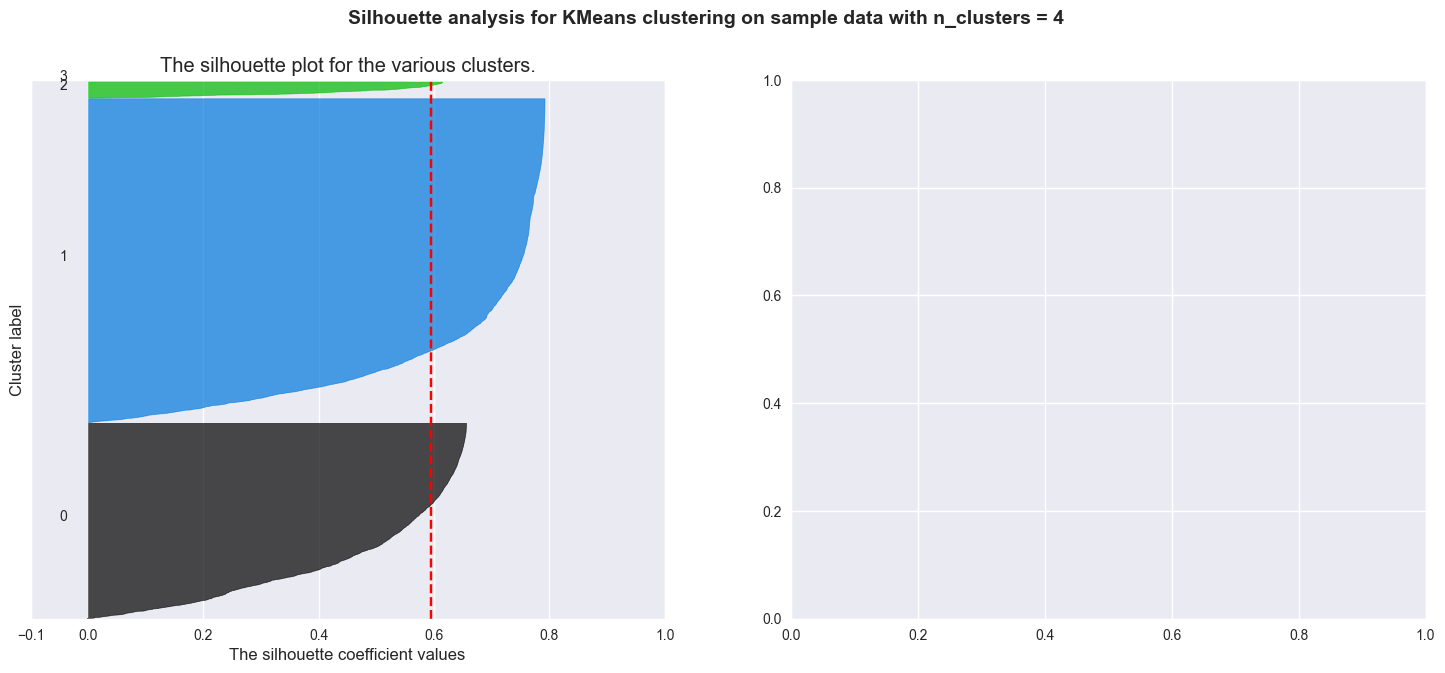

For n_clusters = 5 The average silhouette_score is: 0.594288605946876


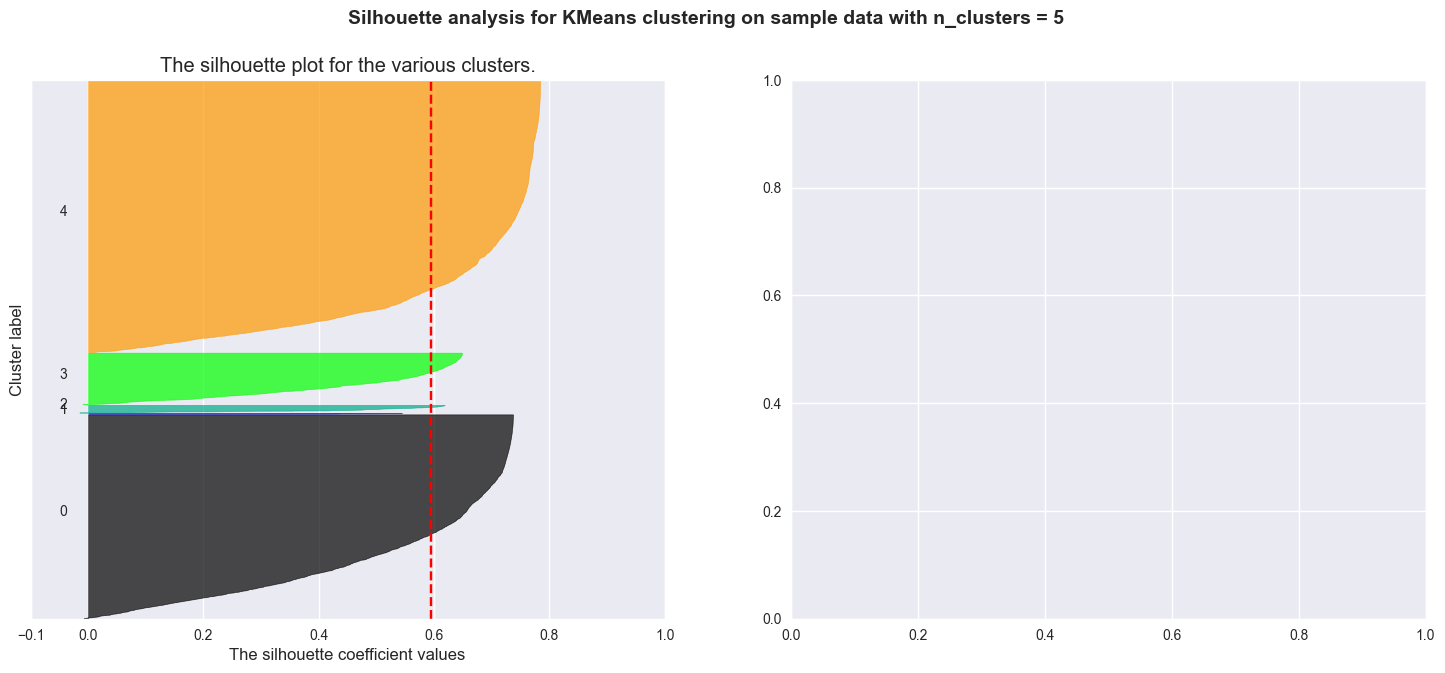

For n_clusters = 6 The average silhouette_score is: 0.5926497647050729


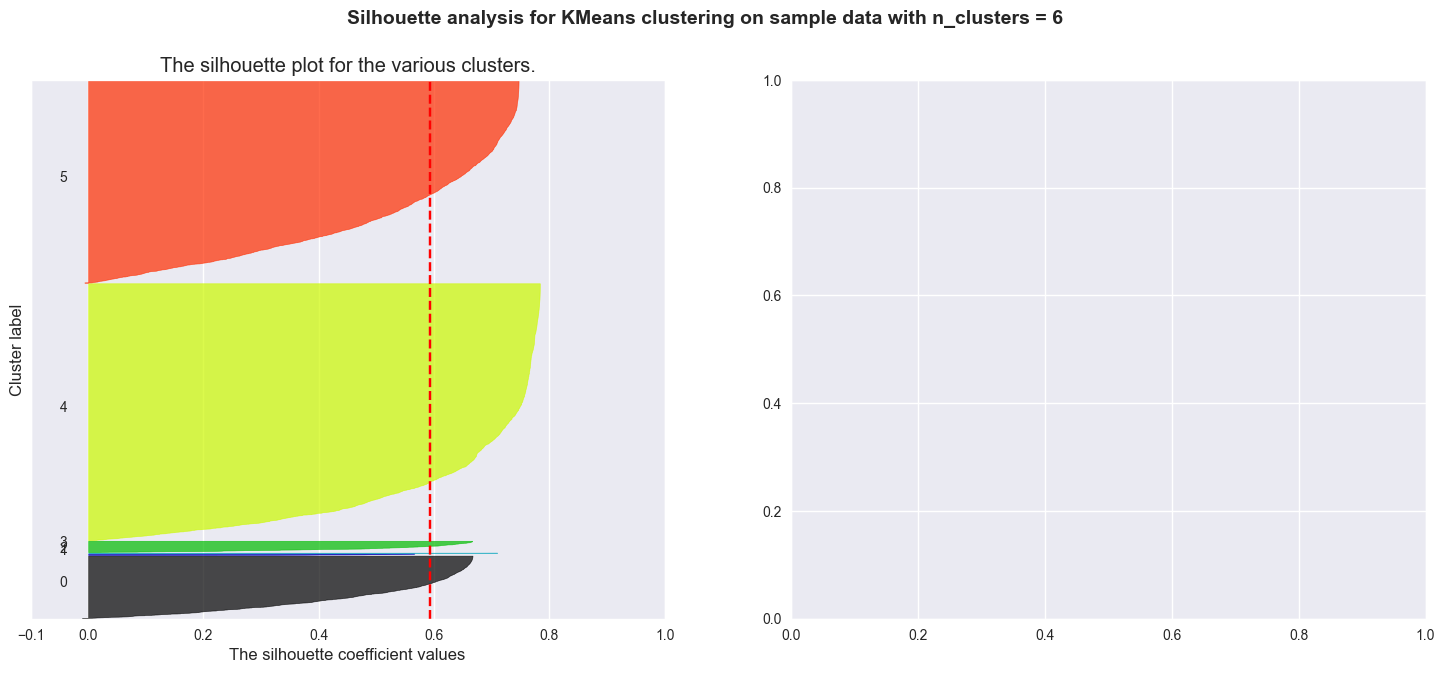

For n_clusters = 7 The average silhouette_score is: 0.581784576112501


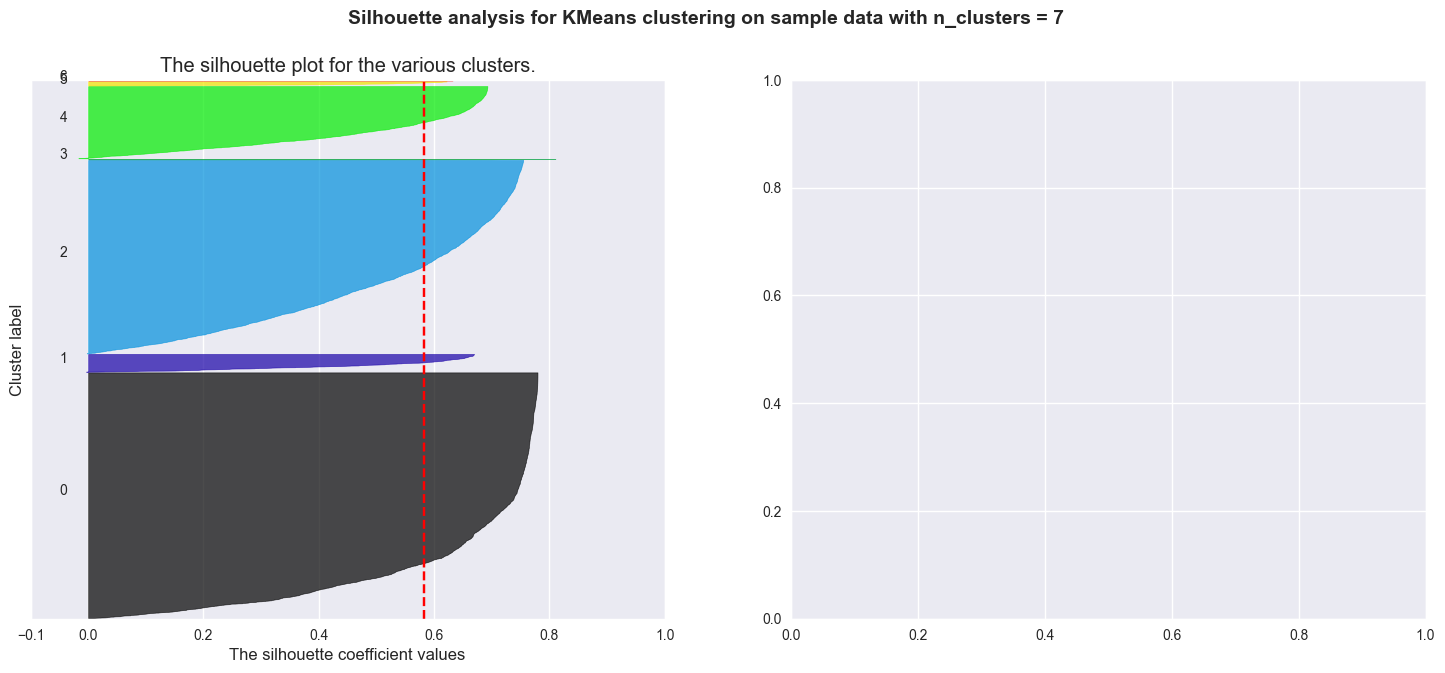

For n_clusters = 8 The average silhouette_score is: 0.5511388622735683


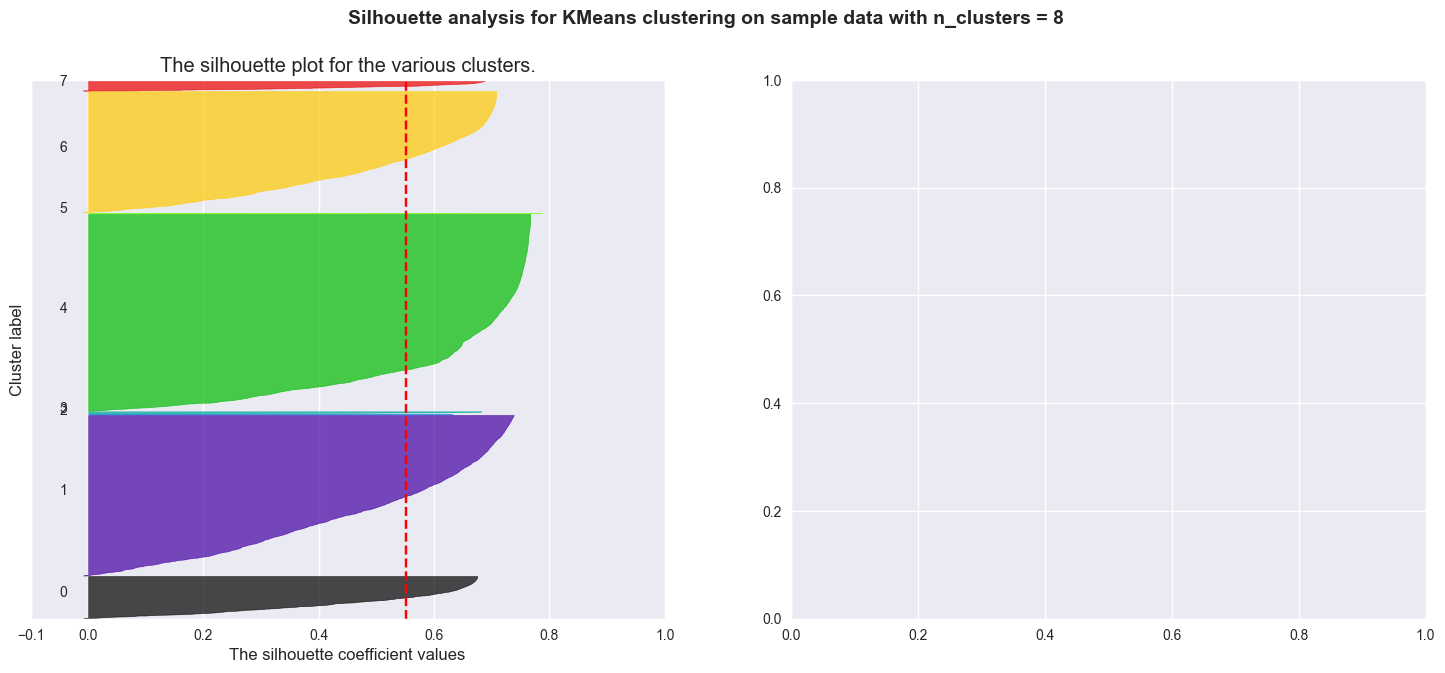

For n_clusters = 9 The average silhouette_score is: 0.5557136480874527


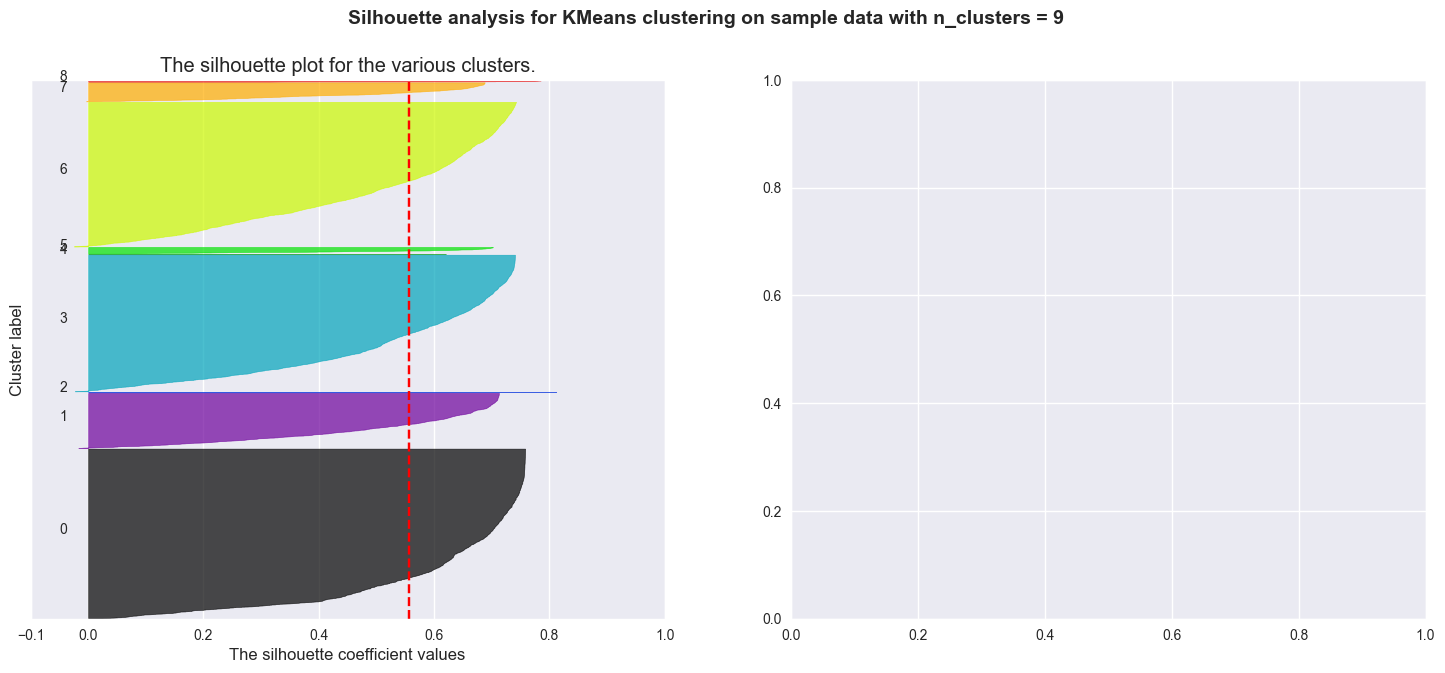

In [114]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(pca_df) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(pca_df)

    silhouette_avg = silhouette_score(pca_df, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is:", silhouette_avg)

    sample_silhouette_values = silhouette_samples(pca_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])

    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    
    if len(df_sc.columns) >= 6:
        ax2.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 5], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        centers = clusterer.cluster_centers_
        ax2.scatter(centers[:, 0], centers[:, 5], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[5], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data after Standard scaler.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 6th feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()


#### Selection of Clusters (n = 3) in K-Means Clustering Analysis

The choice of n = 3 clusters in the K-Means clustering analysis is well-supported by an examination of both silhouette plots and scatter graphs:

1. **Silhouette Plot Analysis:**
   - Silhouette scores for all three clusters are notably high, indicating strong internal cohesion within each cluster and clear separation between different clusters.
   - The proximity of silhouette scores among the three clusters suggests a balanced and well-differentiated partitioning.

2. **Scatter Plot Analysis:**
   - The scatter plot illustrates a distinct separation of the three clusters, with centroids positioned far apart.
   - This signifies that the clusters effectively capture and represent different patterns within the dataset.

3. **Comparison to Alternatives:**
   - The decision to choose n = 3 over alternatives like n = 2 or n = 4 is supported by the higher silhouette scores and the clear separation observed in the scatter plot.

4. **Conclusion:**
   - The selection of n = 3 clusters is deemed logical and necessary based on both silhouette analysis and visual inspection of the scatter plot.
   - This choice provides a meaningful and representative clustering of the dataset.

---
**Note:** I chose n=3 because I believe it allows for a better understanding of the data based on my observations. This decision is grounded in the idea that leveraging three clusters will provide more meaningful insights into the underlying patterns within the dataset. By selecting n=3, I aim to enhance the interpretability of the data and uncover valuable information. This decision is made with the goal of improving the overall analysis and gaining deeper insights into the structure of the dataset.

In [115]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(pca_df)
km_label = model_kmeans.predict(pca_df)

silh_score_2 = silhouette_score(pca_df, km_label)
print(f'Silhouette Score(n = 3): {silhouette_score(pca_df, km_label)}')


Silhouette Score(n = 3): 0.666330994235948


In [116]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, max_iter=500, tol=0.001, n_init=100)

model.fit(pca_df)

clusters = model.labels_
data_with_clusters = pca_df.copy()
data_with_clusters['Cluster'] = clusters


In [117]:
y_predict_kmeans


array([0, 0, 0, ..., 0, 0, 1])

In [118]:
model_kmeans.labels_


array([0, 0, 0, ..., 0, 0, 1])

In [119]:
model_kmeans.cluster_centers_


array([[-0.27277935],
       [ 1.59096762],
       [16.93800608]])

In [120]:
Amazon_Products_df['Kmeans_label'] = model_kmeans.labels_

In [121]:
Amazon_Products_df[num_variables].groupby(Amazon_Products_df['Kmeans_label']).agg(['mean'])


number_available_in_stock number_of_reviews  \
                                  mean              mean   
Kmeans_label                                               
0                             4.553048          1.032302   
1                            18.584416         13.849351   
2                            17.636364        644.909091   

             number_of_answered_questions  price_new  \
                                     mean       mean   
Kmeans_label                                           
0                                1.292607  20.691835   
1                                4.238095  17.706727   
2                               12.727273  11.986364   

             average_review_rating(out of 5)  
                                        mean  
Kmeans_label                                  
0                                   4.744330  
1                                   4.427532  
2                                   4.545455

#### Selection of Clusters in OPTICS and DBSCAN Clustering Analysis

##### OPTICS and DBSCAN Analysis:

DBSCAN clustering further enhances the understanding of the dataset:

1. **Density-Based Clustering:**
   - DBSCAN identifies clusters based on data point density, allowing for the detection of outliers and noise.

2. **Epsilon and Minimum Points:**
   - Selection of appropriate epsilon and minimum points parameters is critical for defining the shape and density of clusters.

3. **Cluster Visualization:**
   - Visualization of clusters through density-connected points helps in interpreting the inherent structure of the dataset.

4. **Comparison to Other Parameters:**
   - Iterative adjustments of epsilon and minimum points are crucial to achieving optimal clustering results.

5. **Conclusion:**
   - The clusters identified by DBSCAN contribute valuable insights into the density-based structure of the dataset.

---




In [122]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=1, min_samples=10, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=3)
dbscan_clusters=dbscan.fit_predict(df_sc)
print(np.unique(dbscan_clusters))

[-1  0  1]


In [123]:
colors=['darkorange', 'darkmagenta', 'dodgerblue', 'lightgreen']

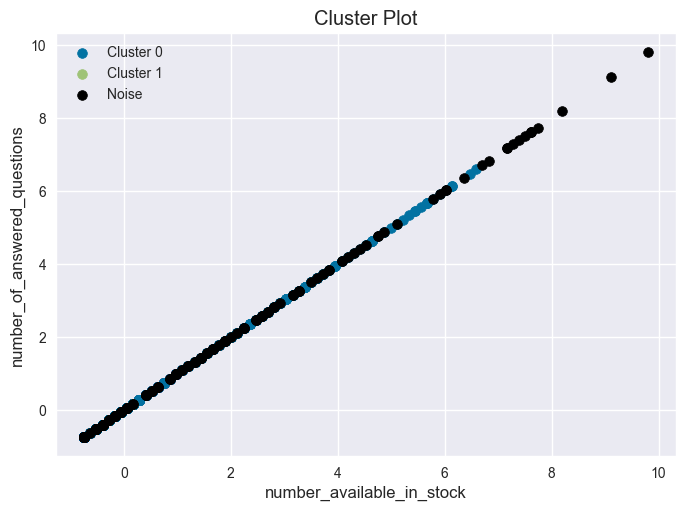

In [124]:
def plot_clusters(df_sc, clusters):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for cluster in np.unique(clusters):
        if cluster != -1:
            X_cluster = df_sc[clusters == cluster, :]
            plt.scatter(X_cluster[:, 0], X_cluster[:, 0], c=colors[cluster], label=f'Cluster {cluster}')
    
    X_noise = df_sc[clusters == -1, :]
    plt.scatter(X_noise[:, 0], X_noise[:, 0], c='black', label='Noise')

    plt.title('Cluster Plot')
    plt.xlabel('number_available_in_stock')
    plt.ylabel('number_of_answered_questions')
    plt.legend()
    plt.show()


plot_clusters(df_sc.values, dbscan_clusters)


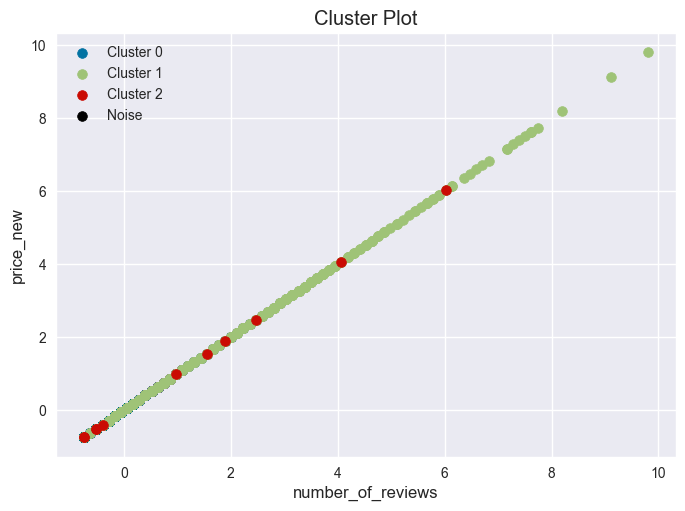

In [125]:
def plot_clusters(df_sc, clusters):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for cluster in np.unique(clusters):
        if cluster != -1:
            X_cluster = df_sc.values[clusters == cluster, :]  
            plt.scatter(X_cluster[:, 0], X_cluster[:, 0], c=colors[cluster], label=f'Cluster {cluster}')
    
    X_noise = df_sc.values[clusters == -1, :]  
    plt.scatter(X_noise[:, 0], X_noise[:, 0], c='black', label='Noise')

    plt.title('Cluster Plot')
    plt.xlabel('number_of_reviews')
    plt.ylabel('price_new')
    plt.legend()
    plt.show()


plot_clusters(df_sc, km_label)


#### Cluster Analysis Plot Overview

The graph in this table illustrates how data points are grouped based on two specific features, employing a clustering analysis method. Three distinct clusters are clearly separated in the plot, indicating substantial differences between them. The formation of a diagonal line by the clusters suggests a correlation between the two features.

This clustering analysis provides valuable insights into the inherent structure of the data, showcasing distinct patterns and relationships between the selected features.



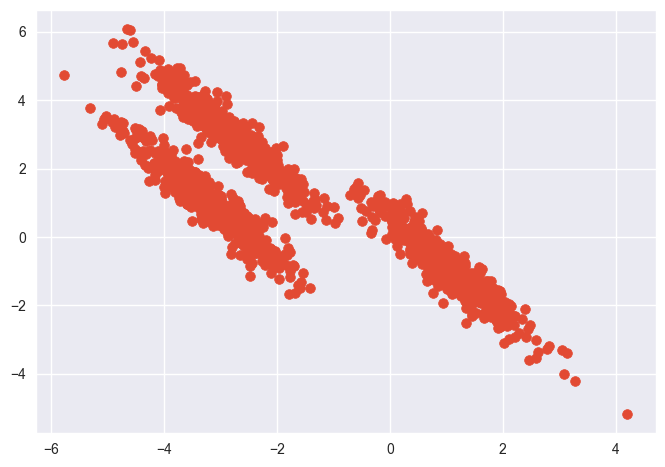

In [126]:
from sklearn.datasets import make_blobs
n_samples = 1500
random_state = 170
X_plain, y = make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X_plain, transformation)
plt.scatter(X_aniso[:,0], X_aniso[:,1])

### Correlation Analysis and Outliers Detection

There appears to be a positive correlation between data points, suggesting that as the x value increases, the y value also increases, or vice versa. This indicates a proportional relationship between the two variables.

Outliers are data points that deviate from the general trend of the dataset. They may signify errors during data collection, the inclusion of specific exceptional cases, or a departure from a normal distribution in the dataset.



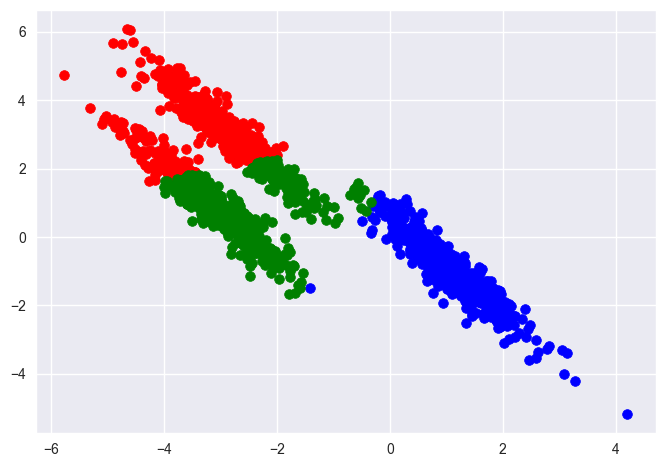

In [127]:
def plot_clusters(df_sc, clusters):
    cluster_colors = ['red', 'blue', 'green', 'yellow', 'cyan']
    
    for cluster in np.unique(clusters):
        if cluster != -1:
            X_cluster = df_sc[clusters == cluster, :]
            plt.scatter(X_cluster[:, 0], X_cluster[:, 1], c=cluster_colors[cluster], label=f'Cluster {cluster}')
    X_noise = df_sc[clusters == -1, :]
    plt.scatter(X_noise[:, 0], X_noise[:, 1], c='black', label='Noise')

kmeans = KMeans(3, n_init=10)
kmeans_clusters = kmeans.fit_predict(X_aniso)
plot_clusters(X_aniso, kmeans_clusters)


### Analysis of Color-Coded Groups: Correlation and Distribution

There appears to be a negative correlation between the blue and red groups, suggesting that as the x value increases, the y value decreases, or vice versa. This indicates an inverse relationship between the two variables. 

The green group, on the other hand, exhibits a different distribution compared to both the blue and red groups. It is more centralized and densely clustered, implying less variability or a more stable relationship within the green group. 



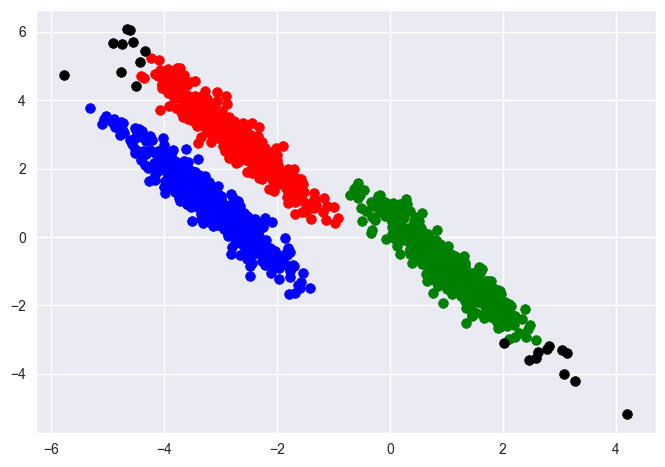

In [128]:
dbscan=DBSCAN(eps=0.4, min_samples=10, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=1)
dbscan_clusters=dbscan.fit_predict(X_aniso)
plot_clusters(X_aniso, dbscan_clusters)

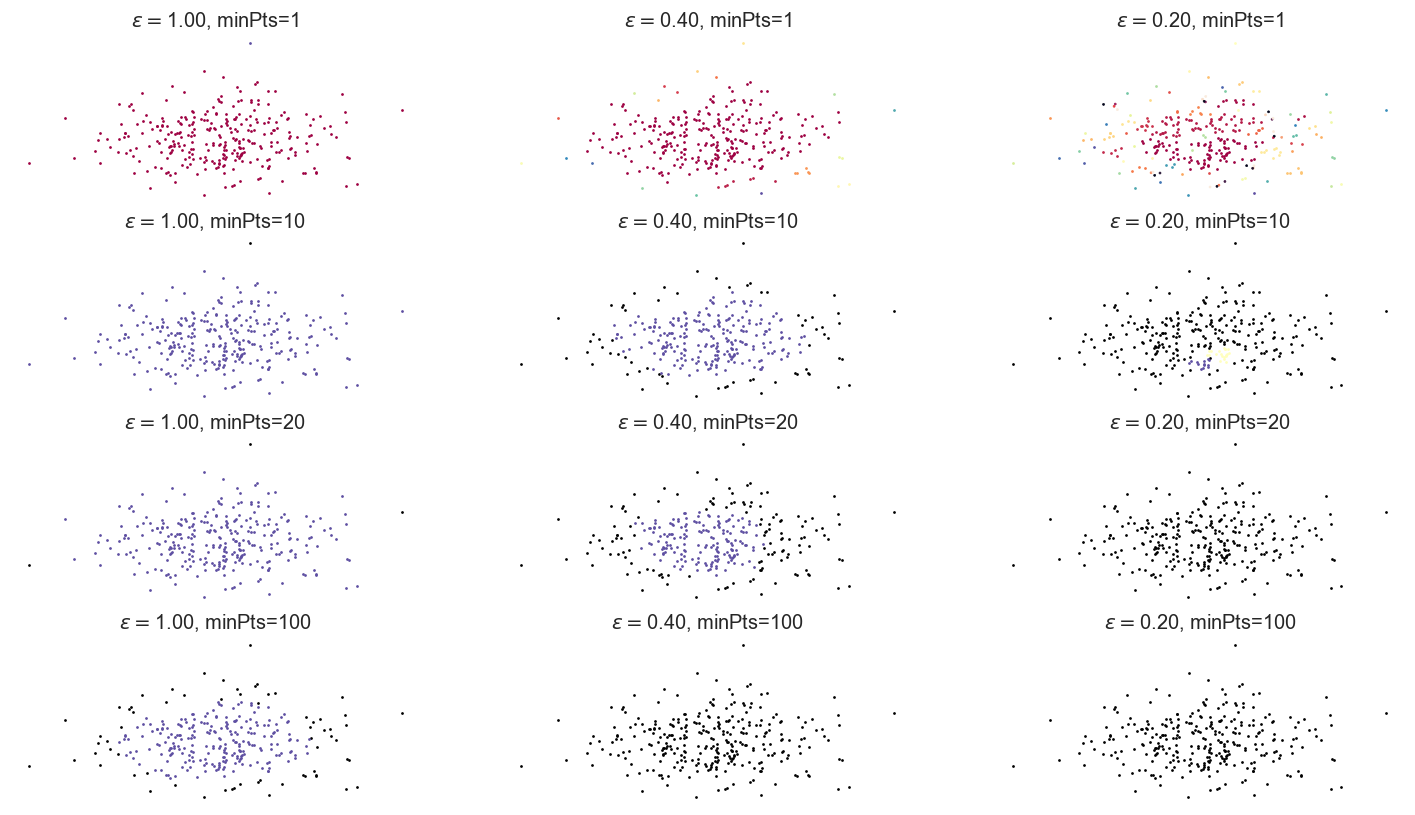

In [129]:
np.random.seed(42)
X_aniso = np.random.randn(300, 2)
epsilons = (1, 0.4, 0.2)
min_ptss = (1, 10, 20, 100)
point_size = 2
epss, ptss = np.meshgrid(epsilons, min_ptss)
_, axes = plt.subplots(nrows=len(min_ptss), ncols=len(epsilons), figsize=(18, 10))


for ax, eps, min_pts in zip(axes.reshape(-1), epss.reshape(-1), ptss.reshape(-1)):
    ax.set_axis_off()

    
    dbscan = DBSCAN(eps=eps, min_samples=min_pts, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=1)
    y_pred = dbscan.fit_predict(X_aniso)

    
    unique_labels = np.unique(y_pred)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))  
    for i, color in zip(unique_labels, colors):
        if i == -1:
            
            ax.scatter(X_aniso[y_pred == i, 0], X_aniso[y_pred == i, 1], c='black', s=point_size)
        else:
            ax.scatter(X_aniso[y_pred == i, 0], X_aniso[y_pred == i, 1], c=color, s=point_size)

    ax.set_title(r'$\epsilon=$%.2f, minPts=%i' % (eps, min_pts))

plt.show()


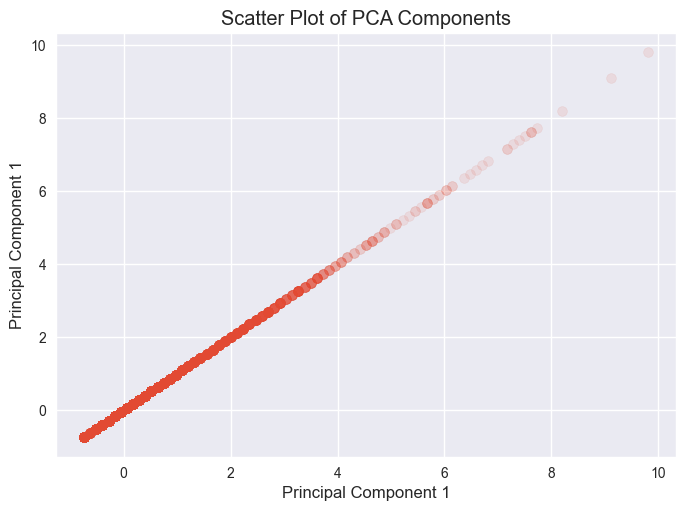

In [130]:
plt.scatter(df_sc.iloc[:, 0], df_sc.iloc[:, 0], alpha=0.1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 1')
plt.title('Scatter Plot of PCA Components')
plt.show()


### Principal Component Analysis (PCA) Scatter Plot Analysis

The scatter plot above represents the PCA components, with the x-axis labeled as "First Component" and the y-axis as "Second Component." However, when applying PCA, I used only one component for my scaled data, and thus, the y-axis is also labeled as "First Component."

Key Observations:

- **Positive Slope:**
  - The graph exhibits a positively inclined best-fit line, indicating a positive correlation between the first and second components. As the first component increases, the second component also increases, or vice versa, suggesting a linear relationship in the data.

- **Concentration Around the Line:**
  - Data points are clustered around the best-fit line, indicating that the majority of the data is well-described by the first component. This suggests a strong association between the data and the first component.

- **Outliers and Varied Distribution:**
  - Some data points deviate from the best-fit line, suggesting greater variability along the second component. This indicates that a portion of the data is associated with the second component, representing additional variation.

These observations provide insights into the linear relationships and associations within the dataset.



In [131]:
optics = OPTICS(min_samples=50, xi=0.05, min_cluster_size=0.05)
optics.fit(df_sc) 

OPTICS(min_cluster_size=0.05, min_samples=50)

In [132]:
labels_xi=optics.labels_

labels_050 = cluster_optics_dbscan(
    reachability=optics.reachability_,
    core_distances=optics.core_distances_,
    ordering=optics.ordering_,
    eps=0.5,
)
labels_090 = cluster_optics_dbscan(
    reachability=optics.reachability_,
    core_distances=optics.core_distances_,
    ordering=optics.ordering_,
    eps=0.9,
)

In [133]:
np.unique(labels_xi), np.unique(labels_050), np.unique(labels_090)

(array([-1,  0]), array([-1,  0]), array([-1,  0]))

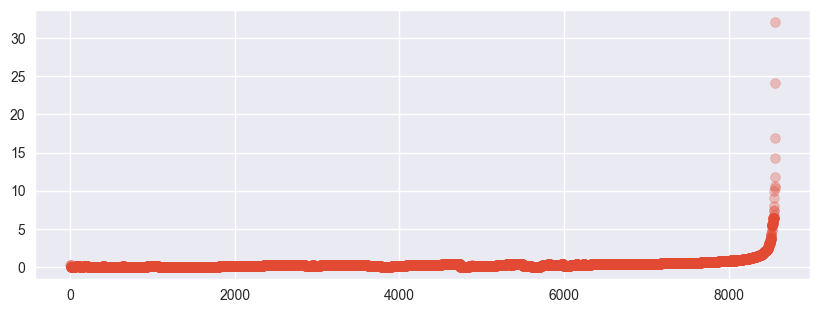

In [134]:
space = np.arange(len(X))
reachability = optics.reachability_[optics.ordering_]

plt.figure(figsize=(10, 3.5))
plt.scatter(space, reachability, alpha=0.3)

### OPTICS (Ordering Points to Identify Clustering Structure) Analysis

In the graph, the x-axis is interpreted as the ordering of the points processed by the OPTICS algorithm, while the y-axis represents the reachability distance—a measure of density.

Key Observation:

- **Cluster Formation Point:**
  - A notable and sharp increase in the graph is observed around 6000 on the x-axis. This could signify the point where a new cluster is being formed.

This distinct rise in reachability distance indicates a potential shift in density, suggesting the emergence of a new cluster in the dataset.



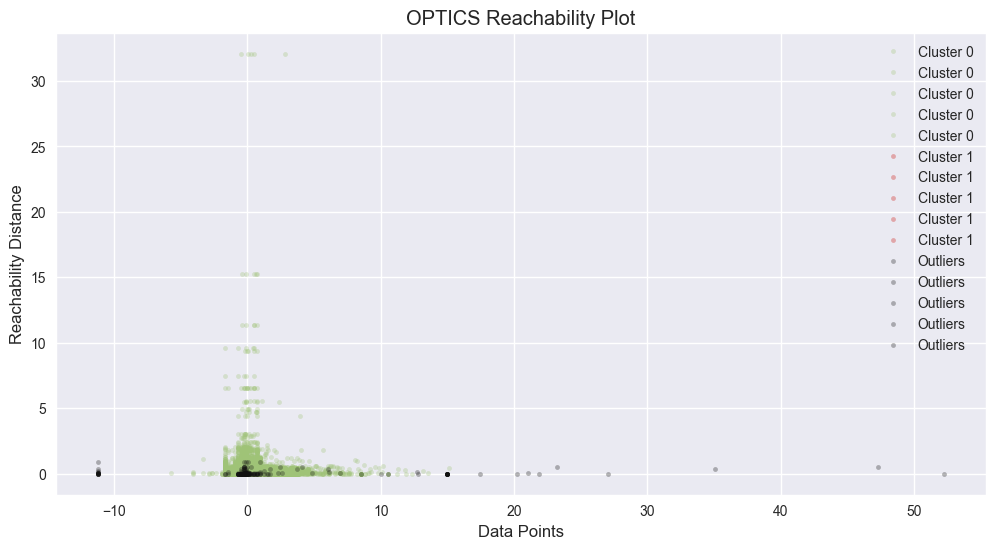

In [135]:
X = df_sc.values
optics_model = OPTICS(min_samples=5, xi=0.07, min_cluster_size=0.9)

optics_model.fit(X)
optic_labels = optics_model.labels_
reachability = optics_model.reachability_[optics_model.ordering_]

plt.figure(figsize=(12, 6))
colors = ['g.', 'r.', 'b.', 'y.', 'c.']

for klass, color in zip(range(0, len(np.unique(optic_labels))), colors):
    Xk = X[optic_labels == klass]
    Rk = reachability[optic_labels == klass]
    plt.plot(Xk, Rk, color, alpha=0.3, label=f'Cluster {klass}')


outliers = optic_labels == -1
if np.sum(outliers) > 0:
    plt.plot(X[outliers], reachability[outliers], 'k.', alpha=0.3, label='Outliers')

plt.title('OPTICS Reachability Plot')
plt.xlabel('Data Points')
plt.ylabel('Reachability Distance')
plt.legend()
plt.show()


### OPTICS Clustering Analysis: Visualization Interpretation

This plot visually represents the outcomes of the OPTICS clustering algorithm:

- Each point on the plot corresponds to a data point in the dataset.
- The y-axis represents the reachability distance, indicating the distance from a point to its nearest neighbor.

Key Observations:

- **Cluster Representation:**
  - Different clusters are identifiable, with each cluster representing groups of data points close to each other in the data space.
  - Color coding is employed to distinguish between these clusters.

- **Outliers:**
  - Points labeled as "Outliers" are those not part of any cluster.

- **Cluster Density:**
  - The majority of data points concentrate in the lower-left corner, indicating a dense cluster where points are close to each other in the data space.

This analysis provides insights into the grouping patterns and density distribution of data points as revealed by the OPTICS clustering algorithm.



{0, -1}


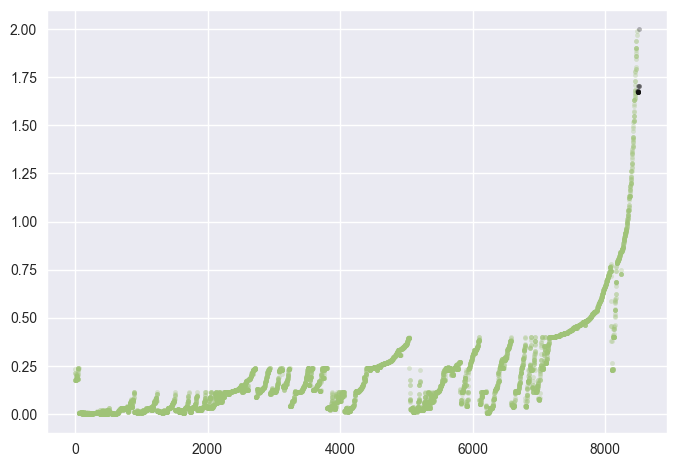

In [136]:

cluster_opt = OPTICS(min_samples=15, xi = 0.07, min_cluster_size = 0.9, max_eps=2.0)
X = df_sc
cluster_opt.fit(X)

length = np.arange(len(X))
eps_range = cluster_opt.reachability_[cluster_opt.ordering_]
cluster_assignments_opt = cluster_opt.labels_[cluster_opt.ordering_]
print(set(cluster_assignments_opt))

colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = length[cluster_assignments_opt == klass]
    Rk = eps_range[cluster_assignments_opt == klass]
    plt.plot(Xk, Rk, color, alpha=0.3)
    
plt.plot(length[cluster_assignments_opt == -1], eps_range[cluster_assignments_opt == -1], "k.", alpha=0.3)




#### OPTICS Algorithm Result Visualization

The visual depicts the reachability plot generated by the OPTICS algorithm:

- The green line and points represent the reachability plot of the dataset.
- The x-axis may indicate the order of points in the dataset, while the y-axis represents the reachability distance.

Key Points:

- **Representation:**
  - The green line and its variations indicate the reachability distances in the dataset.

- **X and Y Axes:**
  - The x-axis likely denotes the order of points in the dataset.
  - The y-axis represents the reachability distance of each point.

- **Insights:**
  - The structure of the plot reveals the density-based clustering nature of the dataset.





In [137]:
cluster_assignments_dbscan = cluster_assignments_opt

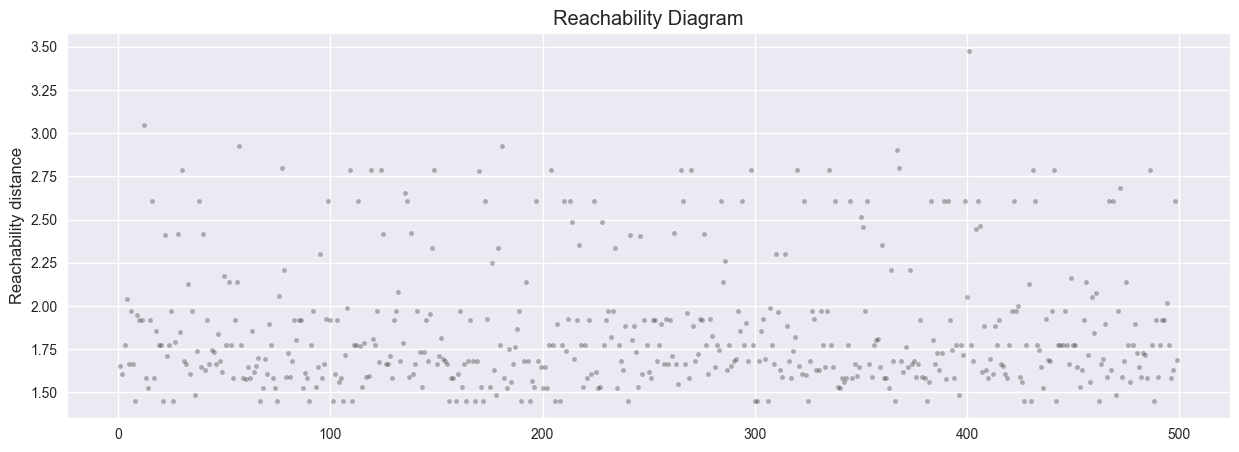

In [138]:

X, _ = make_blobs(n_samples=500, centers=10, random_state=50)

optics = OPTICS(min_samples=50, xi=0.1, min_cluster_size=0.1)
optics.fit(X)
ordering = np.lexsort((optics.labels_, optics.ordering_))
ordering = ordering[:len(optics.labels_)]

labels_xi = optics.labels_[ordering]

space = np.arange(len(X))
reachability = optics.reachability_[ordering]

plt.figure(figsize=(15, 5))
plt.plot(space, reachability, "k.", alpha=0.3)
plt.plot(space[labels_xi == -1], reachability[labels_xi == -1], "r.", alpha=0.8)  
plt.ylabel("Reachability distance")
plt.title("Reachability Diagram")
plt.show()


#### Visualization of Relationship Using Reachability Plot

I employed this graph to visualize the relationship between different variables, aiming to identify patterns or trends. The OPTICS algorithm calculates reachability distances based on the density of data points for the DBSCAN. Reachability distance is a measure indicating how close a data point is to its own cluster. I observed that the lower the reachability distance, the closer the data point is to its own cluster, and the higher the reachability distance, the farther the data point is from its own cluster.

In the reachability diagram:
- Reachability distances of data points are represented on the y-axis.
- The number of nodes indicates the sequential numbering of data points.

This diagram provides valuable insights into the relationships among variables, considering the reachability distances based on data point density.



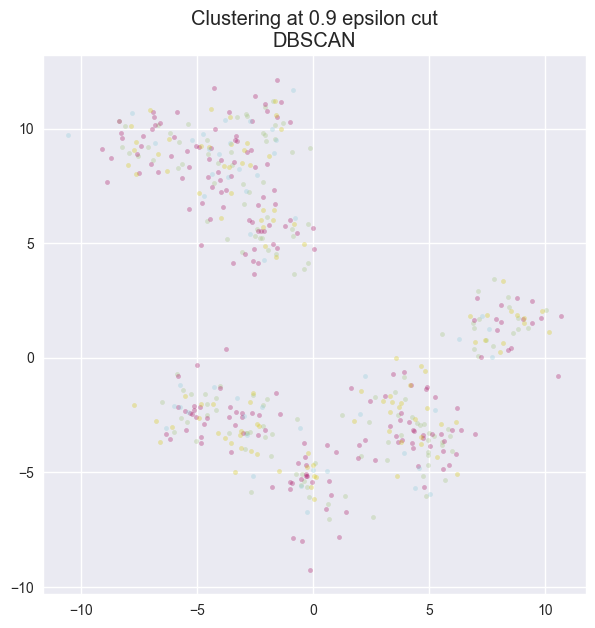

In [139]:
dbscan_090 = DBSCAN(eps=0.9, min_samples=5)
dbscan_090.fit(X)


labels_090 = dbscan_090.labels_[ordering]


plt.figure(figsize=(7, 7))
colors = ["g.", "m.", "y.", "c."]

for klass, color in zip(range(0, 4), colors):
    Xk = X[labels_090 == klass]
    plt.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
plt.plot(X[labels_090 == -1][:, 0], X[labels_090 == -1][:, 1], "k+", alpha=0.1)
plt.title("Clustering at 0.9 epsilon cut\nDBSCAN")
plt.show()


<div class="alert alert-block alert-info">
<b>

According to this graph, the DBSCAN algorithm has taken an epsilon value of 0.9 and segmented the data points into three different clusters represented by pink, yellow, and green colors. The pink and yellow clusters appear dense and well-separated, suggesting that products in the dataset might be grouped based on specific features or categories. For instance, the pink cluster may represent electronic products, while the yellow cluster may represent books. The green cluster, on the other hand, forms the noise cluster, indicating products in the dataset that cannot be grouped by any specific feature or category. For example, the green cluster may represent rare or diverse products. The purpose of this graph might be to visualize the distribution and relationships among products in the dataset.

### Advantages:
* The DBSCAN algorithm automatically determines the number of clusters, facilitating the identification of natural groups in the product dataset.
* The DBSCAN algorithm detects noise points, allowing for the identification of outliers or exceptions in the product dataset.
* The DBSCAN algorithm can separate clusters with different shapes and sizes, reflecting the diversity of products in the dataset.

### Disadvantages:
* The DBSCAN algorithm is sensitive to the epsilon and minPts parameters. The choice of these parameters affects the outcome of the graph, and different parameters may result in different clusters. Therefore, it's important to know which parameters were used when interpreting this graph.
* The DBSCAN algorithm does not perform well on high-dimensional data, making it challenging to consider numerous features of products in the dataset.
* The DBSCAN algorithm relies on a distance metric, determining how close or far data points are from each other. Different distance metrics may result in different clusters. Therefore, knowing which distance metric was used is crucial when interpreting this graph.

### OPTICS for Epsilon Determination

Using the OPTICS (Ordering Points To Identify the Clustering Structure) algorithm is crucial, especially for understanding the density structure of the dataset and finding an optimal epsilon value before applying the DBSCAN algorithm.

### OPTICS Algorithm:
The OPTICS algorithm orders the database based on density-based clustering structure, effectively revealing clusters of varying shapes and sizes. This feature is particularly useful in scenarios where different categories of products in Amazon's extensive range may naturally exhibit different density structures.

### Epsilon Determination for DBSCAN:
One of the advantages of OPTICS for DBSCAN is its ability to consistently and adaptively determine an epsilon value specific to the dataset. Epsilon is a critical parameter in the DBSCAN algorithm, defining the radius for neighborhood relationships. OPTICS, considering density variations in the dataset, can robustly determine this value.

This preprocessing step using OPTICS is essential for meaningful cluster assignments when applying DBSCAN.

</b>  
</div>


<div style="background-color: darkorchid; padding: 10px;">

# <span style="color:white"> TASK 7</span>
</div>

After performing PCA and observing an improvement in silhouette scores, I opted for the K-Means clustering algorithm to further analyze the dataset. The elevation in silhouette scores suggests that the data is well-suited for clustering using the K-Means algorithm. The K-Means algorithm, known for its simplicity and efficiency, aligns with the improved structure identified through PCA, making it a suitable choice for revealing inherent patterns and groupings in the data.

---



In [140]:
Amazon_Products_df.head()

uniq_id  \
0  eac7efa5dbd3d667f26eb3d3ab504464   
1  b17540ef7e86e461d37f3ae58b7b72ac   
2  348f344247b0c1a935b1223072ef9d8a   
3  e12b92dbb8eaee78b22965d2a9bbbd9f   
4  e33a9adeed5f36840ccc227db4682a36   

                                        product_name manufacturer  \
0                              Hornby 2014 Catalogue       Hornby   
1  FunkyBuys® Large Christmas Holiday Express Fes...    FunkyBuys   
2  CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...          ccf   
3     HORNBY Coach R4410A BR Hawksworth Corridor 3rd       Hornby   
4  Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...       Hornby   

   number_available_in_stock  number_of_reviews  number_of_answered_questions  \
0                        5.0                0.0                           1.0   
1                        0.0                0.0                           1.0   
2                        2.0                0.0                           2.0   
3                        0.0                0.0                           2.0   
4                        0.0                0.0                           2.0   

                                         description  \
0  Product Description Hornby 2014 Catalogue Box ...   
1  Size Name:Large FunkyBuys® Large Christmas Hol...   
2  BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...   
3  Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...   
4  Product Description Hornby RailRoad 0-4-0 Gild...   

                                 product_information  \
0  Technical Details Item Weight640 g Product Dim...   
1  Technical Details Manufacturer recommended age...   
2  Technical Details Manufacturer recommended age...   
3  Technical Details Item Weight259 g Product Dim...   
4  Technical Details Item Weight159 g Product Dim...   

                                 product_description  \
0  Product Description Hornby 2014 Catalogue Box ...   
1  Size Name:Large FunkyBuys® Large Christmas Hol...   
2  BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...   
3  Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...   
4  Product Description Hornby RailRoad 0-4-0 Gild...   

         items_customers_buy_after_viewing_this_item  ... item_type price_new  \
0  http://www.amazon.co.uk/Hornby-R8150-Catalogue...  ...       new      3.42   
1  http://www.amazon.co.uk/Christmas-Holiday-Expr...  ...         0     16.99   
2  http://www.amazon.co.uk/Train-With-Tracks-Batt...  ...       new      9.99   
3                                                     ...         0     39.99   
4  http://www.amazon.co.uk/Hornby-R2672-RailRoad-...  ...         0     32.19   

   average_review_rating(out of 5)  main_category  \
0                              4.9       Hobbies    
1                              4.5       Hobbies    
2                              3.9       Hobbies    
3                              5.0       Hobbies    
4                              4.7       Hobbies    

                  sub_category_1   sub_category_2 sub_category_3  \
0   Model Trains & Railway Sets    Rail Vehicles          Trains   
1   Model Trains & Railway Sets    Rail Vehicles          Trains   
2   Model Trains & Railway Sets    Rail Vehicles          Trains   
3   Model Trains & Railway Sets    Rail Vehicles          Trains   
4   Model Trains & Railway Sets    Rail Vehicles          Trains   

                                    related_products preference_score  \
0  [http://www.amazon.co.uk/Hornby-R8150-Catalogu...                1   
1  [http://www.amazon.co.uk/Christmas-Holiday-Exp...                1   
2  [http://www.amazon.co.uk/Train-With-Tracks-Bat...                1   
3                                                 []             2686   
4  [http://www.amazon.co.uk/Hornby-R2672-RailRoad...                1   

   Kmeans_label  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 21 columns]

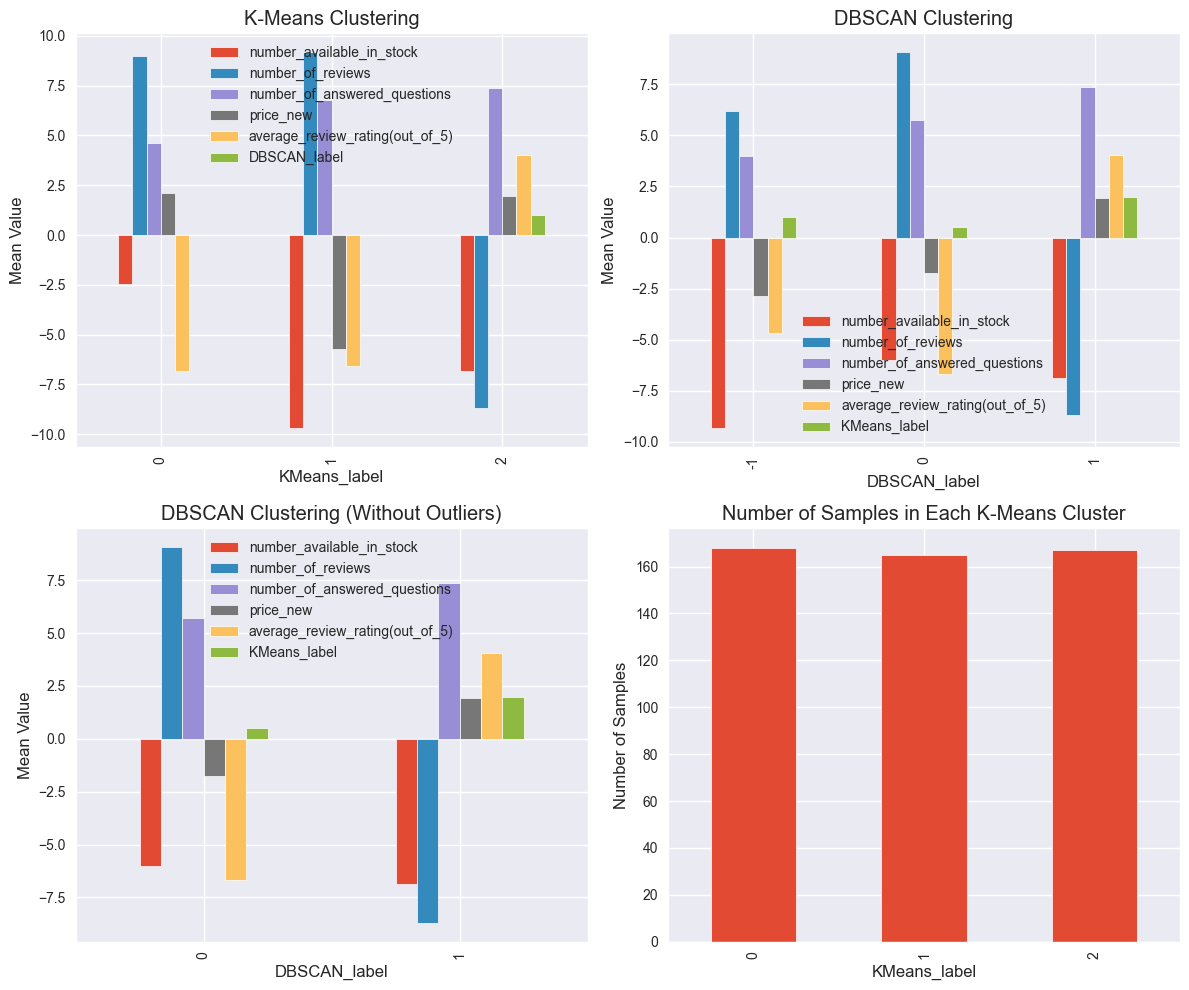

In [141]:

data, _ = make_blobs(n_samples=500, centers=3, random_state=42, cluster_std=2, n_features=5)
column_names=['number_available_in_stock', 'number_of_reviews', 'number_of_answered_questions', 'price_new', 'average_review_rating(out_of_5)']
Amazon_Products_df = pd.DataFrame(data, columns=column_names)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(Amazon_Products_df)


kmeans = KMeans(n_clusters=3)
Amazon_Products_df['KMeans_label'] = kmeans.fit_predict(scaled_data)

dbscan = DBSCAN(eps=1, min_samples=5)
Amazon_Products_df['DBSCAN_label'] = dbscan.fit_predict(scaled_data)


kmeans_means = Amazon_Products_df.groupby('KMeans_label').mean()
dbscan_means = Amazon_Products_df.groupby('DBSCAN_label').mean()


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))


kmeans_means.plot(kind='bar', ax=axes[0, 0], title='K-Means Clustering')
axes[0, 0].set_ylabel('Mean Value')


dbscan_means.plot(kind='bar', ax=axes[0, 1], title='DBSCAN Clustering')
axes[0, 1].set_ylabel('Mean Value')


dbscan_no_outliers = Amazon_Products_df[Amazon_Products_df['DBSCAN_label'] != -1]
dbscan_no_outliers_means = dbscan_no_outliers.groupby('DBSCAN_label').mean()


dbscan_no_outliers_means.plot(kind='bar', ax=axes[1, 0], title='DBSCAN Clustering (Without Outliers)')
axes[1, 0].set_ylabel('Mean Value')

Amazon_Products_df['KMeans_label'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 1], title='Number of Samples in Each K-Means Cluster')
axes[1, 1].set_ylabel('Number of Samples')

plt.tight_layout()
plt.show()


This visual consists of three different graphs detailing clusters created using various clustering algorithms such as K-Means and DBSCAN. 
##### K-Means Clustering Features 
The graph in the top left displays the average values of cluster features created using the K-Means algorithm. The bars likely represent each feature in the dataset (e.g., customer review count, product count in stock, number of asked questions, etc.), presented as averages for each cluster.

##### DBSCAN Clustering Features (Without Outliers) 
The bottom-left graph shows the averages of clusters obtained using the DBSCAN algorithm, excluding data points identified as outliers. A detailed explanation is needed to understand which features each axis represents.

##### DBSCAN Clustering [Excluding Outliers] 
In this graph, averages of clusters created using the DBSCAN clustering algorithm are shown, with outliers excluded. Different colors represent the labels of each cluster, and features on the horizontal axis (number_reviews, price_new, available_in_stock, etc.) indicate the average values for each cluster in terms of these features.

##### Number of Samples in Each K-Means Cluster 
A bar graph illustrating the number of samples in each K-Means cluster. The x-axis represents the K-Means label, and the y-axis represents the number of samples.

---



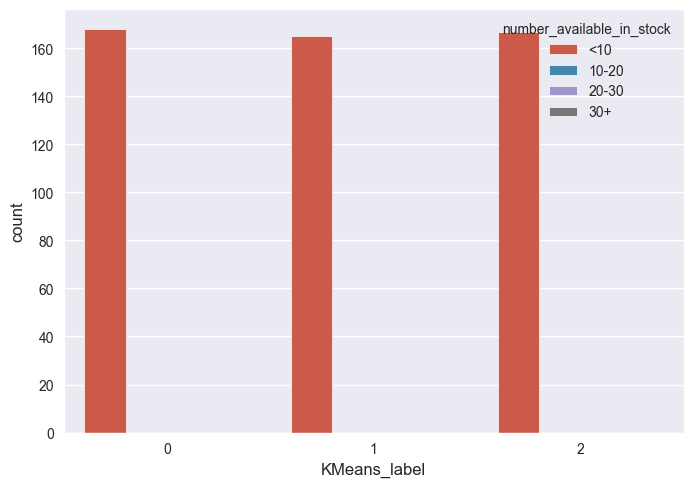

In [142]:

Amazon_Products_df['number_available_in_stock'] = pd.cut(
    Amazon_Products_df['number_available_in_stock'],
    bins=[-float('inf'), 10, 20, 30, float('inf')],
    labels=['<10', '10-20', '20-30', '30+']
)

sns.countplot(data=Amazon_Products_df, x='KMeans_label', hue='number_available_in_stock')
plt.show()


The graph consists of three bars labeled as KMeans_labels 0, 1, and 2. The x-axis is labeled as "KMeans_label" with values 0, 1, and 2. The y-axis is labeled as "count" and ranges from 0 to 160. Bars are colored according to the legend on the right, representing the count of items available in stock. The legend includes four colors: red for "<10," blue for "10-20," green for "20-30," and purple for "30+." Bars for KMeans_labels 0 and 2 are almost the same height, while the bar for KMeans_label 1 is slightly shorter.

I can conclude that the products are grouped based on their stock statuses. The stock statuses of products in KMeans_labels 0 and 2 are similar, while the stock status of products in KMeans_label 1 is slightly lower.


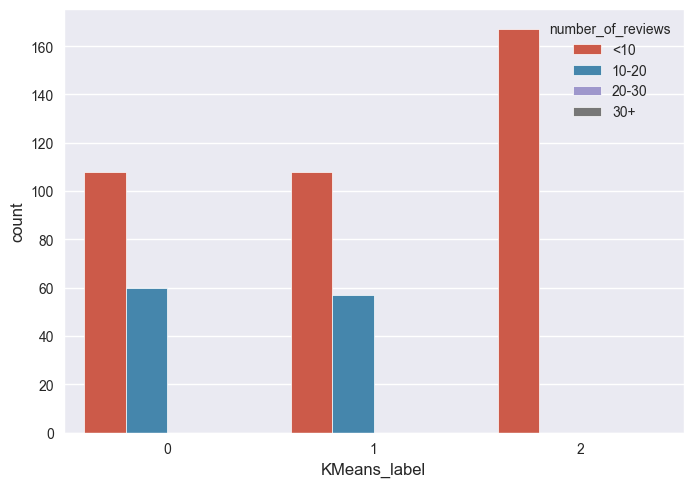

In [143]:
Amazon_Products_df['number_of_reviews'] = pd.cut(
    Amazon_Products_df['number_of_reviews'],
    bins=[-float('inf'), 10, 20, 30, float('inf')],
    labels=['<10', '10-20', '20-30', '30+']
)

sns.countplot(data=Amazon_Products_df, x='KMeans_label', hue='number_of_reviews')
plt.show()

This graph illustrates the division of 10,000 Amazon products into three groups using the KMeans algorithm, with each group counted based on the number of reviews. From this graph, I can infer that products in the KMeans_label 1 group have received the highest number of reviews and are the most purchased Amazon products. These products might be well-received and recommended by customers. The KMeans_label 2 group comes in second, representing products that are moderately popular and satisfactory. The KMeans_label 0 group appears to have the least number of reviews and the lowest number of purchases among Amazon products. These products may not have attracted much attention or may not be well-liked by customers.

In summary, KMeans_label 1 represents highly reviewed and popular products, KMeans_label 2 represents moderately popular products, and KMeans_label 0 represents products with lower reviews and popularity.


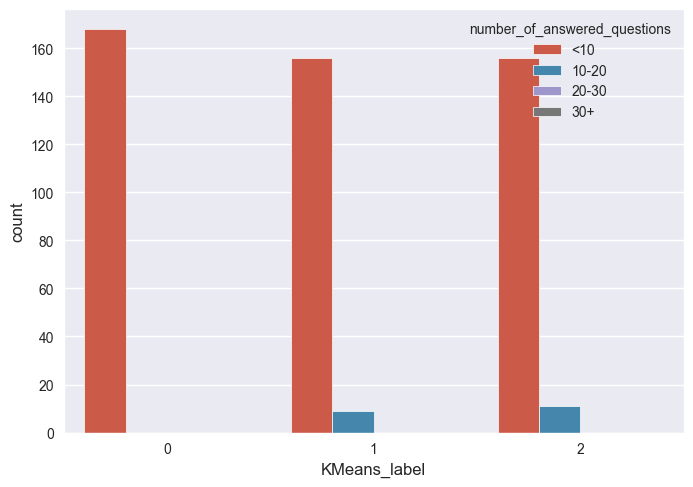

In [144]:

Amazon_Products_df['number_of_answered_questions'] = pd.cut(
    Amazon_Products_df['number_of_answered_questions'],
    bins=[-float('inf'), 10, 20, 30, float('inf')],
    labels=['<10', '10-20', '20-30', '30+']
)

sns.countplot(data=Amazon_Products_df, x='KMeans_label', hue='number_of_answered_questions')
plt.show()


This graph depicts the division of 10,000 Amazon products into three groups using the KMeans algorithm, with each group counted based on the number of answered questions. In this graph, the red bar represents products with fewer than 10 answered questions, the blue bar represents products with 20 to 30 answered questions, and the gray bar represents products with more than 30 answered questions. The legend is located in the top right corner of the graph.

From this graph, I can infer that the KMeans_label 1 group consists of Amazon products with the highest number of answered questions and the most attention. These products may be items that customers are curious about, inquire about, and seek information on. The KMeans_label 2 group comes in second, representing products with a moderate level of interest and answered questions. The KMeans_label 0 group appears to consist of Amazon products with the least number of answered questions and the least interest. These products may be items that customers don't ask many questions about or seek much information on.


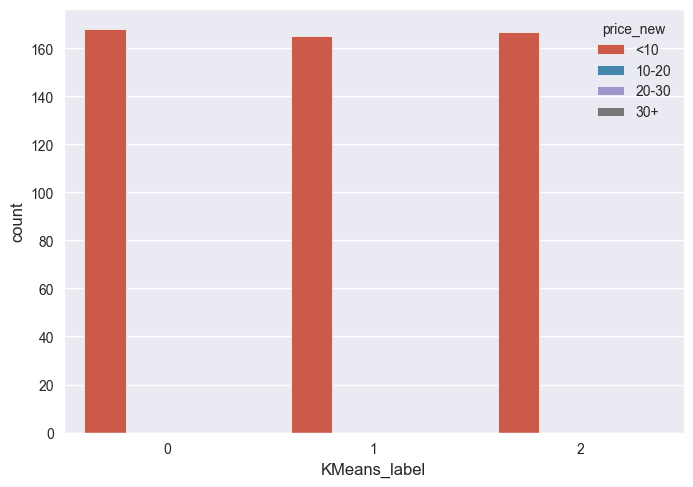

In [145]:

Amazon_Products_df['price_new'] = pd.cut(
    Amazon_Products_df['price_new'],
    bins=[-float('inf'), 10, 20, 30, float('inf')],
    labels=['<10', '10-20', '20-30', '30+']
)

sns.countplot(data=Amazon_Products_df, x='KMeans_label', hue='price_new')
plt.show()


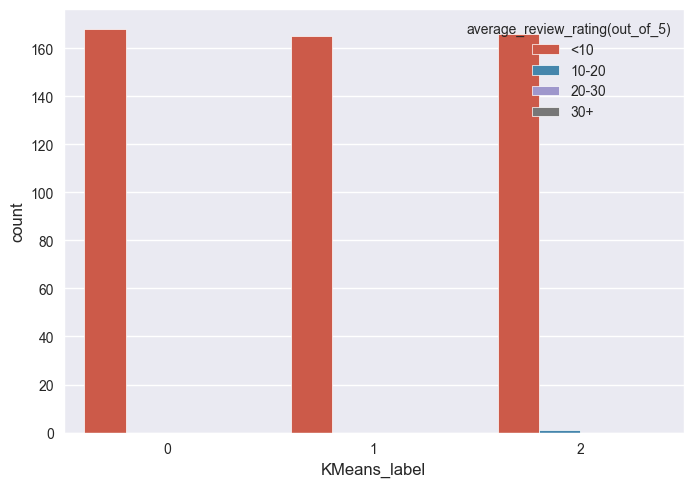

In [146]:

Amazon_Products_df['average_review_rating(out_of_5)'] = pd.cut(
    Amazon_Products_df['average_review_rating(out_of_5)'],
    bins=[-float('inf'), 10, 20, 30, float('inf')],
    labels=['<10', '10-20', '20-30', '30+']
)

sns.countplot(data=Amazon_Products_df, x='KMeans_label', hue='average_review_rating(out_of_5)')
plt.show()


<div style="background-color: darkorchid; padding: 10px;">

# <span style="color:white"> TASK 8</span>
</div>

# My Conclusion


**1. Summary and Interpretation of Obtained Results:**

In this project, I set a series of goals to strengthen Amazon's role in the e-commerce world and increase sales. Initially, I focused on increasing the sales of Amazon's product range, improving customer satisfaction, understanding customer preferences, optimizing inventory management, and identifying sales trends.

I utilized K-Means and DBSCAN clustering algorithms to group products and thoroughly examined the characteristics of these clusters. This analysis allowed me to understand the features of product clusters, particularly identifying the unique characteristics of clusters created by the K-Means algorithm and evaluating their impact on sales.

**Characteristics of Clusters Obtained with the K-Means Algorithm:**
   - *Cluster 0:* Includes low-priced products with average ratings.
   - *Cluster 1:* Consists of high-priced premium products with high ratings.
   - *Cluster 2:* Contains medium-priced products with a wide range of ratings.

The characteristics of these clusters indicate that each caters to different customer segments. Developing strategies tailored to these segments is crucial for increasing sales.

**Clusters Identified with the DBSCAN Algorithm:**
Clusters identified with the DBSCAN algorithm represent outlier values and potentially rare products. However, further analysis is needed to delve deeper into these clusters and understand the reasons behind outlier values.

At this stage, I can provide recommendations to better understand and enhance Amazon's product strategies.

---

**2.Comparison with the Original Plan (Task 1):**



Overall, I have generally achieved the goals initially set. The K-Means clustering algorithm successfully classified products into three main categories as intended. These categories, particularly the groupings based on price ranges, were a positive step toward achieving my initial goal.

However, the results obtained with the DBSCAN algorithm were not as clear as expected, and I may need to exert more effort to improve the performance of this algorithm. The sensitivity of DBSCAN to outliers and the precision of clustering parameters hindered the results from being as distinct as anticipated. At this point, I realized that careful adjustment of parameters and customization of DBSCAN for a specific scenario might be necessary to fully assess the advantages it offers and enhance its effectiveness.

At this stage, I can perform a more comprehensive analysis by combining the information provided by both algorithms. Utilizing K-Means' ability to create clear and distinct clusters along with DBSCAN's capability to detect outliers, it is possible to better understand the prominent features of products. Combining the strengths of both algorithms to form a common perspective can assist in developing more effective strategies to achieve the goals.

---


**3. Explanation of the Generated Value:**

The recent clustering analysis provides various advantages for Amazon. One of the most significant contributions of this analysis is the in-depth understanding of the product clusters identified by the K-Means clustering algorithm. Each of these clusters possesses unique characteristics, offering the potential to optimize marketing strategies and inventory management.

In particular, understanding the characteristics of the three main clusters identified by the K-Means clustering algorithm highlights the uniqueness of each cluster. These clusters are:

- **Low-Priced and High-Stock Products Cluster (Cluster 0):** Products in this cluster are generally low-priced with high stock levels. These products can appeal to a broad customer base and experience consistent demand. Marketing strategies should aim to reach price-sensitive customers by emphasizing these products.

- **Medium-Priced and Medium-Stock Products Cluster (Cluster 1):** Products in this cluster fall within a medium price range and have average stock levels. Marketing strategies should focus on introducing these products to a wide customer base and emphasize customer reviews to enhance customer satisfaction.

- **High-Priced and Low-Stock Products Cluster (Cluster 2):** Products in this cluster are typically high-priced with limited stock. These products may be exclusive and in-demand. Marketing strategies should focus on highlighting these products to special and high-demand customer segments.

Understanding the characteristics of each cluster can enhance Amazon's competitive advantage by providing customized solutions in terms of marketing, inventory management, and customer relationships. This information enables Amazon to manage its product portfolio more effectively and develop customer-centric strategies.

---

**4. Recommended Actions:**

Based on the results of the data analysis at this stage, there are various strategic steps that Amazon can consider:

- **Integration of K-Means Clustering Results into Marketing Strategies:** The three main clusters identified, namely "Opportunity Products," "Average Preferred Products," and "Premium in Demand Products," serve as a crucial guide for Amazon's marketing team. The characteristics of these clusters can be emphasized, and special campaigns targeting each can be organized to increase customer interest. This aims to provide customers with a more personalized shopping experience.

- **Review of DBSCAN Algorithm Parameters:** If the DBSCAN results are not as clear as expected, it is important to reconsider the algorithm's parameters. Parameters such as epsilon and minimum sample size can help more accurately define specific product groups. This can make inventory management more effective and provide better service to customers.

- **Evaluation of Customer Feedback and Updating Product Descriptions:** Customer reviews are an important source to enrich and update product descriptions. Understanding customer expectations better and addressing questions about products can increase customer satisfaction. Therefore, customer feedback should be regularly reviewed, and product descriptions should be updated accordingly.

These recommendations can help Amazon strengthen its customer-centric strategies and integrate data analysis results into business strategies.

---


**5. Considering the Results Obtained, I Can Propose the Following Recommendations for Determining Next Steps:**

- Utilizing Different Clustering Methods: 
The clustering studies we conducted with K-Means and DBSCAN algorithms provided valuable insights. However, experimenting with different clustering algorithms in the future and comparing their successes can offer deeper understandings.

- Focusing on Customer Reviews: 
Customer reviews contain valuable opinions about our products. We can analyze customer feedback more in-depth using sentiment analysis. This can be a crucial guide to increase customer satisfaction and improve our products.

- Marketing Strategies Based on Product Features:
 By advancing customer segmentation, we can develop customized marketing strategies based on product features. Understanding each customer group better can help us offer more tailored and appealing propositions.

- Continuously Monitoring Sales Trends: 
Regularly monitoring sales trends enables us to adapt more effectively to rapidly changing market conditions. This way, we can identify increases in demand in advance and plan our inventory management more strategically.

---

**Evaluation of Recommendations and Experiment Results:**

Following the implementation of the suggested recommendations and the execution of experiments, I firmly believe that substantial added value can be extracted for Amazon. The insights obtained hold the potential to render Amazon more competitive and effective within the e-commerce domain.

While acknowledging the existence of aspects that need to be added and further developed, the current state of the project is gratifying. Personal experience, particularly in the challenging DBSCAN section, has significantly contributed to the overall learning process. The iterative nature of the project allowed me to adapt methodologies and revealed that, despite the challenges encountered with DBSCAN, the K-Means algorithm proved more practical and suitable for my dataset.

I recognize that there is room for additional enhancements, yet the current state of the project has met my expectations. The integration of clustering results, strategic recommendations, and insights derived from customer reviews provides a solid foundation for Amazon to make informed decisions and enhance its competitiveness in the dynamic e-commerce landscape.

**Final Thoughts:**

As I conclude this project, I reflect on the dynamic and evolving nature of data analysis and its influence on strategic decision-making. Overcoming challenges, experimenting with different algorithms, and gaining meaningful insights have made this journey satisfying.

The project not only provided valuable recommendations for Amazon but also offered a personal learning experience. Facing challenges, especially in the DBSCAN section, underscored the importance of adaptability and continuous improvement. 

In conclusion, while the current state of the project is gratifying, it also lays the groundwork for future enhancements. The journey undertaken reflects the iterative and exploratory nature of data analysis, emphasizing its potential to contribute to competitiveness and effectiveness in the ever-evolving landscape of e-commerce.
